In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

plt.rcdefaults()

In [2]:
# Anime Data

# df1 = pd.read_csv('anime-dataset-2023.csv')
df1 = pd.read_csv('anime-exploratory-dataset-2023.csv')
# df1 = pd.read_csv('anime-transformed-dataset-2023.csv')

# User Details

df2 = pd.read_csv('users-details-2023.csv')
# df2 = pd.read_csv('users-details-transformed-2023.csv')

# User Scores

df3 = pd.read_csv('users-score-2023.csv')
# df3 = pd.read_csv('users-scores-transformed-2023.csv')

display(df1)

id                           title  score  \
0          1                    cowboy bebop   8.75   
1          5  cowboy bebop tengoku no tobira   8.38   
2          6                          trigun   8.22   
3          7              witch hunter robin   7.25   
4          8                  bouken ou beet   6.94   
...      ...                             ...    ...   
23743  55729                        thailand  -1.00   
23744  55730                          energy  -1.00   
23745  55733                     di yi xulie  -1.00   
23746  55734        bokura no saishuu sensou  -1.00   
23747  55735                  shijuuku nichi  -1.00   

                                               genres  \
0               ['award winning', 'action', 'sci-fi']   
1                                ['action', 'sci-fi']   
2                   ['adventure', 'action', 'sci-fi']   
3      ['mystery', 'supernatural', 'action', 'drama']   
4            ['adventure', 'supernatural', 'fantasy']   
...                                               ...   
23743                                 ['avant garde']   
23744                                 ['avant garde']   
23745    ['adventure', 'fantasy', 'action', 'sci-fi']   
23746                                           ['-']   
23747                                           ['-']   

                                                synopsis   type  episodes  \
0      crime is timeless. by the year 2071, humanity ...     tv        26   
1      another day, another bounty—such is the life o...  movie         1   
2      vash the stampede is the man with a $$60,000,0...     tv        26   
3      robin sena is a powerful craft user drafted in...     tv        26   
4      it is the dark century and the people are suff...     tv        52   
...                                                  ...    ...       ...   
23743       music video for the song thailand by oh shu.  music         1   
23744  music video for the song energy by sleeq (kim ...  music         1   
23745                                                  -    ona        16   
23746  a music video for the song bokura no saishuu s...  music         1   
23747  a music video for the song shijuuku nichi by s...  music         1   

                status                                          producers  \
0      finished airing                                      bandai visual   
1      finished airing                             sunrise, bandai visual   
2      finished airing                               victor entertainment   
3      finished airing  dentsu, bandai visual, tv tokyo music, victor ...   
4      finished airing                                   dentsu, tv tokyo   
...                ...                                                ...   
23743  finished airing                                                  -   
23744  finished airing                                                  -   
23745  finished airing                                                  -   
23746  finished airing                                                  -   
23747  finished airing                                                  -   

                                  licensors  ... genre_gourmet genre_suspense  \
0          funimation, bandai entertainment  ...             0              0   
1               sony pictures entertainment  ...             0              0   
2      funimation, geneon entertainment usa  ...             0              0   
3          funimation, bandai entertainment  ...             0              0   
4                  illumitoon entertainment  ...             0              0   
...                                     ...  ...           ...            ...   
23743                                     -  ...             0              0   
23744                                     -  ...             0              0   
23745                                     -  ...             0              0   
2374

In [249]:
df1['title'].nunique()

23681

In [250]:
df2['Mal ID'].nunique()

731290

In [251]:
df3['user_id'].nunique()

270033

In [252]:
df1['title'].nunique() * df3['user_id'].nunique()

6394651473

In [6]:
numerical_features = df1.select_dtypes(include=['number']).columns
categorical_features = df1.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['id', 'score', 'episodes', 'rank', 'popularity', 'favorites',
       'scored_by', 'members', 'genre_award_winning', 'genre_slice_of_life',
       'genre_fantasy', 'genre_sci_fi', 'genre_erotica', 'genre_romance',
       'genre_horror', 'genre_boys_love', 'genre_girls_love', 'genre_sports',
       'genre_comedy', 'genre__', 'genre_gourmet', 'genre_suspense',
       'genre_supernatural', 'genre_avant_garde', 'genre_hentai',
       'genre_drama', 'genre_mystery', 'genre_adventure', 'genre_ecchi',
       'genre_action'],
      dtype='object')
Index(['title', 'genres', 'synopsis', 'type', 'status', 'producers',
       'licensors', 'studios', 'source', 'duration', 'rating', 'image_url'],
      dtype='object')


In [3]:
# filter out anime with -1 score, and episodes, and rank
df1_filtered_score = df1[df1['score'] != -1]
df1_filtered_score_ep = df1_filtered_score[df1_filtered_score['episodes'] != -1]
df1_final = df1_filtered_score_ep[df1_filtered_score_ep['rank'] != -1]
print(len(df1))
print(len(df1_filtered_score), f'removed: {len(df1)-len(df1_filtered_score)} entries' )
print(len(df1_filtered_score_ep), f'removed: {len(df1_filtered_score)-len(df1_filtered_score_ep)} entries' )
print(len(df1_final), f'removed: {len(df1_filtered_score_ep)-len(df1_final)} entries' )

23748
15684 removed: 8064 entries
15596 removed: 88 entries
12643 removed: 2953 entries


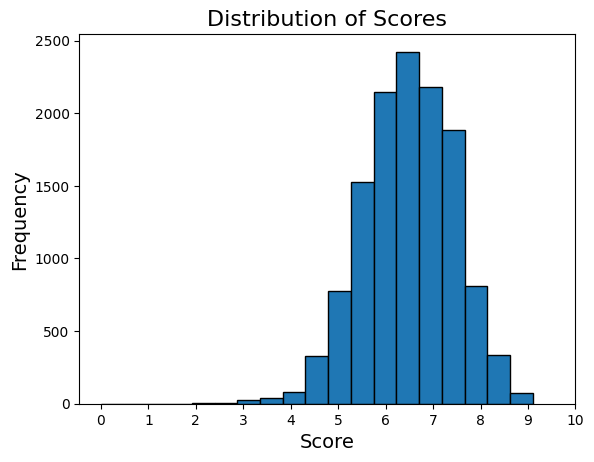

In [160]:
x = df1_final['score']

min_value = 0
max_value = np.max(x)

bins = np.linspace(min_value, max_value, num=20)

plt.hist(x, bins=bins, edgecolor='black')
plt.xticks(np.arange(min_value, max_value+1, step=1))
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Scores', fontsize=16)
plt.show()

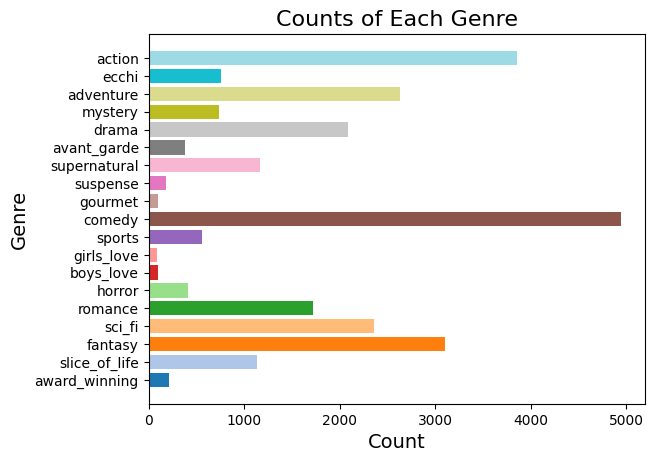

In [101]:
col_names = []
counts = []

for col in df1_final.columns:
    if col.startswith('genre_'):
        if df1_final[col].sum() != 0:
            genre_name = col[len('genre_'):]
            if genre_name != '_':
                col_names.append(genre_name)
                counts.append(df1_final[col].sum())

# Display the results
# for col, count in zip(col_names, counts):
#     print(f"{col}: {count}")
    
cmap = get_cmap('tab20', len(col_names))

plt.barh(col_names, counts, color=[cmap(i) for i in range(len(col_names))])
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Counts of Each Genre', fontsize=16)
plt.show()

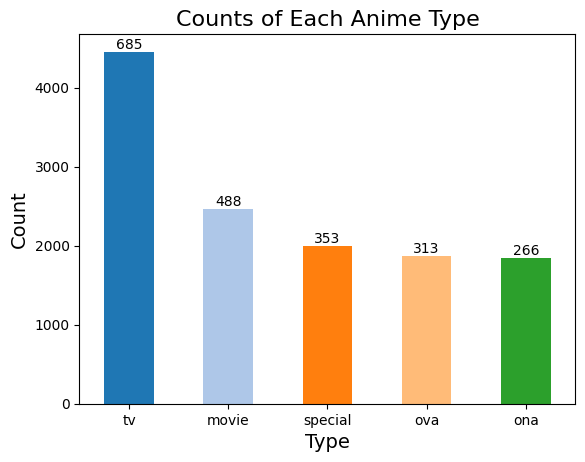

In [127]:
types = df1_final['type'].unique().tolist()
types.remove('-')

df_filtered = df1_final[df1_final['type'].isin(types)]

ax = df_filtered['type'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(col_names))])

for rect, label in zip(ax.patches, top_studios):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.title('Counts of Each Anime Type', fontsize=16)
plt.xticks(rotation=0)
plt.show()

could condition on tv and movie/look into differences between groups

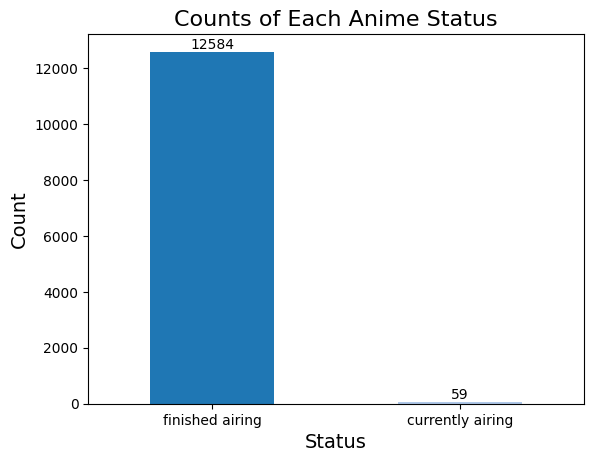

In [118]:
statuses = df1_final['status'].unique().tolist()

ax = df1_final['status'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(statuses))])

for rect, label in zip(ax.patches, df1_final['status'].value_counts()):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Status', fontsize=14)
plt.title('Counts of Each Anime Status', fontsize=16)
plt.xticks(rotation=0)
plt.show()

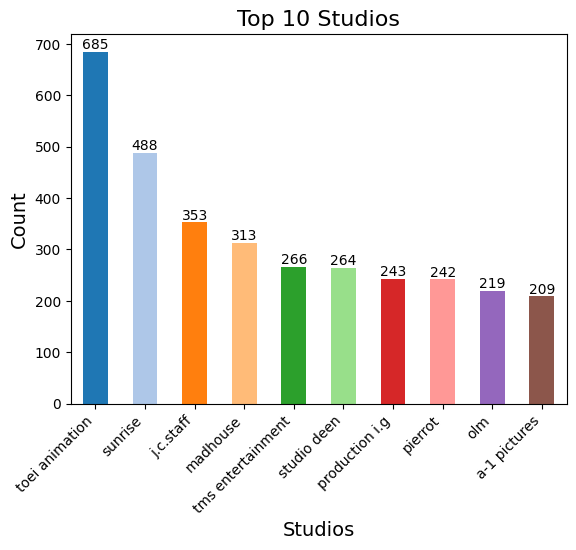

In [126]:
studios = df1_final['studios'].unique().tolist()
studios.remove('-')

df_filtered = df1_final[df1_final['studios'].isin(studios)]

top_studios = df_filtered['studios'].value_counts().nlargest(10)
ax = top_studios.plot(kind='bar', color=[cmap(i) for i in range(len(top_studios))])

for rect, label in zip(ax.patches, top_studios):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Studios', fontsize=14)
plt.title('Top 10 Studios', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

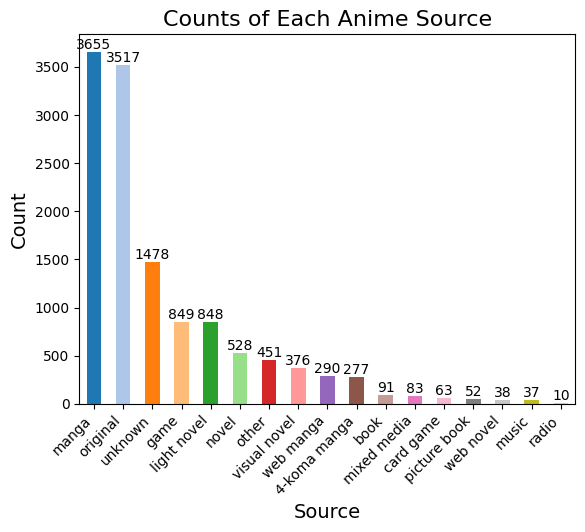

In [137]:
sources = df1_final['source'].unique().tolist()

ax = df1_final['source'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(sources))])

for rect, label in zip(ax.patches, df1_final['source'].value_counts()):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Source', fontsize=14)
plt.title('Counts of Each Anime Source', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [132]:
print(df1_final['duration'])

0        24 min per ep
1          1 hr 55 min
2        24 min per ep
3        25 min per ep
4        23 min per ep
             ...      
23463    16 min per ep
23483           23 min
23493            3 min
23623           23 min
23696           24 min
Name: duration, Length: 12643, dtype: object


In [133]:
numerical_features = df2.select_dtypes(include=['number']).columns
categorical_features = df2.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['Mal ID', 'Days Watched', 'Mean Score', 'Watching', 'Completed',
       'On Hold', 'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')
Index(['Username', 'Gender', 'Birthday', 'Location', 'Joined'], dtype='object')


['Male', 'Female', nan, 'Non-Binary']


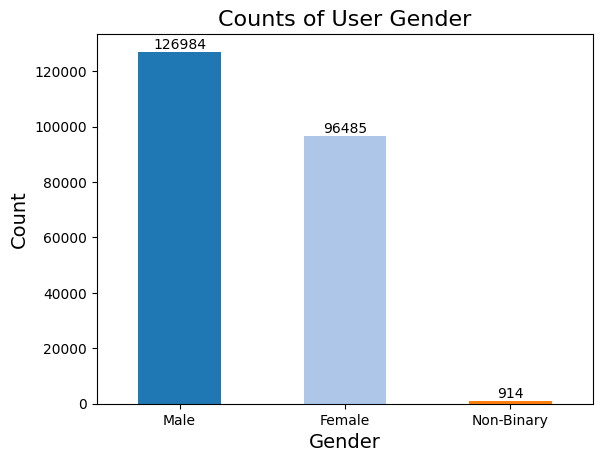

In [139]:
gender = df2['Gender'].unique().tolist()
print(gender)

ax = df2['Gender'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(gender))])

for rect, label in zip(ax.patches, df2['Gender'].value_counts()):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.title('Counts of User Gender', fontsize=16)
plt.xticks(rotation=0)
plt.show()

In [145]:
from datetime import datetime

df2['Birthday'] = pd.to_datetime(df2['Birthday'], errors='coerce')

current_year = 2024

def calculate_age(birthday_date, current_year):
    return current_year - birthday_date.year

df2['Age'] = df2['Birthday'].apply(lambda x: calculate_age(x, current_year))

age = df2['Age'].unique().tolist()
print(age)

0        1985-03-04 00:00:00+00:00
1                              NaT
2                              NaT
3                              NaT
4                              NaT
                    ...           
731285                         NaT
731286                         NaT
731287   1993-01-30 00:00:00+00:00
731288                         NaT
731289                         NaT
Name: Birthday, Length: 731290, dtype: datetime64[ns, UTC]
[39.0, nan, 36.0, 34.0, 41.0, 33.0, 35.0, 38.0, 28.0, 42.0, 40.0, 37.0, 46.0, 32.0, 26.0, 43.0, 45.0, 61.0, 47.0, 94.0, 18.0, 49.0, 52.0, 85.0, 31.0, 30.0, 44.0, 48.0, 50.0, 29.0, 93.0, 56.0, 20.0, 17.0, 51.0, 5.0, 27.0, 3.0, 54.0, 80.0, 92.0, 69.0, 59.0, 23.0, 14.0, 67.0, 60.0, 8.0, 83.0, 57.0, 91.0, 15.0, 55.0, 90.0, 58.0, 19.0, 53.0, 24.0, 10.0, 13.0, 68.0, 25.0, 82.0, 86.0, 16.0, 12.0, 124.0, 22.0, 65.0, 63.0, 4.0, 78.0, 21.0, 74.0, 11.0, 73.0, 62.0, 64.0, 70.0, 7.0, 72.0, 66.0, 75.0, 88.0, 71.0, 81.0, 87.0, 79.0, 77.0, 1.0, 312.0, 0.0, 76.0, 6.0

user input age doesn't account for if the user is still alive, continues to watch anime, registered but had no activity, or entered their actual age. Could look into the zodiac

In [154]:
numerical_features = df3.select_dtypes(include=['number']).columns
categorical_features = df3.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['user_id', 'anime_id', 'rating'], dtype='object')
Index(['Username', 'Anime Title'], dtype='object')


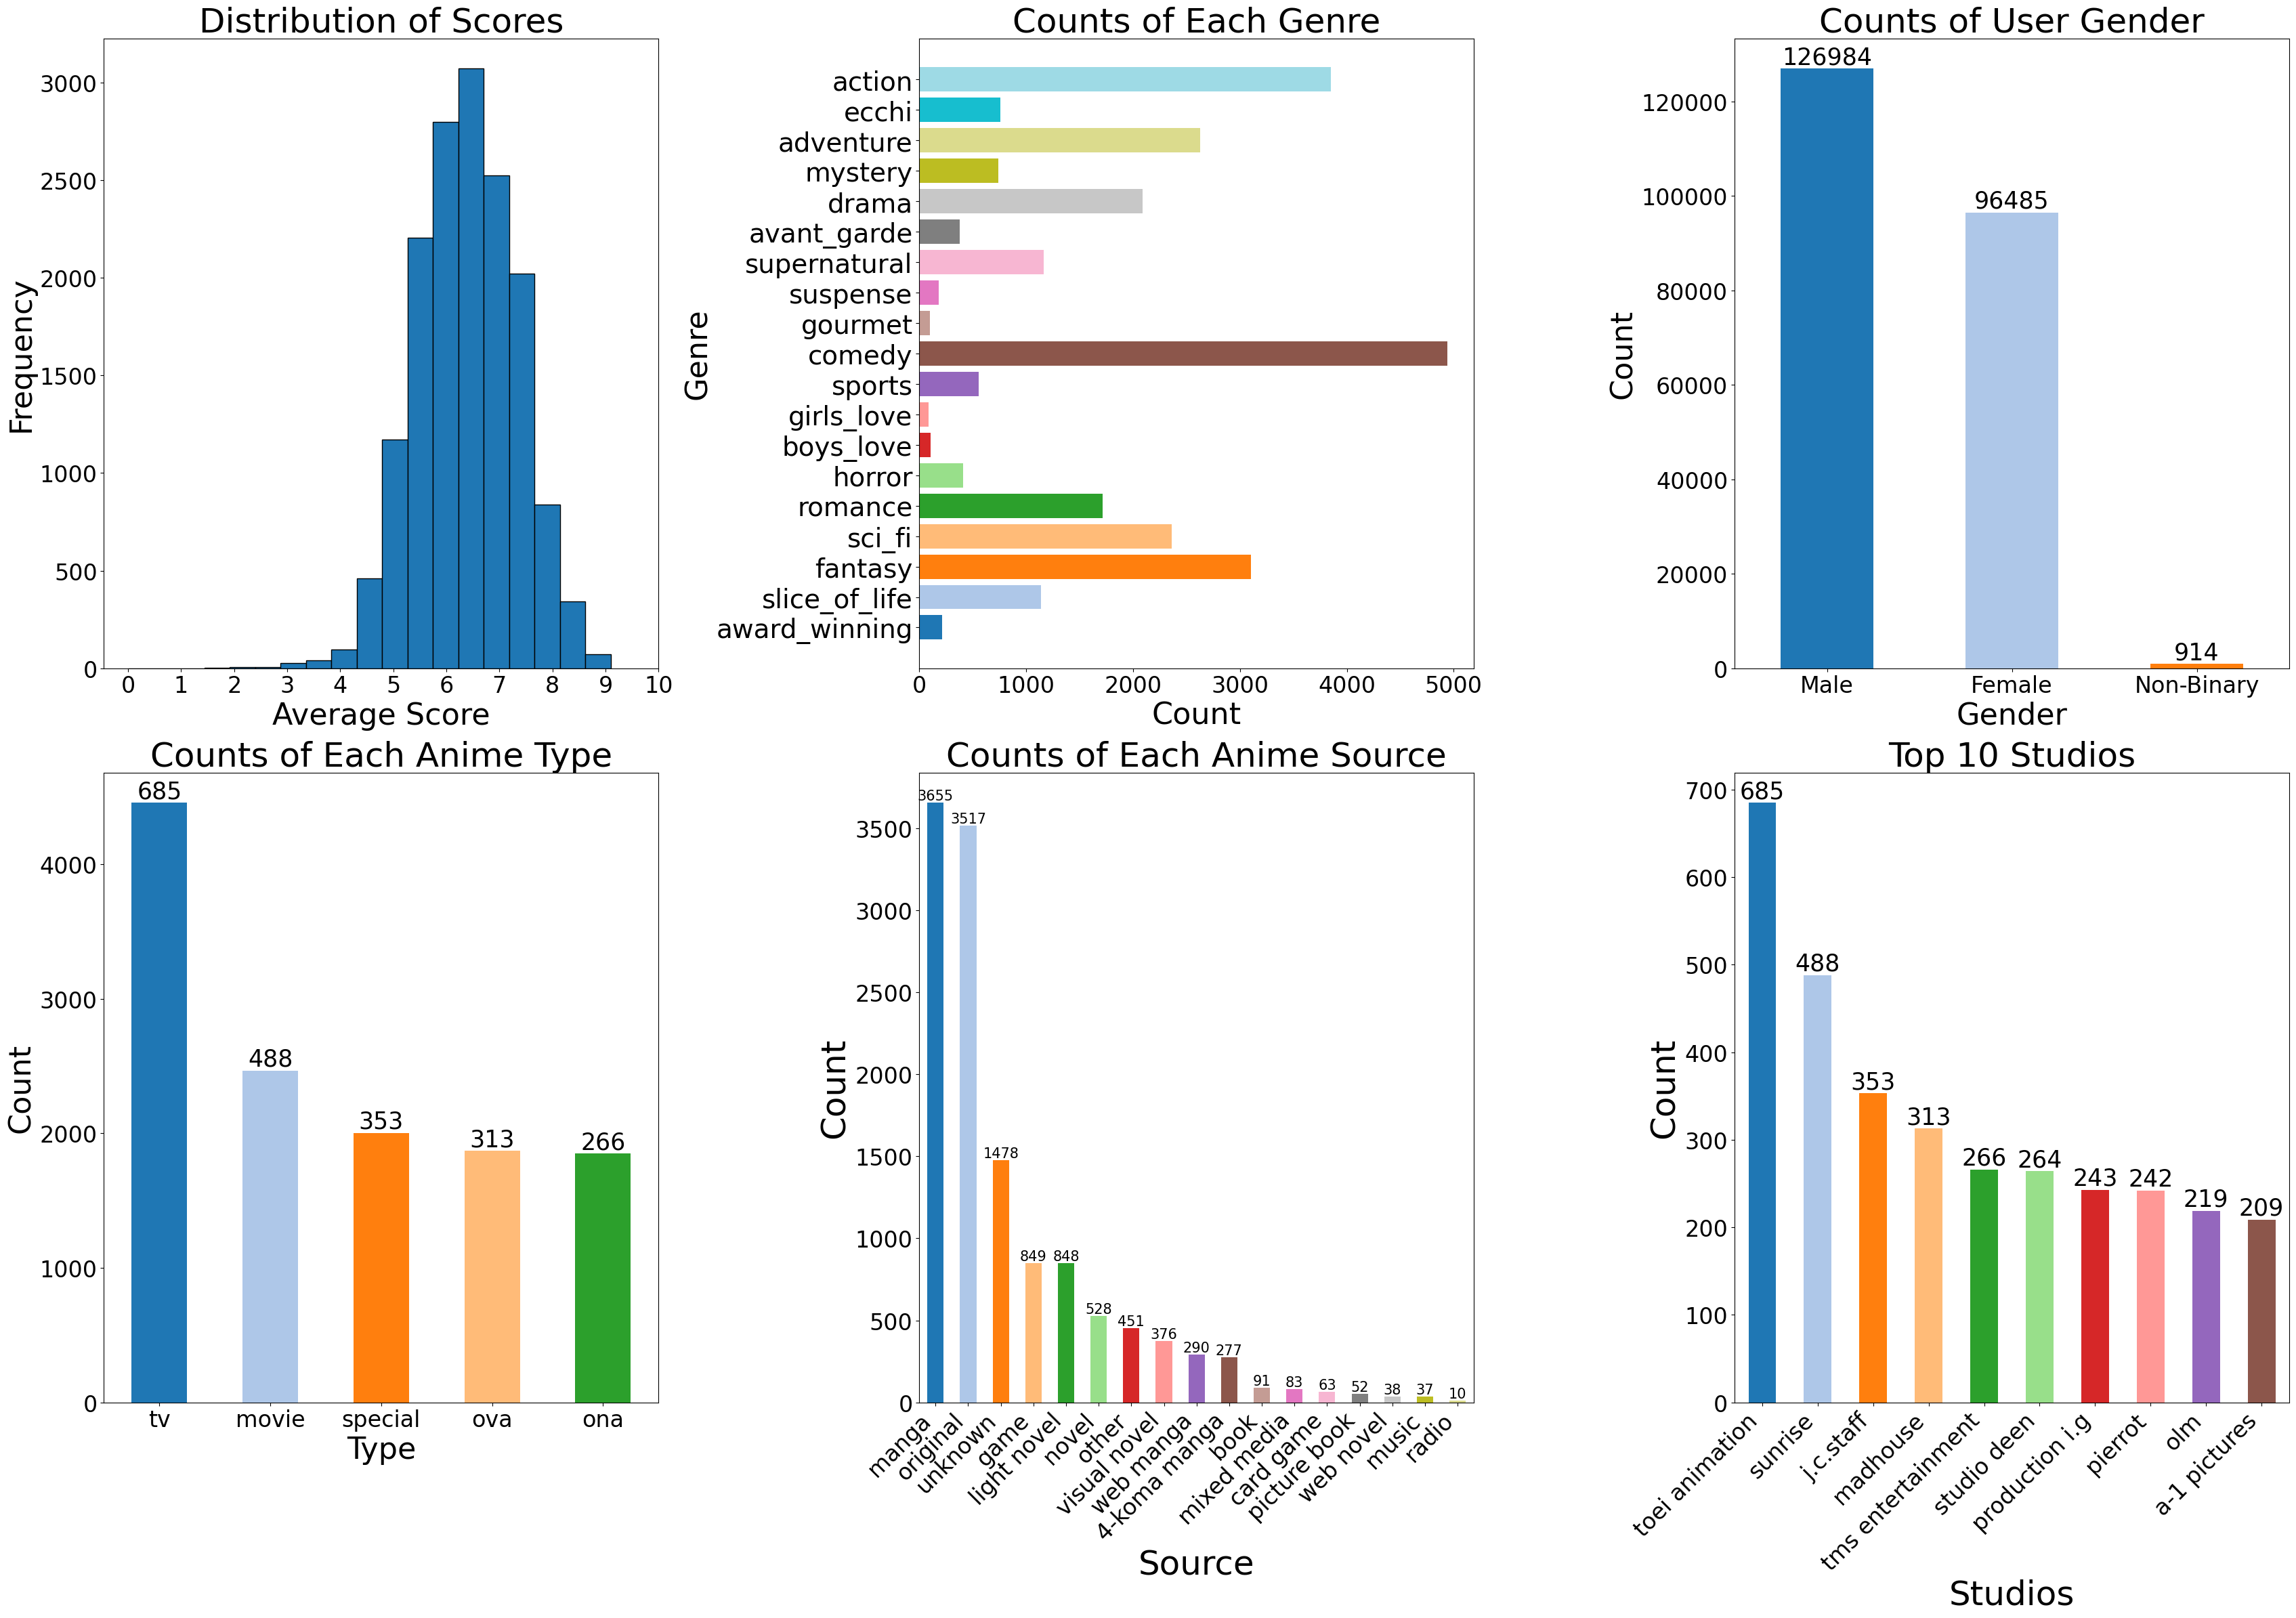

In [186]:
# Subplot 1: Distribution of Scores
plt.figure(figsize=(34, 24))

plt.subplot(2, 3, 1)
min_value = 0
max_value = np.max(x)
bins = np.linspace(min_value, max_value, num=20)
plt.hist(anime_scores, bins=bins, edgecolor='black')
plt.xticks(np.arange(min_value, max_value+1, step=1), fontsize=24)
plt.xlabel('Average Score', fontsize=32)
plt.ylabel('Frequency', fontsize=32)
plt.title('Distribution of Scores', fontsize=36)
plt.yticks(fontsize=24)

# Subplot 2: Counts of Each Genre
plt.subplot(2, 3, 2)
col_names = []
counts = []
for col in df1_final.columns:
    if col.startswith('genre_'):
        if df1_final[col].sum() != 0:
            genre_name = col[len('genre_'):]
            if genre_name != '_':
                col_names.append(genre_name)
                counts.append(df1_final[col].sum())
    
cmap = get_cmap('tab20', len(col_names))
plt.barh(col_names, counts, color=[cmap(i) for i in range(len(col_names))])
plt.xlabel('Count', fontsize=32)
plt.ylabel('Genre', fontsize=32)
plt.title('Counts of Each Genre', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=28)

# Subplot 3: Counts of User Gender
plt.subplot(2, 3, 3)
gender = df2['Gender'].unique().tolist()
ax = df2['Gender'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(gender))])

for rect, label in zip(ax.patches, df2['Gender'].value_counts()):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=25)

plt.ylabel('Count', fontsize=32)
plt.xlabel('Gender', fontsize=32)
plt.title('Counts of User Gender', fontsize=36)
plt.xticks(rotation=0, fontsize=24)
plt.yticks(fontsize=24)

#####

# Subplot 4: Counts of Anime Type
plt.subplot(2, 3, 4)
types = df1_final['type'].unique().tolist()
types.remove('-')
df_filtered = df1_final[df1_final['type'].isin(types)]
ax = df_filtered['type'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(col_names))])

for rect, label in zip(ax.patches, top_studios):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=25)

plt.ylabel('Count', fontsize=32)
plt.xlabel('Type', fontsize=32)
plt.title('Counts of Each Anime Type', fontsize=36)
plt.xticks(rotation=0, fontsize=24)
plt.yticks(fontsize=24)

# Subplot 5: Counts of Anime Source
plt.subplot(2, 3, 5)
sources = df1_final['source'].unique().tolist()
ax = df1_final['source'].value_counts().plot(kind='bar', color=[cmap(i) for i in range(len(sources))])
for rect, label in zip(ax.patches, df1_final['source'].value_counts()):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=15)

plt.ylabel('Count', fontsize=36)
plt.xlabel('Source', fontsize=36)
plt.title('Counts of Each Anime Source', fontsize=36)
plt.xticks(rotation=45, ha='right', fontsize=24)
plt.yticks(fontsize=24)

# Subplot 6: Counts of Anime Produced by Top 10 studios
plt.subplot(2, 3, 6)
studios = df1_final['studios'].unique().tolist()
studios.remove('-')
df_filtered = df1_final[df1_final['studios'].isin(studios)]
top_studios = df_filtered['studios'].value_counts().nlargest(10)
ax = top_studios.plot(kind='bar', color=[cmap(i) for i in range(len(top_studios))])

for rect, label in zip(ax.patches, top_studios):
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), label,
            ha='center', va='bottom', fontsize=25)

plt.ylabel('Count', fontsize=36)
plt.xlabel('Studios', fontsize=36)
plt.title('Top 10 Studios', fontsize=36)
plt.xticks(rotation=45, ha='right', fontsize=24) 
plt.yticks(fontsize=24)


plt.tight_layout()
plt.show()

### EDA prior to milestone 2

In [260]:
anime_df = df1_final.copy()
anime_df

id                                              title  score  \
0          1                                       cowboy bebop   8.75   
1          5                     cowboy bebop tengoku no tobira   8.38   
2          6                                             trigun   8.22   
3          7                                 witch hunter robin   7.25   
4          8                                     bouken ou beet   6.94   
...      ...                                                ...    ...   
23463  55315          gensou mangekyou the memories of phantasm   7.78   
23483  55339         mashle mash burnedead to fushigi na tegami   5.84   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...   5.99   
23623  55517         the idolm ster cinderella girls u149 recap   6.07   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...   6.29   

                                               genres  \
0               ['award winning', 'action', 'sci-fi']   
1                                ['action', 'sci-fi']   
2                   ['adventure', 'action', 'sci-fi']   
3      ['mystery', 'supernatural', 'action', 'drama']   
4            ['adventure', 'supernatural', 'fantasy']   
...                                               ...   
23463                                     ['fantasy']   
23483                 ['comedy', 'fantasy', 'action']   
23493                 ['mystery', 'comedy', 'action']   
23623                                           ['-']   
23696    ['adventure', 'comedy', 'fantasy', 'action']   

                                                synopsis     type  episodes  \
0      crime is timeless. by the year 2071, humanity ...       tv        26   
1      another day, another bounty—such is the life o...    movie         1   
2      vash the stampede is the man with a $$60,000,0...       tv        26   
3      robin sena is a powerful craft user drafted in...       tv        26   
4      it is the dark century and the people are suff...       tv        52   
...                                                  ...      ...       ...   
23463  marisa, an ordinary magician, suspects a youka...      ova        18   
23483         recap of the first six episodes of mashle.  special         1   
23493  infiltrating, disguising, and raiding. tonight...      ona         1   
23623  recap of the first seven episodes of the idolm...  special         1   
23696     this is the 8th recap special of the wano arc.  special         1   

                status                                          producers  \
0      finished airing                                      bandai visual   
1      finished airing                             sunrise, bandai visual   
2      finished airing                               victor entertainment   
3      finished airing  dentsu, bandai visual, tv tokyo music, victor ...   
4      finished airing                                   dentsu, tv tokyo   
...                ...                                                ...   
23463  finished airing                                                  -   
23483  finished airing                                                  -   
23493  finished airing                                                  -   
23623  finished airing                                                  -   
23696  finished airing                                                  -   

                                  licensors  ... genre_gourmet genre_suspense  \
0          funimation, bandai entertainment  ...             0              0   
1               sony pictures entertainment  ...             0              0   
2      funimation, geneon entertainment usa  ...             0              0   
3          funimation, bandai entertainment  ...             0              0   
4                  illumitoon entertainment  ...             0              0   
...                                     ...  ...           ...            ..

In [261]:
numerical_features = anime_df.select_dtypes(include=['number']).columns
categorical_features = anime_df.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['id', 'score', 'episodes', 'rank', 'popularity', 'favorites',
       'scored_by', 'members', 'genre_award_winning', 'genre_slice_of_life',
       'genre_fantasy', 'genre_sci_fi', 'genre_erotica', 'genre_romance',
       'genre_horror', 'genre_boys_love', 'genre_girls_love', 'genre_sports',
       'genre_comedy', 'genre__', 'genre_gourmet', 'genre_suspense',
       'genre_supernatural', 'genre_avant_garde', 'genre_hentai',
       'genre_drama', 'genre_mystery', 'genre_adventure', 'genre_ecchi',
       'genre_action'],
      dtype='object')
Index(['title', 'genres', 'synopsis', 'type', 'status', 'producers',
       'licensors', 'studios', 'source', 'duration', 'rating', 'image_url'],
      dtype='object')


In [262]:
null_counts = anime_df.isnull().sum()
blank_counts = (anime_df == '').sum()

print("Counts of null entries:")
print(null_counts)
print("\nCounts of blank entries:")
print(blank_counts)

Counts of null entries:
id                     0
title                  0
score                  0
genres                 0
synopsis               0
type                   0
episodes               0
status                 0
producers              0
licensors              0
studios                0
source                 0
duration               0
rating                 0
rank                   0
popularity             0
favorites              0
scored_by              0
members                0
image_url              0
genre_award_winning    0
genre_slice_of_life    0
genre_fantasy          0
genre_sci_fi           0
genre_erotica          0
genre_romance          0
genre_horror           0
genre_boys_love        0
genre_girls_love       0
genre_sports           0
genre_comedy           0
genre__                0
genre_gourmet          0
genre_suspense         0
genre_supernatural     0
genre_avant_garde      0
genre_hentai           0
genre_drama            0
genre_mystery          0
g

In [263]:
user_df = df2.copy()

In [264]:
numerical_features = user_df.select_dtypes(include=['number']).columns
categorical_features = user_df.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['Mal ID', 'Days Watched', 'Mean Score', 'Watching', 'Completed',
       'On Hold', 'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')
Index(['Username', 'Gender', 'Birthday', 'Location', 'Joined'], dtype='object')


In [265]:
null_counts = user_df.isnull().sum()
blank_counts = (user_df == '').sum()

print("Counts of null entries:")
print(null_counts)
print("\nCounts of blank entries:")
print(blank_counts)

Counts of null entries:
Mal ID                   0
Username                 0
Gender              506907
Birthday            563222
Location            578484
Joined                   0
Days Watched             8
Mean Score               8
Watching                 8
Completed                8
On Hold                  8
Dropped                  8
Plan to Watch            8
Total Entries            8
Rewatched                8
Episodes Watched         8
dtype: int64

Counts of blank entries:
Mal ID              0
Username            0
Gender              0
Birthday            0
Location            0
Joined              0
Days Watched        0
Mean Score          0
Watching            0
Completed           0
On Hold             0
Dropped             0
Plan to Watch       0
Total Entries       0
Rewatched           0
Episodes Watched    0
dtype: int64


In [266]:
rating_df = df3.copy()

In [267]:
numerical_features = rating_df.select_dtypes(include=['number']).columns
categorical_features = rating_df.select_dtypes(exclude=['number']).columns

print(numerical_features)
print(categorical_features)

Index(['user_id', 'anime_id', 'rating'], dtype='object')
Index(['Username', 'Anime Title'], dtype='object')


In [271]:
null_counts = rating_df.isnull().sum()
blank_counts = (rating_df == '').sum()

print("Counts of null entries:")
print(null_counts)
print("\nCounts of blank entries:")
print(blank_counts)

Counts of null entries:
user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64

Counts of blank entries:
user_id        0
Username       0
anime_id       0
Anime Title    0
rating         0
dtype: int64


In [272]:
anime_df

id                                              title  score  \
0          1                                       cowboy bebop   8.75   
1          5                     cowboy bebop tengoku no tobira   8.38   
2          6                                             trigun   8.22   
3          7                                 witch hunter robin   7.25   
4          8                                     bouken ou beet   6.94   
...      ...                                                ...    ...   
23463  55315          gensou mangekyou the memories of phantasm   7.78   
23483  55339         mashle mash burnedead to fushigi na tegami   5.84   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...   5.99   
23623  55517         the idolm ster cinderella girls u149 recap   6.07   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...   6.29   

                                               genres  \
0               ['award winning', 'action', 'sci-fi']   
1                                ['action', 'sci-fi']   
2                   ['adventure', 'action', 'sci-fi']   
3      ['mystery', 'supernatural', 'action', 'drama']   
4            ['adventure', 'supernatural', 'fantasy']   
...                                               ...   
23463                                     ['fantasy']   
23483                 ['comedy', 'fantasy', 'action']   
23493                 ['mystery', 'comedy', 'action']   
23623                                           ['-']   
23696    ['adventure', 'comedy', 'fantasy', 'action']   

                                                synopsis     type  episodes  \
0      crime is timeless. by the year 2071, humanity ...       tv        26   
1      another day, another bounty—such is the life o...    movie         1   
2      vash the stampede is the man with a $$60,000,0...       tv        26   
3      robin sena is a powerful craft user drafted in...       tv        26   
4      it is the dark century and the people are suff...       tv        52   
...                                                  ...      ...       ...   
23463  marisa, an ordinary magician, suspects a youka...      ova        18   
23483         recap of the first six episodes of mashle.  special         1   
23493  infiltrating, disguising, and raiding. tonight...      ona         1   
23623  recap of the first seven episodes of the idolm...  special         1   
23696     this is the 8th recap special of the wano arc.  special         1   

                status                                          producers  \
0      finished airing                                      bandai visual   
1      finished airing                             sunrise, bandai visual   
2      finished airing                               victor entertainment   
3      finished airing  dentsu, bandai visual, tv tokyo music, victor ...   
4      finished airing                                   dentsu, tv tokyo   
...                ...                                                ...   
23463  finished airing                                                  -   
23483  finished airing                                                  -   
23493  finished airing                                                  -   
23623  finished airing                                                  -   
23696  finished airing                                                  -   

                                  licensors  ... genre_gourmet genre_suspense  \
0          funimation, bandai entertainment  ...             0              0   
1               sony pictures entertainment  ...             0              0   
2      funimation, geneon entertainment usa  ...             0              0   
3          funimation, bandai entertainment  ...             0              0   
4                  illumitoon entertainment  ...             0              0   
...                                     ...  ...           ...            ..

In [273]:
rating_df

user_id    Username  anime_id             Anime Title  rating
0               1       Xinil        21               One Piece       9
1               1       Xinil        48             .hack//Sign       7
2               1       Xinil       320                  A Kite       5
3               1       Xinil        49        Aa! Megami-sama!       8
4               1       Xinil       304  Aa! Megami-sama! Movie       8
...           ...         ...       ...                     ...     ...
24325186  1291087   Oblongata     10611                    R-15       3
24325187  1291087   Oblongata       174            Tenjou Tenge       6
24325188  1291097  JuunanaSai      1535              Death Note       9
24325189  1291097  JuunanaSai       226              Elfen Lied      10
24325190  1291097  JuunanaSai      8425                  Gosick      10

[24325191 rows x 5 columns]

# Milestone 2

## Data Preprocessing 

In [274]:
# ratings and animes, merge dfs

# anime_ratings = pd.merge(anime_df, rating_df, left_on='id', right_on='anime_id', how='inner')
anime_ratings = anime_df.copy()
anime_ratings

id                                              title  score  \
0          1                                       cowboy bebop   8.75   
1          5                     cowboy bebop tengoku no tobira   8.38   
2          6                                             trigun   8.22   
3          7                                 witch hunter robin   7.25   
4          8                                     bouken ou beet   6.94   
...      ...                                                ...    ...   
23463  55315          gensou mangekyou the memories of phantasm   7.78   
23483  55339         mashle mash burnedead to fushigi na tegami   5.84   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...   5.99   
23623  55517         the idolm ster cinderella girls u149 recap   6.07   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...   6.29   

                                               genres  \
0               ['award winning', 'action', 'sci-fi']   
1                                ['action', 'sci-fi']   
2                   ['adventure', 'action', 'sci-fi']   
3      ['mystery', 'supernatural', 'action', 'drama']   
4            ['adventure', 'supernatural', 'fantasy']   
...                                               ...   
23463                                     ['fantasy']   
23483                 ['comedy', 'fantasy', 'action']   
23493                 ['mystery', 'comedy', 'action']   
23623                                           ['-']   
23696    ['adventure', 'comedy', 'fantasy', 'action']   

                                                synopsis     type  episodes  \
0      crime is timeless. by the year 2071, humanity ...       tv        26   
1      another day, another bounty—such is the life o...    movie         1   
2      vash the stampede is the man with a $$60,000,0...       tv        26   
3      robin sena is a powerful craft user drafted in...       tv        26   
4      it is the dark century and the people are suff...       tv        52   
...                                                  ...      ...       ...   
23463  marisa, an ordinary magician, suspects a youka...      ova        18   
23483         recap of the first six episodes of mashle.  special         1   
23493  infiltrating, disguising, and raiding. tonight...      ona         1   
23623  recap of the first seven episodes of the idolm...  special         1   
23696     this is the 8th recap special of the wano arc.  special         1   

                status                                          producers  \
0      finished airing                                      bandai visual   
1      finished airing                             sunrise, bandai visual   
2      finished airing                               victor entertainment   
3      finished airing  dentsu, bandai visual, tv tokyo music, victor ...   
4      finished airing                                   dentsu, tv tokyo   
...                ...                                                ...   
23463  finished airing                                                  -   
23483  finished airing                                                  -   
23493  finished airing                                                  -   
23623  finished airing                                                  -   
23696  finished airing                                                  -   

                                  licensors  ... genre_gourmet genre_suspense  \
0          funimation, bandai entertainment  ...             0              0   
1               sony pictures entertainment  ...             0              0   
2      funimation, geneon entertainment usa  ...             0              0   
3          funimation, bandai entertainment  ...             0              0   
4                  illumitoon entertainment  ...             0              0   
...                                     ...  ...           ...            ..

#### $\color{green}{\textbf{Do average user scores of anime differ significantly between different genres: Regression with hypothesis testing on coefficients}}$

In [282]:
from scipy.stats import kruskal
from itertools import combinations
from scipy.stats import mannwhitneyu
from cliffs_delta import cliffs_delta
from statsmodels.stats.power import TTestIndPower
import seaborn as sns

In [276]:
# check which genres are empty/which to drop
genre_list = []
for col in anime_ratings.columns:
    if col.startswith('genre_'):
        genre_list.append(col)
        
subset_df = anime_ratings[genre_list]

for col in subset_df.columns:
    count_of_ones = subset_df[col].sum()
    print(col, count_of_ones)

genres_to_drop = ['genre_erotica', 'genre__', 'genre_hentai']

anime_ratings_cleaned = anime_ratings.drop(columns=genres_to_drop)

genre_award_winning 213
genre_slice_of_life 1140
genre_fantasy 3103
genre_sci_fi 2361
genre_erotica 0
genre_romance 1718
genre_horror 410
genre_boys_love 104
genre_girls_love 88
genre_sports 556
genre_comedy 4942
genre__ 667
genre_gourmet 102
genre_suspense 182
genre_supernatural 1162
genre_avant_garde 379
genre_hentai 0
genre_drama 2090
genre_mystery 738
genre_adventure 2630
genre_ecchi 759
genre_action 3852


animes can fall under multiple genre categories

In [277]:
anime_ratings_cleaned

id                                              title  score  \
0          1                                       cowboy bebop   8.75   
1          5                     cowboy bebop tengoku no tobira   8.38   
2          6                                             trigun   8.22   
3          7                                 witch hunter robin   7.25   
4          8                                     bouken ou beet   6.94   
...      ...                                                ...    ...   
23463  55315          gensou mangekyou the memories of phantasm   7.78   
23483  55339         mashle mash burnedead to fushigi na tegami   5.84   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...   5.99   
23623  55517         the idolm ster cinderella girls u149 recap   6.07   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...   6.29   

                                               genres  \
0               ['award winning', 'action', 'sci-fi']   
1                                ['action', 'sci-fi']   
2                   ['adventure', 'action', 'sci-fi']   
3      ['mystery', 'supernatural', 'action', 'drama']   
4            ['adventure', 'supernatural', 'fantasy']   
...                                               ...   
23463                                     ['fantasy']   
23483                 ['comedy', 'fantasy', 'action']   
23493                 ['mystery', 'comedy', 'action']   
23623                                           ['-']   
23696    ['adventure', 'comedy', 'fantasy', 'action']   

                                                synopsis     type  episodes  \
0      crime is timeless. by the year 2071, humanity ...       tv        26   
1      another day, another bounty—such is the life o...    movie         1   
2      vash the stampede is the man with a $$60,000,0...       tv        26   
3      robin sena is a powerful craft user drafted in...       tv        26   
4      it is the dark century and the people are suff...       tv        52   
...                                                  ...      ...       ...   
23463  marisa, an ordinary magician, suspects a youka...      ova        18   
23483         recap of the first six episodes of mashle.  special         1   
23493  infiltrating, disguising, and raiding. tonight...      ona         1   
23623  recap of the first seven episodes of the idolm...  special         1   
23696     this is the 8th recap special of the wano arc.  special         1   

                status                                          producers  \
0      finished airing                                      bandai visual   
1      finished airing                             sunrise, bandai visual   
2      finished airing                               victor entertainment   
3      finished airing  dentsu, bandai visual, tv tokyo music, victor ...   
4      finished airing                                   dentsu, tv tokyo   
...                ...                                                ...   
23463  finished airing                                                  -   
23483  finished airing                                                  -   
23493  finished airing                                                  -   
23623  finished airing                                                  -   
23696  finished airing                                                  -   

                                  licensors  ... genre_comedy genre_gourmet  \
0          funimation, bandai entertainment  ...            0             0   
1               sony pictures entertainment  ...            0             0   
2      funimation, geneon entertainment usa  ...            0             0   
3          funimation, bandai entertainment  ...            0             0   
4                  illumitoon entertainment  ...            0             0   
...                                     ...  ...          ...           ...   
23463    

In [278]:
cols_to_drop = ['id', 'title', 'type', 'genres', 'synopsis', 'episodes',
       'status', 'producers', 'licensors', 'studios', 'source', 'duration',
       'rating', 'rank', 'popularity', 'favorites', 'scored_by', 'members',
       'image_url']

anime_genre_dataset = anime_ratings_cleaned.drop(cols_to_drop, axis=1)

anime_genre_dataset

score  genre_award_winning  genre_slice_of_life  genre_fantasy  \
0       8.75                    1                    0              0   
1       8.38                    0                    0              0   
2       8.22                    0                    0              0   
3       7.25                    0                    0              0   
4       6.94                    0                    0              1   
...      ...                  ...                  ...            ...   
23463   7.78                    0                    0              1   
23483   5.84                    0                    0              1   
23493   5.99                    0                    0              0   
23623   6.07                    0                    0              0   
23696   6.29                    0                    0              1   

       genre_sci_fi  genre_romance  genre_horror  genre_boys_love  \
0                 1              0             0                0   
1                 1              0             0                0   
2                 1              0             0                0   
3                 0              0             0                0   
4                 0              0             0                0   
...             ...            ...           ...              ...   
23463             0              0             0                0   
23483             0              0             0                0   
23493             0              0             0                0   
23623             0              0             0                0   
23696             0              0             0                0   

       genre_girls_love  genre_sports  genre_comedy  genre_gourmet  \
0                     0             0             0              0   
1                     0             0             0              0   
2                     0             0             0              0   
3                     0             0             0              0   
4                     0             0             0              0   
...                 ...           ...           ...            ...   
23463                 0             0             0              0   
23483                 0             0             1              0   
23493                 0             0             1              0   
23623                 0             0             0              0   
23696                 0             0             1              0   

       genre_suspense  genre_supernatural  genre_avant_garde  genre_drama  \
0                   0                   0                  0            0   
1                   0                   0                  0            0   
2                   0                   0                  0            0   
3                   0                   1                  0            1   
4                   0                   1                  0            0   
...               ...                 ...                ...          ...   
23463               0                   0                  0            0   
23483               0                   0                  0            0   
23493               0                   0                  0            0   
23623               0                   0                  0            0   
23696               0                   0                  0            0   

       genre_mystery  genre_adventure  genre_ecchi  genre_action  
0                  0                0            0             1  
1                  0                0            0             1  
2                  0                1            0             1  
3                  1                0            0             1  
4                  0                1            0             0  
...              ...              ...          ...           ...  
23463              0                0            0             0  

In [1086]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = anime_genre_dataset.drop('score', axis=1)
y = anime_genre_dataset['score']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

with open('ols_genre_summary.txt', 'w') as f:
    f.write(results.summary().as_text())

from PIL import Image, ImageDraw, ImageFont

with open('ols_genre_summary.txt', 'r') as f:
    text = f.read()

img = Image.new('RGB', (800, 600), color = (255, 255, 255))
d = ImageDraw.Draw(img)

font = ImageFont.load_default()

d.text((10,10), text, fill=(0,0,0), font=font)

img.save('ols_genre_summary_image.png')

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:53:35   Log-Likelihood:                -15731.
No. Observations:               12643   AIC:                         3.150e+04
Df Residuals:                   12623   BIC:                         3.165e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.9957    

In [1069]:
coefficients = results.params
std_errors = results.bse
p_values = results.pvalues

variable_names = list(X_train.columns)
variable_names = ['const'] + variable_names

# hypothesis testing on regression coefficients
significance_level = 0.005
for i, (name, coef, std_err, p_val) in enumerate(zip(variable_names, coefficients, std_errors, p_values)):
    print(f"{name} - Coefficient: {coef:.4f}, Standard Error: {std_err:.4f}, P value: {p_val:.4f}")
    if p_val <= significance_level:
        print("Reject null hypothesis: coefficient is statistically significant.")
        print()
    else:
        print("Fail to reject null hypothesis: coefficient is not statistically significant.")
        print()

const - Coefficient: 5.9957, Standard Error: 0.0166, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_award_winning - Coefficient: 0.7168, Standard Error: 0.0587, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_slice_of_life - Coefficient: 0.2235, Standard Error: 0.0274, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_fantasy - Coefficient: 0.2156, Standard Error: 0.0191, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_sci_fi - Coefficient: 0.1031, Standard Error: 0.0208, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_romance - Coefficient: 0.3859, Standard Error: 0.0229, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

genre_horror - Coefficient: -0.3548, Standard Error: 0.0440, P value: 0.0000
Reject null hypothesis: coefficient is statistically sig

Boys Love is only genre with non significant p value in relation to alpha. Will look into directionality of the coefficients; considering each genre separately as predictor variables allows us to understand the impact of each genre on the score independently of other genres (as opposed to a being compared to a reference/baseline genre)

#### $\color{green}{\textbf{Is there a significant difference in user ratings among anime of various types (e.g., TV series, movies, OVAs): Pairwise Mann Whitney U}}$

In [258]:
anime_ratings_type = anime_ratings_cleaned[['id', 'title', 'type', 'score']]
anime_ratings_type

id                                              title     type  \
0          1                                       cowboy bebop       tv   
1          5                     cowboy bebop tengoku no tobira    movie   
2          6                                             trigun       tv   
3          7                                 witch hunter robin       tv   
4          8                                     bouken ou beet       tv   
...      ...                                                ...      ...   
23463  55315          gensou mangekyou the memories of phantasm      ova   
23483  55339         mashle mash burnedead to fushigi na tegami  special   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...      ona   
23623  55517         the idolm ster cinderella girls u149 recap  special   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...  special   

       score  
0       8.75  
1       8.38  
2       8.22  
3       7.25  
4       6.94  
...      ...  
23463   7.78  
23483   5.84  
23493   5.99  
23623   6.07  
23696   6.29  

[12643 rows x 4 columns]

In [279]:
anime_types = anime_ratings_type['type'].unique()
anime_types

array(['tv', 'movie', 'ova', 'special', 'ona', '-'], dtype=object)

In [280]:
type_ratings_dict = {}

for type in anime_types:
    if type != '-':
        anime_type = anime_ratings_type[anime_ratings_type['type'] == type]
        type_ratings = anime_type['score']
        type_ratings_dict[type] = np.array(type_ratings)

type_ratings_dict = {k: v for k, v in type_ratings_dict.items() if len(v) != 0}

for type, ratings in type_ratings_dict.items():
    print(f"Count of {type} scores: ", len(ratings))

# plt.figure(figsize=(10,6))
# for type, ratings in type_ratings_dict.items():
#     plt.hist(ratings, bins=50, alpha=0.5, label=type)

# plt.xlabel('Scores', fontsize=18)
# plt.ylabel('Frequency', fontsize=18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title(f'Distribution of Scores for Anime Type', fontsize=20)
# plt.legend(loc='best')
# plt.show()

Count of tv scores:  4456
Count of movie scores:  2466
Count of ova scores:  1869
Count of special scores:  2002
Count of ona scores:  1849


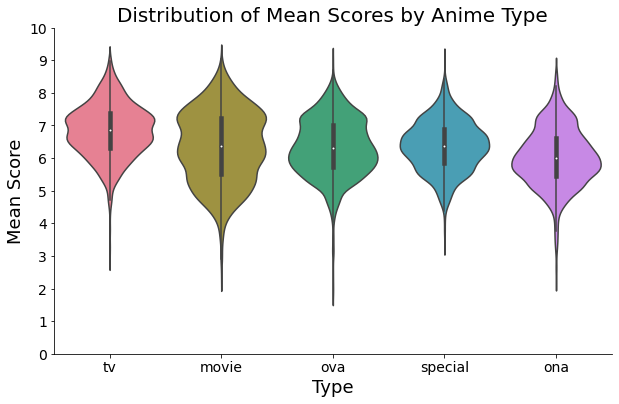

In [283]:
anime_type_cleaned = anime_ratings_type.copy()
anime_type_cleaned = anime_type_cleaned[anime_type_cleaned['type'] != '-']
plt.figure(figsize=(10, 6))
sns.violinplot(data=anime_type_cleaned, x='type', y='score', scale='width', bw=0.2, palette="husl")
sns.despine()  # Remove top and right spines
plt.xlabel('Type', fontsize=18)
plt.ylabel('Mean Score', fontsize=18)
plt.yticks(range(0, 11))
plt.title('Distribution of Mean Scores by Anime Type', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [284]:
from math import comb

# across all types regardless of genre
kruskal_stat, p_value = kruskal(*type_ratings_dict.values())

print('Kruskal Wallis Test Statistic: ', kruskal_stat)
k_alpha = 0.005

print('alpha: ', k_alpha)
print('p value: ', p_value)

if p_value <= k_alpha:
    print("There is significant evidence to reject the null hypothesis.")
else:
    print("There is no significant evidence to reject the null hypothesis.")

Kruskal Wallis Test Statistic:  1246.6719466058976
alpha:  0.005
p value:  1.2135139741393108e-268
There is significant evidence to reject the null hypothesis.


In [285]:
def compute_mannwhitneyu_power(effect_size, n1, n2, alpha, n_simulations=1000):
    u_statistics = []
    for _ in range(n_simulations):
        group1 = np.random.normal(loc=0, scale=1, size=n1)
        group2 = np.random.normal(loc=effect_size, scale=1, size=n2)
        _, u_statistic = mannwhitneyu(group1, group2, alternative='two-sided')
        u_statistics.append(u_statistic)
    power = np.mean(np.array(u_statistics) <= alpha)
    return power

In [286]:
# bonferroni adjustment
adj = comb(len(type_ratings_dict), 2) # does not take into account e.g. tv vs tv
print('unique combinations: ', adj)
alpha = 0.005/adj
print('adjusted alpha: ', alpha)

unique combinations:  10
adjusted alpha:  0.0005


In [1033]:
types = list(type_ratings_dict.keys())

type_sig_matrix = pd.DataFrame(index=types, columns=types)
type_effect_size_matrix = pd.DataFrame(index=types, columns=types)
type_power_matrix = pd.DataFrame(index=types, columns=types)
type_stat_matrix = pd.DataFrame(index=types, columns=types)

power_analysis = TTestIndPower()

p_values = {}
effect_sizes = {}
powers = {}
stats = {}


for type1 in types:
    for type2 in types:
        ratings1 = type_ratings_dict[type1]
        ratings2 = type_ratings_dict[type2]
        stat, p_value = mannwhitneyu(ratings1, ratings2)
        effect_size, effect_string = cliffs_delta(ratings1, ratings2)
        power = compute_mannwhitneyu_power(effect_size, len(ratings1), len(ratings2), alpha, n_simulations=1000)
#         power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(ratings1), alpha=alpha, alternative='two-sided')
        
        p_values[(type1, type2)] = p_value
        effect_sizes[(type1, type2)] = effect_size
        powers[(type1, type2)] = power
        stats[(type1, type2)] = stat
        
        type_sig_matrix.loc[type1, type2] = p_values.get((type1, type2), p_values.get((type2, type1)))
        type_effect_size_matrix.loc[type1, type2] = effect_sizes.get((type1, type2), effect_sizes.get((type2, type1)))
        type_stat_matrix.loc[type1, type2] = stats.get((type1, type2), stats.get((type2, type1)))
        power_value = powers.get((type1, type2), powers.get((type2, type1)))
        type_power_matrix.loc[type1, type2] = power_value

In [287]:
custom_map = sns.diverging_palette(0, 260, as_cmap=True)
custom_map_r = sns.diverging_palette(260, 0, as_cmap=True)
custom_map_effect = sns.diverging_palette(0, 0, as_cmap=True)

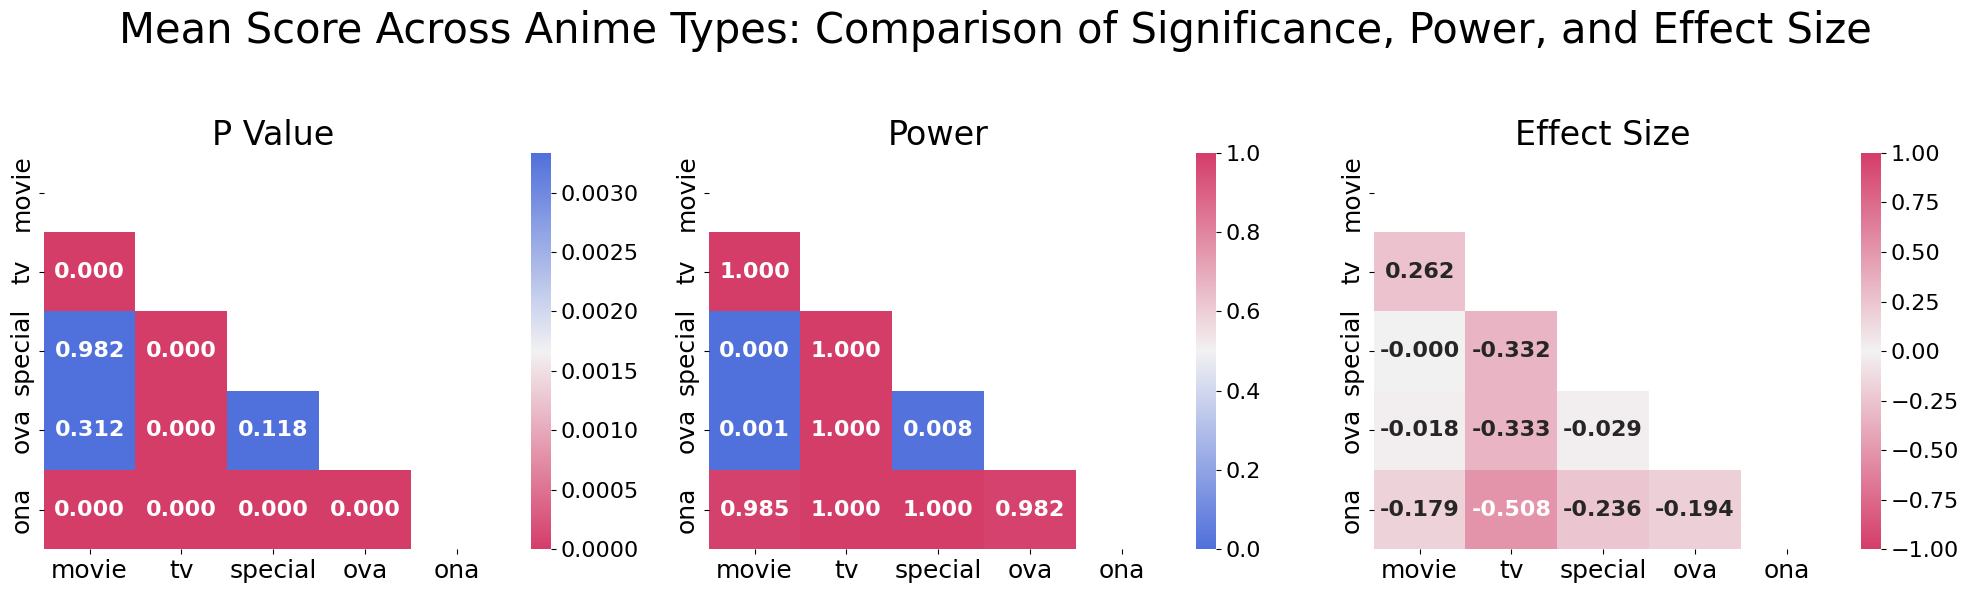

In [1092]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first heatmap (Significance)
type_sig_matrix.values[np.triu_indices_from(type_sig_matrix)] = np.nan
type_sig_matrix = type_sig_matrix.astype(float)
sns.heatmap(type_sig_matrix, ax=axs[0], annot=True, fmt=".3f", cmap=custom_map, linewidths=0, linecolor='black', vmin=0, vmax=alpha*2, annot_kws={"size": 16, "weight": "bold"})
axs[0].set_title('P Value', fontsize=24)
axs[0].tick_params(axis='both', which='major', labelsize=18)

# Plot the third heatmap (Power)
type_power_matrix.values[np.triu_indices_from(type_power_matrix)] = np.nan
type_power_matrix = type_power_matrix.astype(float)
sns.heatmap(type_power_matrix, ax=axs[1], annot=True, fmt=".3f", cmap=custom_map_r, linewidths=0, linecolor='black', vmin=0, vmax=1, annot_kws={"size": 16, "weight": "bold"})
axs[1].set_title('Power', fontsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=18)

# Plot the second heatmap (Effect Size)
type_effect_size_matrix.values[np.triu_indices_from(type_effect_size_matrix)] = np.nan
type_effect_size_matrix = type_effect_size_matrix.astype(float)
sns.heatmap(type_effect_size_matrix, ax=axs[2], annot=True, fmt=".3f", cmap=custom_map_effect, linewidths=0, linecolor='black', vmin=-1, vmax=1, annot_kws={"size": 16, "weight": "bold"})
axs[2].set_title('Effect Size', fontsize=24)
axs[2].tick_params(axis='both', which='major', labelsize=18)

for ax in axs:
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    
fig.suptitle('Mean Score Across Anime Types: Comparison of Significance, Power, and Effect Size\n', fontsize=30)
plt.tight_layout()
plt.show()

Cliff's delta is negligible (|d| < 0.15), small (|d| < 0.33), moderate (|d| < 0.47), or large (|d| > 0.47).

In [1036]:
# pairs with sig p-value, large power, and large absolute effect size

indices = np.where(type_sig_matrix <= alpha)
rows = type_sig_matrix.index[indices[0]]
columns = type_sig_matrix.columns[indices[1]]
sig_pairs = list(zip(rows, columns))

indices = np.where(type_power_matrix >= 0.8) # threshold for good power
rows = type_power_matrix.index[indices[0]]
columns = type_power_matrix.columns[indices[1]]
power_pairs = list(zip(rows, columns))

abs_effect_type_matrix = abs(type_effect_size_matrix)
indices = np.where(abs_effect_type_matrix >= 0.33) # moderate effect
rows = abs_effect_type_matrix.index[indices[0]]
columns = abs_effect_type_matrix.columns[indices[1]]
effect_pairs = list(zip(rows, columns))

sig_pairs_set = set(sig_pairs)
power_pairs_set = set(power_pairs)
effect_pairs_set = set(effect_pairs)

# find pairs that satisfy all three criteria
selected_pairs = sig_pairs_set.intersection(power_pairs_set, effect_pairs_set)

for pair in selected_pairs:
    row_index = type_sig_matrix.index.get_loc(pair[0])
    col_index = type_sig_matrix.columns.get_loc(pair[1])
    p_value = type_sig_matrix.iloc[row_index, col_index]
    
    row_index = type_power_matrix.index.get_loc(pair[0])
    col_index = type_power_matrix.columns.get_loc(pair[1])
    power = type_power_matrix.iloc[row_index, col_index]
    
    row_index = abs_effect_type_matrix.index.get_loc(pair[0])
    col_index = abs_effect_type_matrix.columns.get_loc(pair[1])
    effect_size = abs_effect_type_matrix.iloc[row_index, col_index]
    
    row_index = type_stat_matrix.index.get_loc(pair[0])
    col_index = type_stat_matrix.columns.get_loc(pair[1])
    stat = type_stat_matrix.iloc[row_index, col_index]
    
    print("Pair:", pair)
    print("Mann Whitney U Test Statistic:", stat)
    print("P-value:", p_value)
    print("Effect size:", effect_size)
    print("Power:", power)
    print()

Pair: ('ona', 'tv')
Mann Whitney U Test Statistic: 2025099.0
P-value: 2.413533208637644e-222
Effect size: 0.5084200494614489
Power: 1.0

Pair: ('special', 'tv')
Mann Whitney U Test Statistic: 2978242.0
P-value: 1.643953122374343e-101
Effect size: 0.33230100240872235
Power: 1.0

Pair: ('ova', 'tv')
Mann Whitney U Test Statistic: 2777109.0
P-value: 2.670408912109126e-97
Effect size: 0.3330881441798675
Power: 1.0



#### $\color{green}{\textbf{Is there a significant difference in user ratings among anime from different sources (e.g., manga, light novel, movie, TV): Pairwise Mann Whitney U}}$

In [288]:
anime_ratings_source = anime_ratings_cleaned[['id', 'title', 'source', 'score']]
anime_ratings_source

id                                              title     source  \
0          1                                       cowboy bebop   original   
1          5                     cowboy bebop tengoku no tobira   original   
2          6                                             trigun      manga   
3          7                                 witch hunter robin   original   
4          8                                     bouken ou beet      manga   
...      ...                                                ...        ...   
23463  55315          gensou mangekyou the memories of phantasm       game   
23483  55339         mashle mash burnedead to fushigi na tegami      manga   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...       game   
23623  55517         the idolm ster cinderella girls u149 recap  web manga   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...      manga   

       score  
0       8.75  
1       8.38  
2       8.22  
3       7.25  
4       6.94  
...      ...  
23463   7.78  
23483   5.84  
23493   5.99  
23623   6.07  
23696   6.29  

[12643 rows x 4 columns]

In [289]:
# create dictionary for each anime source's ratings
anime_sources = anime_ratings_source['source'].unique()

source_ratings_dict = {}

for source in anime_sources:
    if source != '-':
        anime_source = anime_ratings_source[anime_ratings_source['source'] == source]
        source_ratings = anime_source['score']
        source_ratings_dict[source] = np.array(source_ratings)
        
source_ratings_dict = {k: v for k, v in source_ratings_dict.items() if len(v) != 0}

for source, ratings in source_ratings_dict.items():
    print(f"Counts of scores for the source '{source}': ", len(ratings))

# plt.figure(figsize=(10,6))
# for source, ratings in source_ratings_dict.items():
#     plt.hist(ratings, bins=50, alpha=0.7, label=source)

# plt.xlabel('Scores', fontsize=18)
# plt.ylabel('Frequency', fontsize=18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.title(f'Distribution of Scores for Each Anime Source', fontsize=20)
# plt.legend(loc='best')
# plt.show()

Counts of scores for the source 'original':  3517
Counts of scores for the source 'manga':  3655
Counts of scores for the source 'light novel':  848
Counts of scores for the source 'game':  849
Counts of scores for the source 'visual novel':  376
Counts of scores for the source '4-koma manga':  277
Counts of scores for the source 'novel':  528
Counts of scores for the source 'other':  451
Counts of scores for the source 'unknown':  1478
Counts of scores for the source 'picture book':  52
Counts of scores for the source 'web manga':  290
Counts of scores for the source 'radio':  10
Counts of scores for the source 'book':  91
Counts of scores for the source 'mixed media':  83
Counts of scores for the source 'card game':  63
Counts of scores for the source 'music':  37
Counts of scores for the source 'web novel':  38


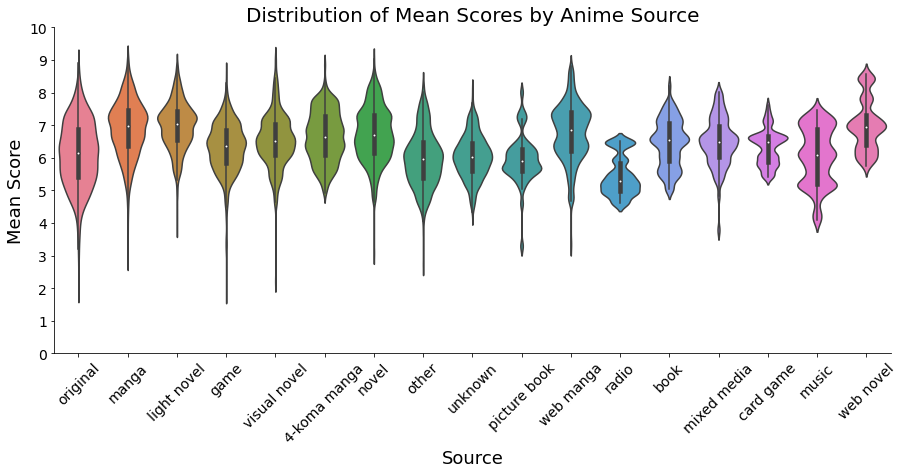

In [290]:
anime_source_cleaned = anime_ratings_source.copy()
anime_source_cleaned = anime_source_cleaned[anime_source_cleaned['source'] != '-']
plt.figure(figsize=(15, 6))
sns.violinplot(data=anime_source_cleaned, x='source', y='score', scale='width', bw=0.2, palette="husl")
sns.despine()  # Remove top and right spines
plt.xlabel('Source', fontsize=18)
plt.ylabel('Mean Score', fontsize=18)
plt.yticks(range(0, 11))
plt.title('Distribution of Mean Scores by Anime Source', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [291]:
# across all sources
kruskal_stat, p_value = kruskal(*source_ratings_dict.values())

print('Kruskal Wallis Test Statistic: ', kruskal_stat)
k_alpha = 0.005

print('alpha: ', k_alpha)
print('p value: ', p_value)

if p_value <= k_alpha:
    print("There is significant evidence to reject the null hypothesis.")
else:
    print("There is no significant evidence to reject the null hypothesis.")

Kruskal Wallis Test Statistic:  2144.413668723324
alpha:  0.005
p value:  0.0
There is significant evidence to reject the null hypothesis.


In [292]:
# bonferroni adjustment
adj = comb(len(source_ratings_dict), 2) # does not take into account e.g. tv vs tv
print('unique combinations: ', adj)
alpha = 0.005/adj
print('adjusted alpha: ', alpha)

unique combinations:  136
adjusted alpha:  3.6764705882352945e-05


In [294]:
sources = list(source_ratings_dict.keys())

source_sig_matrix = pd.DataFrame(index=sources, columns=sources)
source_effect_size_matrix = pd.DataFrame(index=sources, columns=sources)
source_power_matrix = pd.DataFrame(index=sources, columns=sources)
source_stat_matrix = pd.DataFrame(index=sources, columns=sources)

power_analysis = TTestIndPower()

p_values = {}
effect_sizes = {}
powers = {}
stats = {}

for source1 in sources:
    for source2 in sources:
        ratings1 = source_ratings_dict[source1]
        ratings2 = source_ratings_dict[source2]
        stat, p_value = mannwhitneyu(ratings1, ratings2)
        effect_size, effect_string = cliffs_delta(ratings1, ratings2)
        power = compute_mannwhitneyu_power(effect_size, len(ratings1), len(ratings2), alpha, n_simulations=1000)
#         power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(ratings1), alpha=alpha, alternative='two-sided')
        
        p_values[(source1, source2)] = p_value
        effect_sizes[(source1, source2)] = effect_size
        powers[(source1, source2)] = power
        stats[(source1, source2)] = stat
        
        source_stat_matrix.loc[source1, source2] = stats.get((source1, source2), stats.get((source2, source1)))
        
        source_sig_matrix.loc[source1, source2] = p_values.get((source1, source2), p_values.get((source2, source1)))
        source_effect_size_matrix.loc[source1, source2] = effect_sizes.get((source1, source2), effect_sizes.get((source2, source1)))
        power_value = powers.get((source1, source2), powers.get((source2, source1)))
        source_power_matrix.loc[source1, source2] = power_value

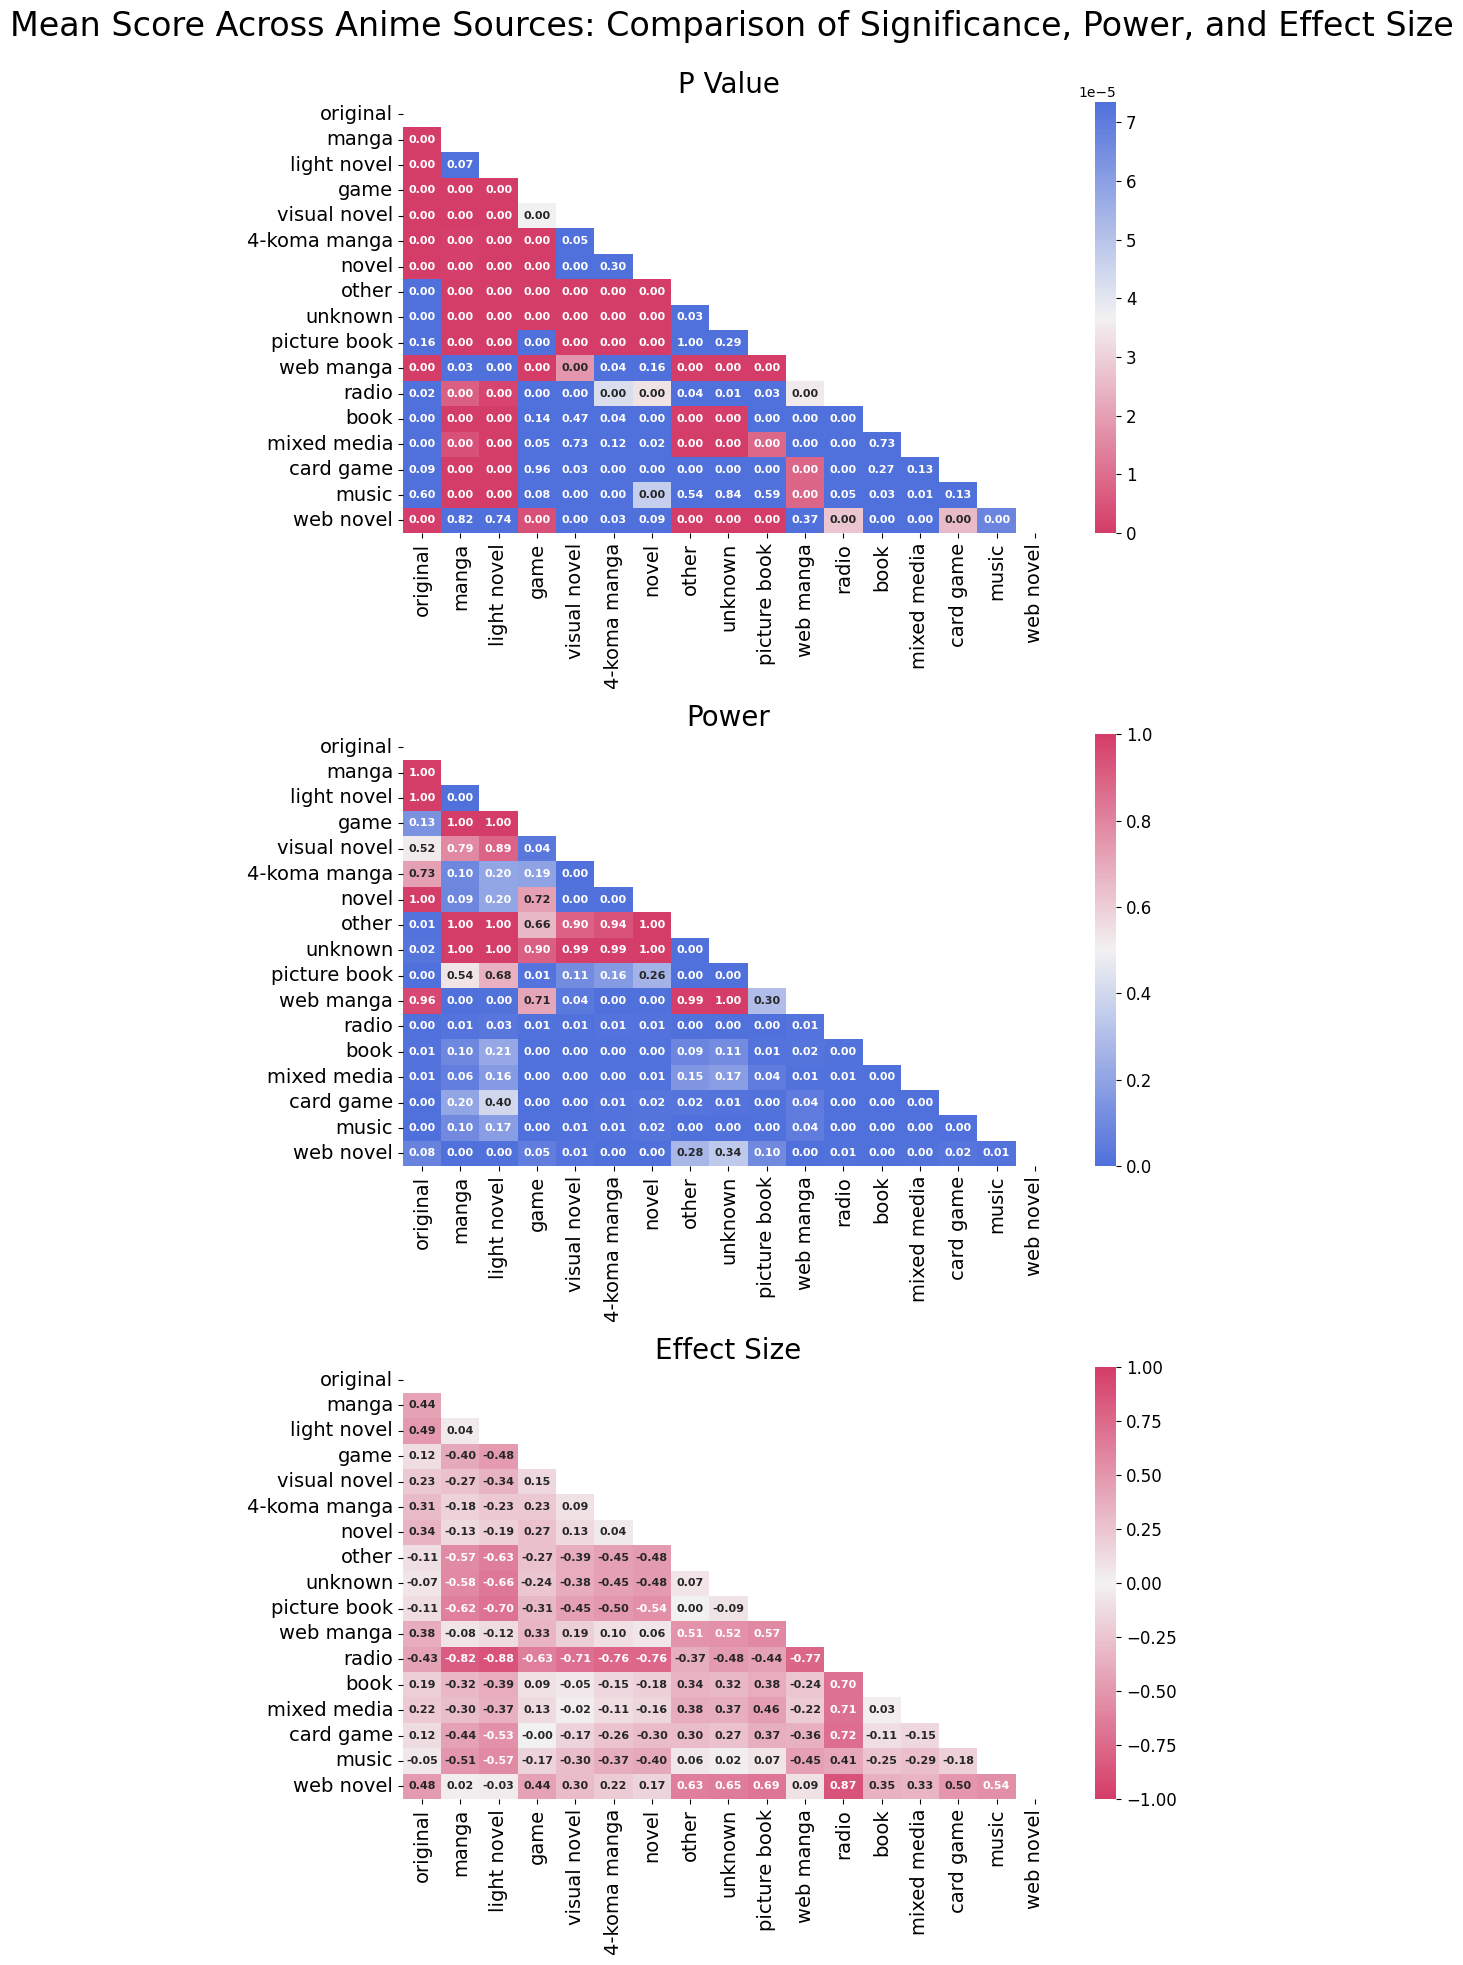

In [1046]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))  # Change the number of rows to 3
custom_map = sns.diverging_palette(0, 260, as_cmap=True)

# Plot the first heatmap (Significance)
source_sig_matrix.values[np.triu_indices_from(source_sig_matrix)] = np.nan
source_sig_matrix = source_sig_matrix.astype(float)
sns.heatmap(source_sig_matrix, ax=axs[0], annot=True, fmt=".2f", cmap=custom_map, linewidths=0, linecolor='black', vmin=0, vmax=alpha*2, annot_kws={"size": 8, "weight": "bold"})
axs[0].set_title('P Value', fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Plot the third heatmap (Power)
source_power_matrix.values[np.triu_indices_from(source_power_matrix)] = np.nan
source_power_matrix = source_power_matrix.astype(float)
sns.heatmap(source_power_matrix, ax=axs[1], annot=True, fmt=".2f", cmap=custom_map_r, linewidths=0, linecolor='black', vmin=0, vmax=1, annot_kws={"size": 8, "weight": "bold"})
axs[1].set_title('Power', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=14)

# Plot the second heatmap (Effect Size)
source_effect_size_matrix.values[np.triu_indices_from(source_effect_size_matrix)] = np.nan
source_effect_size_matrix = source_effect_size_matrix.astype(float)
sns.heatmap(source_effect_size_matrix, ax=axs[2], annot=True, fmt=".2f", cmap=custom_map_effect, linewidths=0, linecolor='black', vmin=-1, vmax=1, annot_kws={"size": 8, "weight": "bold"})
axs[2].set_title('Effect Size', fontsize=20)
axs[2].tick_params(axis='both', which='major', labelsize=14)

for ax in axs:
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=16)

fig.suptitle('Mean Score Across Anime Sources: Comparison of Significance, Power, and Effect Size\n', fontsize=24)
plt.tight_layout()
plt.show()

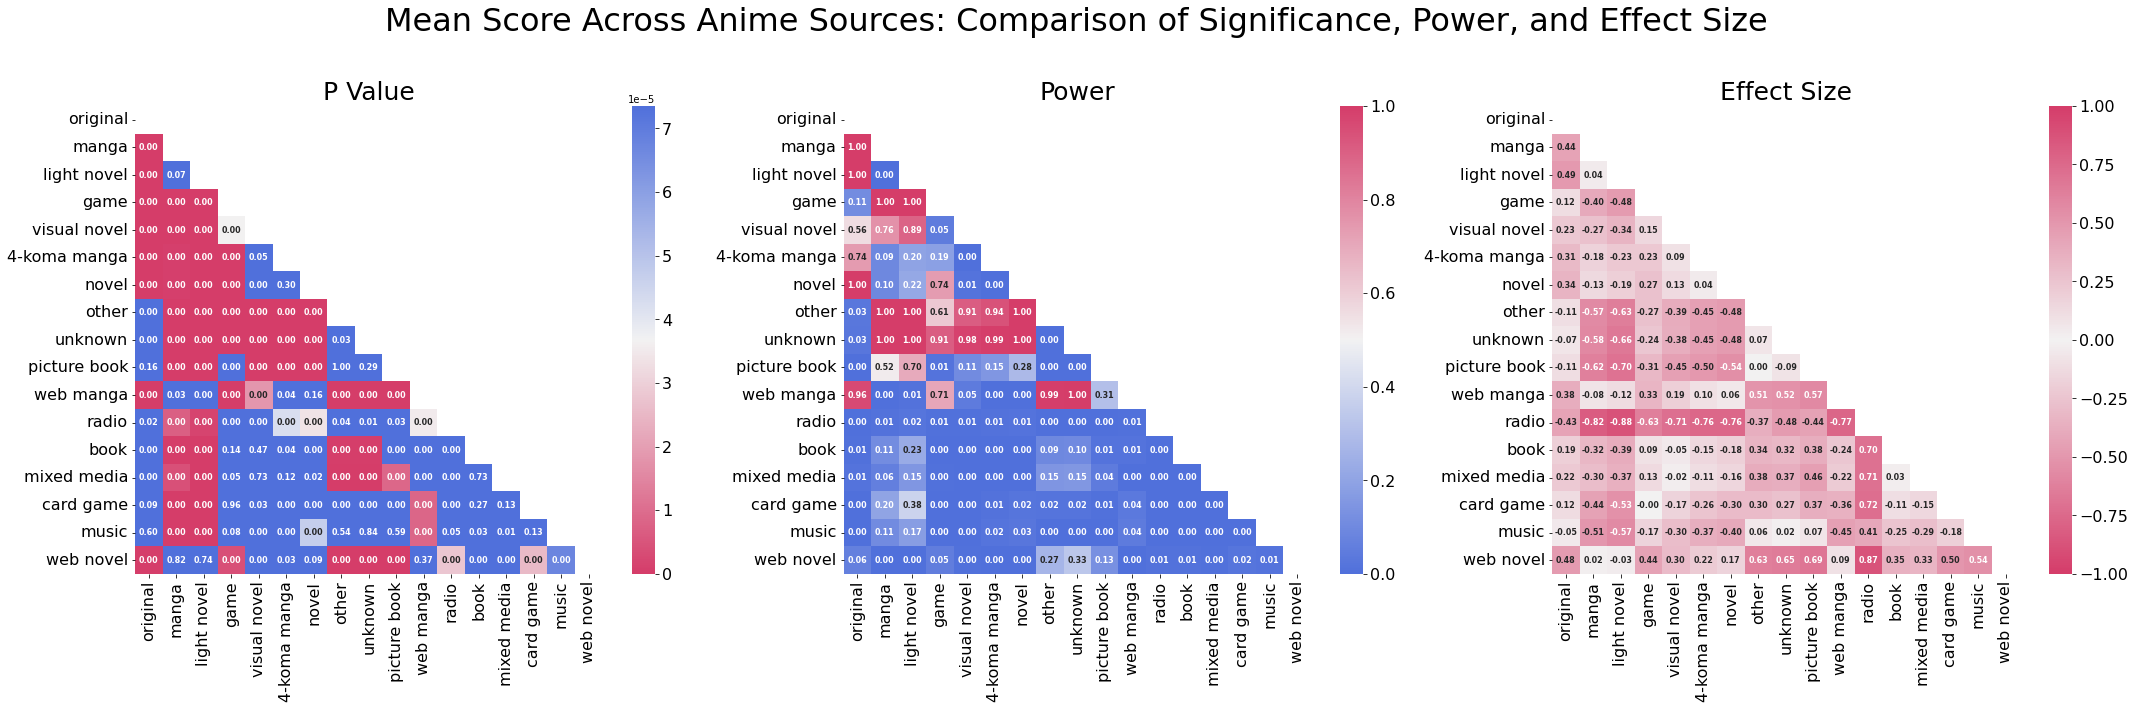

In [309]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # Change the number of rows to 3
custom_map = sns.diverging_palette(0, 260, as_cmap=True)

# Plot the first heatmap (Significance)
source_sig_matrix.values[np.triu_indices_from(source_sig_matrix)] = np.nan
source_sig_matrix = source_sig_matrix.astype(float)
sns.heatmap(source_sig_matrix, ax=axs[0], annot=True, fmt=".2f", cmap=custom_map, linewidths=0, linecolor='black', vmin=0, vmax=alpha*2, annot_kws={"size": 8, "weight": "bold"})
axs[0].set_title('P Value', fontsize=25)
axs[0].tick_params(axis='both', which='major', labelsize=16)

# Plot the third heatmap (Power)
source_power_matrix.values[np.triu_indices_from(source_power_matrix)] = np.nan
source_power_matrix = source_power_matrix.astype(float)
sns.heatmap(source_power_matrix, ax=axs[1], annot=True, fmt=".2f", cmap=custom_map_r, linewidths=0, linecolor='black', vmin=0, vmax=1, annot_kws={"size": 8, "weight": "bold"})
axs[1].set_title('Power', fontsize=25)
axs[1].tick_params(axis='both', which='major', labelsize=16)

# Plot the second heatmap (Effect Size)
source_effect_size_matrix.values[np.triu_indices_from(source_effect_size_matrix)] = np.nan
source_effect_size_matrix = source_effect_size_matrix.astype(float)
sns.heatmap(source_effect_size_matrix, ax=axs[2], annot=True, fmt=".2f", cmap=custom_map_effect, linewidths=0, linecolor='black', vmin=-1, vmax=1, annot_kws={"size": 8, "weight": "bold"})
axs[2].set_title('Effect Size', fontsize=25)
axs[2].tick_params(axis='both', which='major', labelsize=16)

for ax in axs:
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=16)

fig.suptitle('Mean Score Across Anime Sources: Comparison of Significance, Power, and Effect Size\n', fontsize=32)
plt.tight_layout()
plt.show()

In [1071]:
# pairs with sig p-value, large power, and large absolute effect size

indices = np.where(source_sig_matrix <= alpha)
rows = source_sig_matrix.index[indices[0]]
columns = source_sig_matrix.columns[indices[1]]
sig_pairs = list(zip(rows, columns))

indices = np.where(source_power_matrix >= 0.8)
rows = source_power_matrix.index[indices[0]]
columns = source_power_matrix.columns[indices[1]]
power_pairs = list(zip(rows, columns))

abs_effect_source_matrix = abs(source_effect_size_matrix)
indices = np.where(abs_effect_source_matrix >= 0.33)
rows = abs_effect_source_matrix.index[indices[0]]
columns = abs_effect_source_matrix.columns[indices[1]]
effect_pairs = list(zip(rows, columns))

sig_pairs_set = set(sig_pairs)
power_pairs_set = set(power_pairs)
effect_pairs_set = set(effect_pairs)

# find pairs that satisfy all three criteria
selected_pairs = sig_pairs_set.intersection(power_pairs_set, effect_pairs_set)

for pair in selected_pairs:
    row_index = source_sig_matrix.index.get_loc(pair[0])
    col_index = source_sig_matrix.columns.get_loc(pair[1])
    p_value = source_sig_matrix.iloc[row_index, col_index]
    
    row_index = source_power_matrix.index.get_loc(pair[0])
    col_index = source_power_matrix.columns.get_loc(pair[1])
    power = source_power_matrix.iloc[row_index, col_index]
    
    row_index = abs_effect_source_matrix.index.get_loc(pair[0])
    col_index = abs_effect_source_matrix.columns.get_loc(pair[1])
    effect_size = abs_effect_source_matrix.iloc[row_index, col_index]
    
    row_index = source_stat_matrix.index.get_loc(pair[0])
    col_index = source_stat_matrix.columns.get_loc(pair[1])
    stat = source_stat_matrix.iloc[row_index, col_index]
    
    print("Pair:", pair)
    print("Mann Whitney U Test Statistic:", stat)
    print("P-value:", p_value)
    print("Effect size:", effect_size)
    print("Power:", power)
    print()

Pair: ('web manga', 'unknown')
Mann Whitney U Test Statistic: 326692.0
P-value: 2.2123169988644372e-45
Effect size: 0.5243899024777192
Power: 1.0

Pair: ('web manga', 'other')
Mann Whitney U Test Statistic: 98950.0
P-value: 3.935177279154979e-32
Effect size: 0.5131126232892423
Power: 0.994

Pair: ('visual novel', 'light novel')
Mann Whitney U Test Statistic: 105269.0
P-value: 2.2598779162650403e-21
Effect size: 0.33969163990365314
Power: 0.894

Pair: ('web manga', 'original')
Mann Whitney U Test Statistic: 701448.0
P-value: 1.8678209305984168e-26
Effect size: 0.37548263116096203
Power: 0.965

Pair: ('unknown', 'novel')
Mann Whitney U Test Statistic: 202691.0
P-value: 1.5612192218784402e-60
Effect size: 0.48053522368475005
Power: 1.0

Pair: ('other', 'novel')
Mann Whitney U Test Statistic: 61998.5
P-value: 2.663835246800278e-38
Effect size: 0.47928425048713297
Power: 0.999

Pair: ('game', 'light novel')
Mann Whitney U Test Statistic: 188320.0
P-value: 7.2650763366404115e-65
Effect size:

#### $\color{green}{\textbf{Does user gender influence anime ratings: Kruskal-Wallis/Mann Whitney U}}$

In [9]:
user_df

Mal ID    Username  Gender                   Birthday  \
0             1       Xinil    Male  1985-03-04T00:00:00+00:00   
1             3     Aokaado    Male                        NaN   
2             4     Crystal  Female                        NaN   
3             9      Arcane     NaN                        NaN   
4            18         Mad     NaN                        NaN   
...         ...         ...     ...                        ...   
731285  1291083      Dolopa     NaN                        NaN   
731286  1291085  alenrobnik     NaN                        NaN   
731287  1291087   Oblongata     NaN  1993-01-30T00:00:00+00:00   
731288  1291091      Etnota     NaN                        NaN   
731289  1291097  JuunanaSai  Female                        NaN   

                    Location                     Joined  Days Watched  \
0                 California  2004-11-05T00:00:00+00:00         142.3   
1               Oslo, Norway  2004-11-11T00:00:00+00:00          68.6   
2       Melbourne, Australia  2004-11-13T00:00:00+00:00         212.8   
3                        NaN  2004-12-05T00:00:00+00:00          30.0   
4                        NaN  2005-01-03T00:00:00+00:00          52.0   
...                      ...                        ...           ...   
731285                   NaN  2012-05-06T00:00:00+00:00           0.0   
731286                   NaN  2012-05-06T00:00:00+00:00          21.4   
731287                   NaN  2012-05-06T00:00:00+00:00          51.3   
731288                   NaN  2012-05-06T00:00:00+00:00           0.0   
731289                   NaN  2012-05-06T00:00:00+00:00           3.7   

        Mean Score  Watching  Completed  On Hold  Dropped  Plan to Watch  \
0             7.37       1.0      233.0      8.0     93.0           64.0   
1             7.34      23.0      137.0     99.0     44.0           40.0   
2             6.68      16.0      636.0    303.0      0.0           45.0   
3             7.71       5.0       54.0      4.0      3.0            0.0   
4             6.27       1.0      114.0     10.0      5.0           23.0   
...            ...       ...        ...      ...      ...            ...   
731285        0.00       0.0        0.0      0.0      0.0            0.0   
731286        8.22      16.0       58.0      9.0      1.0           42.0   
731287        7.53      38.0      175.0      0.0      9.0          211.0   
731288        0.00       0.0        0.0      0.0      0.0            0.0   
731289        9.67       1.0       11.0      0.0      0.0            2.0   

        Total Entries  Rewatched  Episodes Watched  
0               399.0       60.0            8458.0  
1               343.0       15.0            4072.0  
2              1000.0       10.0           12781.0  
3                66.0        0.0            1817.0  
4               153.0       42.0            3038.0  
...               ...        ...               ...  
731285            0.0        0.0               0.0  
731286          126.0        0.0            1239.0  
731287          433.0        2.0            3010.0  
731288            0.0        0.0               0.0  
731289           14.0        0.0             222.0  

[731290 rows x 16 columns]

filtering on users who actually have a watch history that's not 0 - could be registered users that never came back or did not have their behavior logged for some reason (watched outside of account etc.)

In [12]:
print('total registered users: ', len(user_df))
print('registered users with mean score equal 0.0: ', len(user_df[user_df['Mean Score'] == 0.0]))
print('registered users with mean score greater than 0.0', len(user_df[user_df['Mean Score'] > 0.0])) 

total registered users:  731290
registered users with mean score equal 0.0:  376196
registered users with mean score greater than 0.0 355086


In [13]:
user_df[(user_df['Mean Score'] > 0.0) & (user_df['Mean Score'] < 1.0)]

Empty DataFrame
Columns: [Mal ID, Username, Gender, Birthday, Location, Joined, Days Watched, Mean Score, Watching, Completed, On Hold, Dropped, Plan to Watch, Total Entries, Rewatched, Episodes Watched]
Index: []

no registered users have scores inbetween 0 and 1 (exclusive), they have at least a score of 1 or more. Need to check if there are any discrepancies with other feature (total entries)

In [14]:
# there are some users who have a mean score of 0, getting rid of any scores exactly 0
user_scores_cleaned = user_df[(user_df['Mean Score'] > 0.0) & (user_df['Total Entries'] > 1.0)]
user_scores_cleaned

Mal ID    Username  Gender                   Birthday  \
0             1       Xinil    Male  1985-03-04T00:00:00+00:00   
1             3     Aokaado    Male                        NaN   
2             4     Crystal  Female                        NaN   
3             9      Arcane     NaN                        NaN   
4            18         Mad     NaN                        NaN   
...         ...         ...     ...                        ...   
731280  1291057    imjustjk    Male  1997-12-24T00:00:00+00:00   
731284  1291079      Dybido    Male                        NaN   
731286  1291085  alenrobnik     NaN                        NaN   
731287  1291087   Oblongata     NaN  1993-01-30T00:00:00+00:00   
731289  1291097  JuunanaSai  Female                        NaN   

                         Location                     Joined  Days Watched  \
0                      California  2004-11-05T00:00:00+00:00         142.3   
1                    Oslo, Norway  2004-11-11T00:00:00+00:00          68.6   
2            Melbourne, Australia  2004-11-13T00:00:00+00:00         212.8   
3                             NaN  2004-12-05T00:00:00+00:00          30.0   
4                             NaN  2005-01-03T00:00:00+00:00          52.0   
...                           ...                        ...           ...   
731280  Newport Coast, California  2012-05-06T00:00:00+00:00         101.9   
731284                        NaN  2012-05-06T00:00:00+00:00          41.0   
731286                        NaN  2012-05-06T00:00:00+00:00          21.4   
731287                        NaN  2012-05-06T00:00:00+00:00          51.3   
731289                        NaN  2012-05-06T00:00:00+00:00           3.7   

        Mean Score  Watching  Completed  On Hold  Dropped  Plan to Watch  \
0             7.37       1.0      233.0      8.0     93.0           64.0   
1             7.34      23.0      137.0     99.0     44.0           40.0   
2             6.68      16.0      636.0    303.0      0.0           45.0   
3             7.71       5.0       54.0      4.0      3.0            0.0   
4             6.27       1.0      114.0     10.0      5.0           23.0   
...            ...       ...        ...      ...      ...            ...   
731280        7.00       3.0      181.0      5.0     19.0           34.0   
731284        8.48       2.0       88.0      7.0      5.0           33.0   
731286        8.22      16.0       58.0      9.0      1.0           42.0   
731287        7.53      38.0      175.0      0.0      9.0          211.0   
731289        9.67       1.0       11.0      0.0      0.0            2.0   

        Total Entries  Rewatched  Episodes Watched  
0               399.0       60.0            8458.0  
1               343.0       15.0            4072.0  
2              1000.0       10.0           12781.0  
3                66.0        0.0            1817.0  
4               153.0       42.0            3038.0  
...               ...        ...               ...  
731280          242.0       19.0            7015.0  
731284          135.0        0.0            3317.0  
731286          126.0        0.0            1239.0  
731287          433.0        2.0            3010.0  
731289           14.0        0.0             222.0  

[334985 rows x 16 columns]

In [15]:
sum(user_scores_cleaned['Gender'].isna())

148347

In [16]:
sum(user_scores_cleaned['Gender'].isna())/len(user_scores_cleaned)

0.44284669462811765

Nulls in mean score:  0


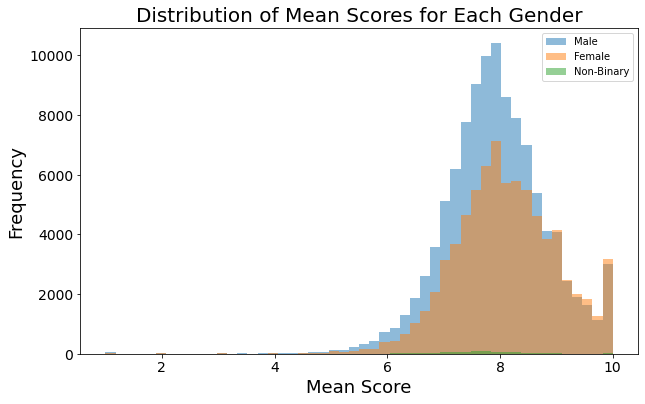

In [17]:
gender_scores = user_scores_cleaned[['Mal ID', 'Gender', 'Mean Score']]
gender_scores_cleaned = gender_scores.copy()
gender_scores_cleaned.dropna(subset=['Gender'], inplace=True)
print('Nulls in mean score: ', sum(gender_scores_cleaned['Mean Score'].isna()))
gender_scores_cleaned.dropna(subset=['Mean Score'], inplace=True)

unique_genders = gender_scores_cleaned['Gender'].unique()

plt.figure(figsize=(10,6))

gender_score_dict = {}
for gender in unique_genders:
    scores = np.array(gender_scores_cleaned[gender_scores_cleaned['Gender'] == gender]['Mean Score'])
    gender_score_dict[gender] = scores
    plt.hist(scores, bins=50, alpha=0.5, label=gender)

plt.xlabel('Mean Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Distribution of Mean Scores for Each Gender', fontsize=20)
plt.legend(loc='best')
plt.show()

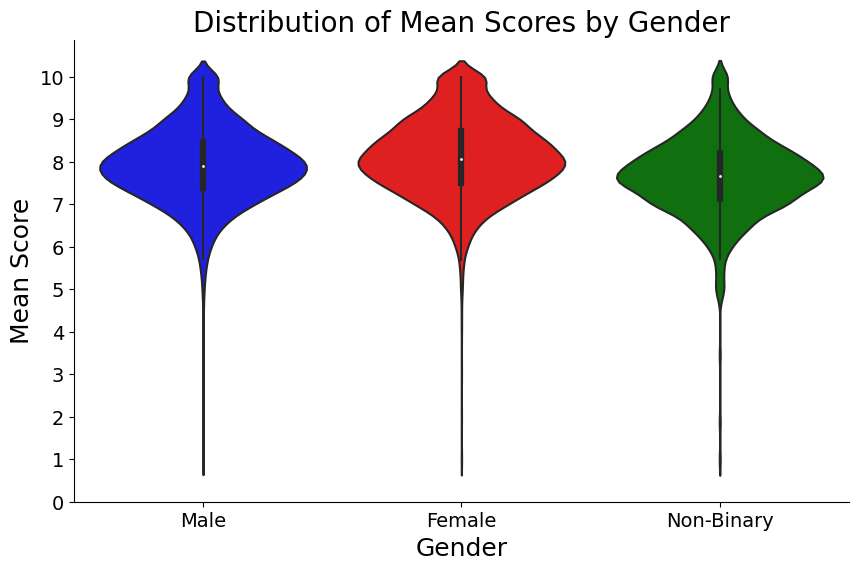

In [1053]:
custom_palette = {'Male': 'blue', 'Female': 'red', 'Non-Binary': 'green'}
plt.figure(figsize=(10, 6))
sns.violinplot(data=gender_scores_cleaned, x='Gender', y='Mean Score', scale='width', bw=0.2, palette=custom_palette)
sns.despine()
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Mean Score', fontsize=18)
plt.title('Distribution of Mean Scores by Gender', fontsize=20)
plt.yticks(range(0, 11))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [1054]:
# across all genders
kruskal_stat, p_value = kruskal(*gender_score_dict.values())

print('Kruskal Wallis Test Statistic: ', kruskal_stat)
k_alpha = 0.005

print('alpha: ', k_alpha)
print('p value: ', p_value)

if p_value <= k_alpha:
    print("There is significant evidence to reject the null hypothesis.")
else:
    print("There is no significant evidence to reject the null hypothesis.")

Kruskal Wallis Test Statistic:  2024.7890830632057
alpha:  0.005
p value:  0.0
There is significant evidence to reject the null hypothesis.


In [1056]:
# bonferroni adjustment
adj = comb(len(gender_score_dict), 2) # does not take into account e.g. tv vs tv
print('bonferroni adjustment: ', adj)
alpha = 0.005/adj
print('adjusted alpha: ', alpha)

bonferroni adjustment:  3
adjusted alpha:  0.0016666666666666668


In [1057]:
genders = list(gender_score_dict.keys())

gender_sig_matrix = pd.DataFrame(index=genders, columns=genders)
gender_effect_size_matrix = pd.DataFrame(index=genders, columns=genders)
gender_power_matrix = pd.DataFrame(index=genders, columns=genders)
gender_stat_matrix = pd.DataFrame(index=genders, columns=genders)

power_analysis = TTestIndPower()

p_values = {}
effect_sizes = {}
powers = {}
stats = {}

for gender1 in genders:
    for gender2 in genders:
        ratings1 = gender_score_dict[gender1]
        ratings2 = gender_score_dict[gender2]
        stat, p_value = mannwhitneyu(ratings1, ratings2)
        effect_size, effect_string = cliffs_delta(ratings1, ratings2)
        power = compute_mannwhitneyu_power(effect_size, len(ratings1), len(ratings2), alpha, n_simulations=1000)
#         power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(ratings1), alpha=alpha, alternative='two-sided')
        
        p_values[(gender1, gender2)] = p_value
        effect_sizes[(gender1, gender2)] = effect_size
        powers[(gender1, gender2)] = power
        stats[(gender1, gender2)] = stat
        
        gender_stat_matrix.loc[gender1, gender2] = stats.get((gender1, gender2), stats.get((gender2, gender1)))
        
        gender_sig_matrix.loc[gender1, gender2] = p_values.get((gender1, gender2), p_values.get((gender2, gender1)))
        gender_effect_size_matrix.loc[gender1, gender2] = effect_sizes.get((gender1, gender2), effect_sizes.get((gender2, gender1)))
        power_value = powers.get((gender1, gender2), powers.get((gender2, gender1)))
        gender_power_matrix.loc[gender1, gender2] = power_value

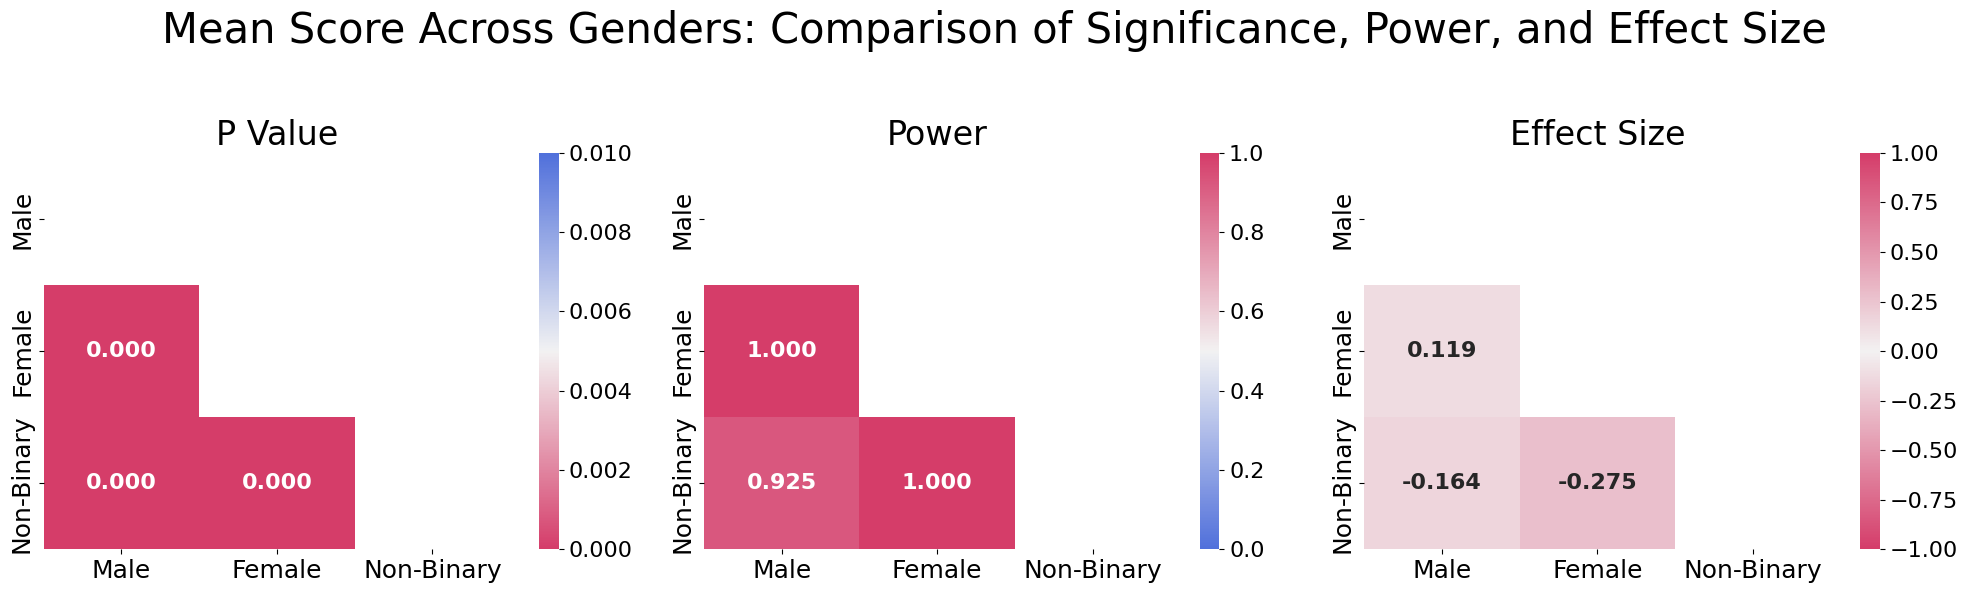

In [1091]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first heatmap (Significance)
gender_sig_matrix.values[np.triu_indices_from(gender_sig_matrix)] = np.nan
gender_sig_matrix = gender_sig_matrix.astype(float)
sns.heatmap(gender_sig_matrix, ax=axs[0], annot=True, fmt=".3f", cmap=custom_map, linewidths=0, linecolor='black', vmin=0, vmax=0.01, annot_kws={"size": 16, "weight": "bold"})
axs[0].set_title('P Value', fontsize=24)
axs[0].tick_params(axis='both', which='major', labelsize=18)

# Plot the third heatmap (Power)
gender_power_matrix.values[np.triu_indices_from(gender_power_matrix)] = np.nan
gender_power_matrix = gender_power_matrix.astype(float)
sns.heatmap(gender_power_matrix, ax=axs[1], annot=True, fmt=".3f", cmap=custom_map_r, linewidths=0, linecolor='black', vmin=0, vmax=1, annot_kws={"size": 16, "weight": "bold"})
axs[1].set_title('Power', fontsize=24)
axs[1].tick_params(axis='both', which='major', labelsize=18)

# Plot the second heatmap (Effect Size)
gender_effect_size_matrix.values[np.triu_indices_from(gender_effect_size_matrix)] = np.nan
gender_effect_size_matrix = gender_effect_size_matrix.astype(float)
sns.heatmap(gender_effect_size_matrix, ax=axs[2], annot=True, fmt=".3f", cmap=custom_map_effect, linewidths=0, linecolor='black', vmin=-1, vmax=1, annot_kws={"size": 16, "weight": "bold"})
axs[2].set_title('Effect Size', fontsize=24)
axs[2].tick_params(axis='both', which='major', labelsize=18)

for ax in axs:
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)

fig.suptitle('Mean Score Across Genders: Comparison of Significance, Power, and Effect Size\n', fontsize=30)
plt.tight_layout()
plt.show()

In [1059]:
# pairs with sig p-value, large power, and large absolute effect size

indices = np.where(gender_sig_matrix <= alpha)
rows = gender_sig_matrix.index[indices[0]]
columns = gender_sig_matrix.columns[indices[1]]
sig_pairs = list(zip(rows, columns))

indices = np.where(gender_power_matrix >= 0.8)
rows = gender_power_matrix.index[indices[0]]
columns = gender_power_matrix.columns[indices[1]]
power_pairs = list(zip(rows, columns))

abs_effect_gender_matrix = abs(gender_effect_size_matrix)
indices = np.where(abs_effect_gender_matrix >= 0.33)
rows = abs_effect_gender_matrix.index[indices[0]]
columns = abs_effect_gender_matrix.columns[indices[1]]
effect_pairs = list(zip(rows, columns))

sig_pairs_set = set(sig_pairs)
power_pairs_set = set(power_pairs)
effect_pairs_set = set(effect_pairs)

# find pairs that satisfy all three criteria
selected_pairs = sig_pairs_set.intersection(power_pairs_set, effect_pairs_set)

for pair in selected_pairs:
    row_index = gender_sig_matrix.index.get_loc(pair[0])
    col_index = gender_sig_matrix.columns.get_loc(pair[1])
    p_value = gender_sig_matrix.iloc[row_index, col_index]
    
    row_index = gender_power_matrix.index.get_loc(pair[0])
    col_index = gender_power_matrix.columns.get_loc(pair[1])
    power = gender_power_matrix.iloc[row_index, col_index]
    
    row_index = abs_effect_gender_matrix.index.get_loc(pair[0])
    col_index = abs_effect_gender_matrix.columns.get_loc(pair[1])
    effect_size = abs_effect_gender_matrix.iloc[row_index, col_index]
    
    row_index = gender_stat_matrix.index.get_loc(pair[0])
    col_index = gender_stat_matrix.columns.get_loc(pair[1])
    stat = gender_stat_matrix.iloc[row_index, col_index]
    
    print("Pair:", pair)
    print("Mann Whitney U Test Statistic:", stat)
    print("P-value:", p_value)
    print("Effect size:", effect_size)
    print("Power:", power)
    print()

while all gender pairs seemed to have p-value lower than sig level, as well as high power, their effect sizes were generally small/negligble

#### $\color{green}{\textbf{Is there a correlation between the number of episodes in an anime and user ratings: correlation analysis}}$

In [933]:
anime_ratings_eps = anime_ratings_cleaned[['id', 'title', 'type', 'episodes', 'score']]
anime_ratings_eps

id                                              title     type  \
0          1                                       cowboy bebop       tv   
1          5                     cowboy bebop tengoku no tobira    movie   
2          6                                             trigun       tv   
3          7                                 witch hunter robin       tv   
4          8                                     bouken ou beet       tv   
...      ...                                                ...      ...   
23463  55315          gensou mangekyou the memories of phantasm      ova   
23483  55339         mashle mash burnedead to fushigi na tegami  special   
23493  55355  li shi zhentan shiwusuo a day in lungmen - hom...      ona   
23623  55517         the idolm ster cinderella girls u149 recap  special   
23696  55647  one piece dai gekisen tokushuu hangeki doumei ...  special   

       episodes  score  
0            26   8.75  
1             1   8.38  
2            26   8.22  
3            26   7.25  
4            52   6.94  
...         ...    ...  
23463        18   7.78  
23483         1   5.84  
23493         1   5.99  
23623         1   6.07  
23696         1   6.29  

[12643 rows x 5 columns]

Correlation between scores and episodes: 0.06335953232085831


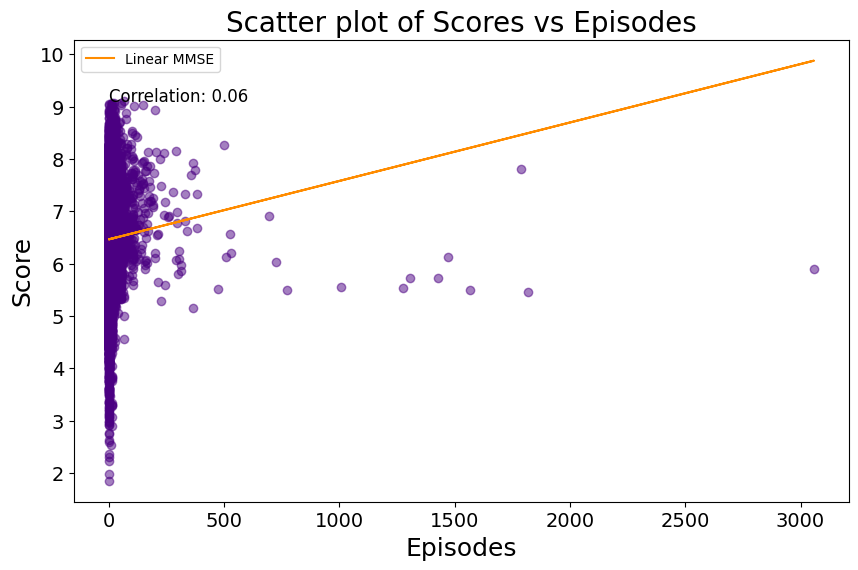

In [789]:
# across all types
from sklearn.linear_model import LinearRegression

correlation = anime_ratings_eps['episodes'].corr(anime_ratings_eps['score'])
print("Correlation between scores and episodes:", correlation)

# Convert to NumPy arrays and reshape for scikit-learn
X_r = anime_ratings_eps['episodes'].values.reshape(-1, 1)
y_r = anime_ratings_eps['score'].values.reshape(-1, 1)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_r, y_r)

# Predict y using the model
y_pred = model.predict(X_r)

plt.figure(figsize=(10,6))
plt.scatter(anime_ratings_eps['episodes'], anime_ratings_eps['score'], color='indigo', marker='o', alpha=0.5)
plt.plot(anime_ratings_eps['episodes'], y_pred.flatten(), color='darkorange', label='Linear MMSE')
plt.title(f'Scatter plot of Scores vs Episodes', fontsize=20)
plt.xlabel('Episodes', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.text(anime_ratings_eps['episodes'].min(), anime_ratings_eps['score'].max(), f'Correlation: {correlation:.2f}', fontsize=12)
plt.show()

Episode Stats for movie:
  count    2466.000000
mean        1.093674
std         0.860530
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        23.000000
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime movie: 0.017775834495588175


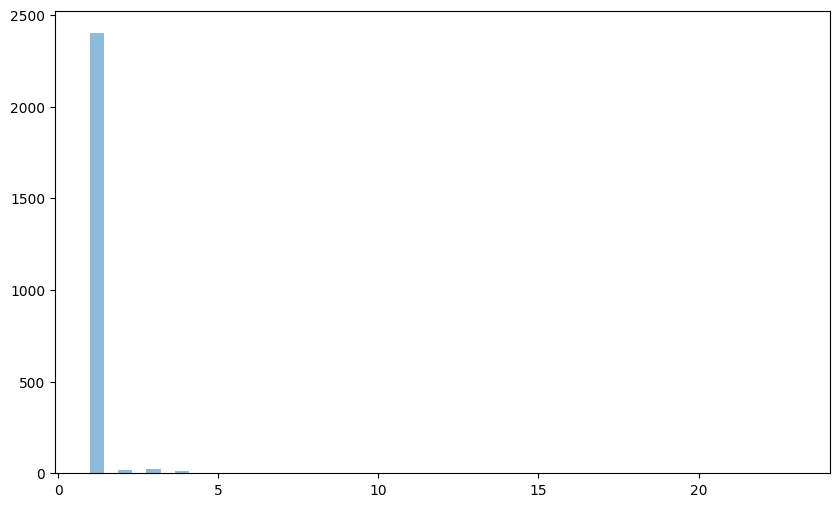

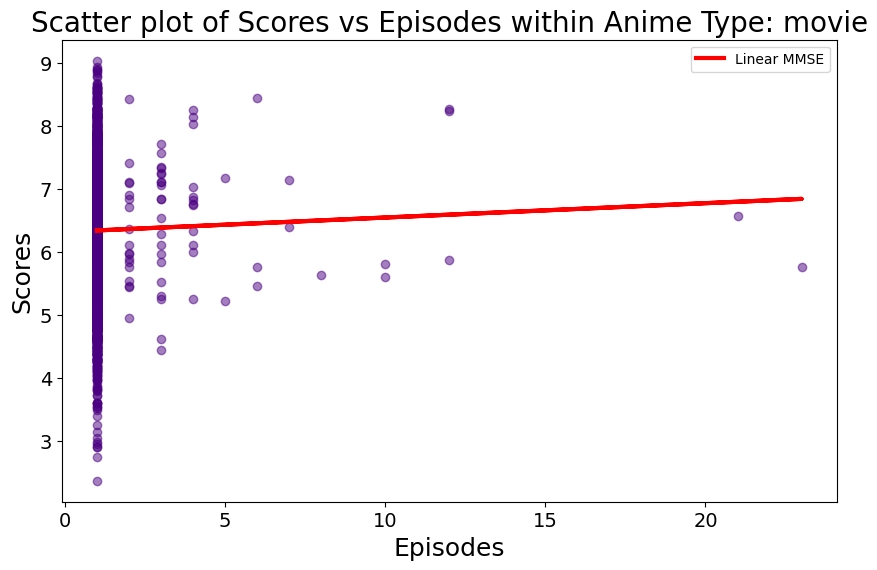

Episode Stats for tv:
  count    4456.000000
mean       31.217908
std        85.815943
min         2.000000
25%        12.000000
50%        13.000000
75%        26.000000
max      3057.000000
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime tv: -0.03645156482243485


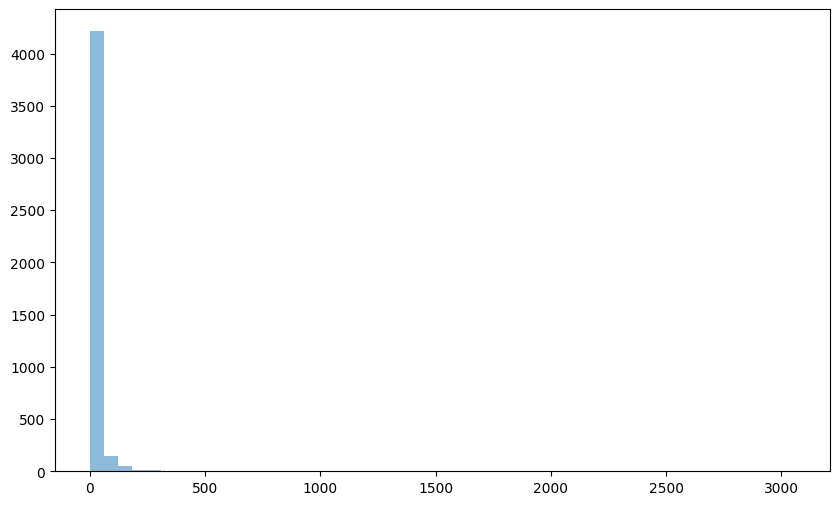

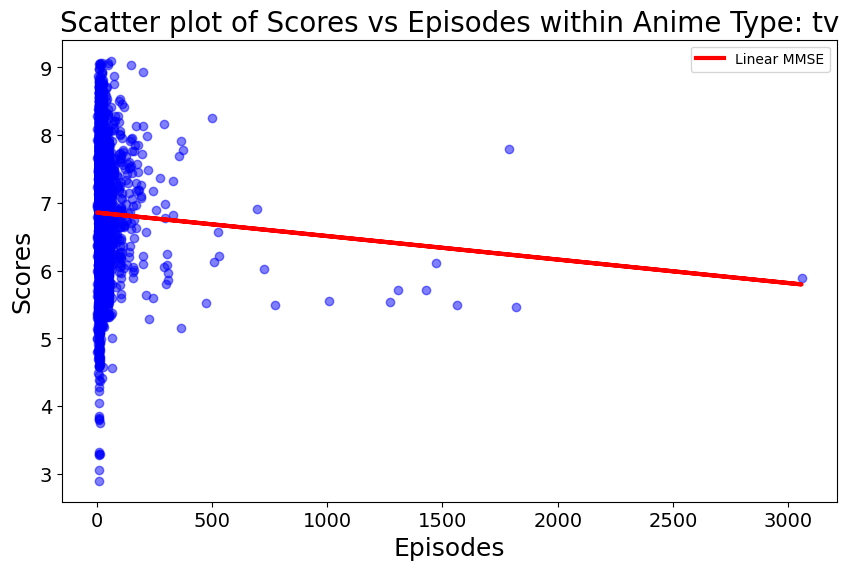

Episode Stats for special:
  count    2002.000000
mean        2.501499
std         3.601911
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        51.000000
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime special: 0.061287520254889746


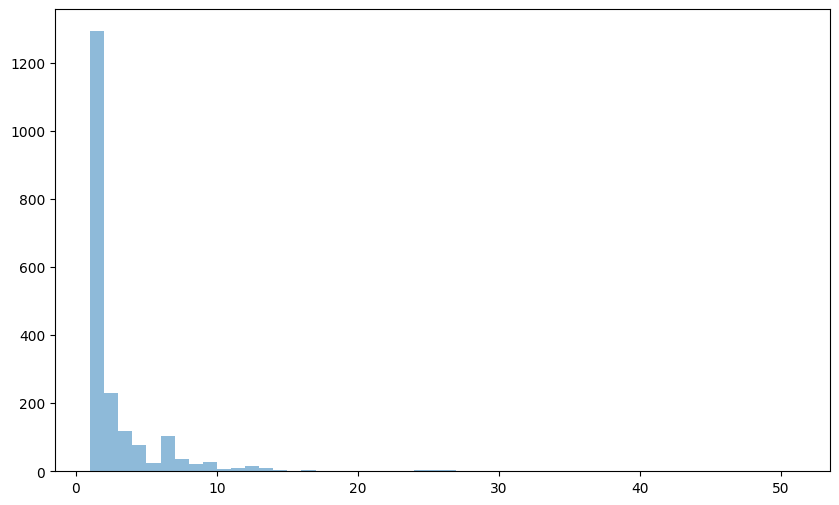

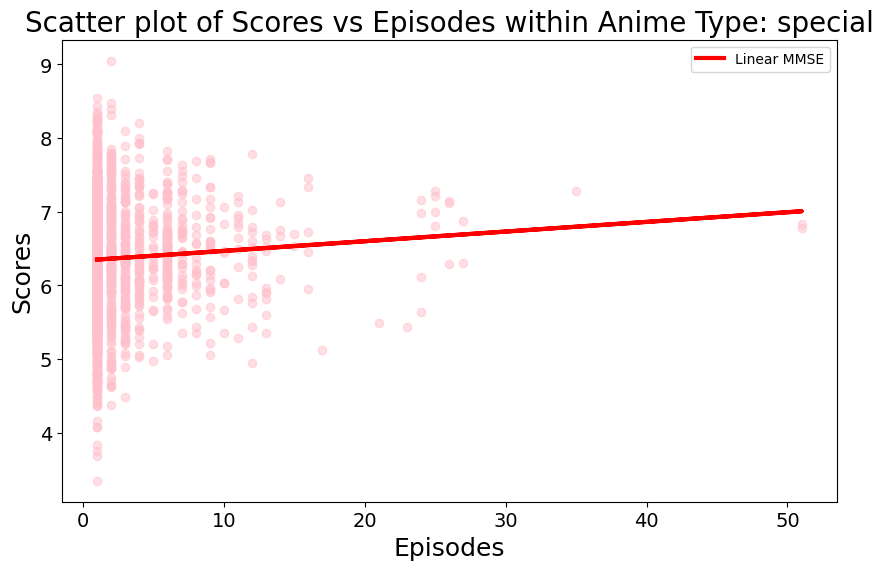

Episode Stats for ova:
  count    1869.000000
mean        2.673622
std         3.880917
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       110.000000
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime ova: 0.2104730625308014


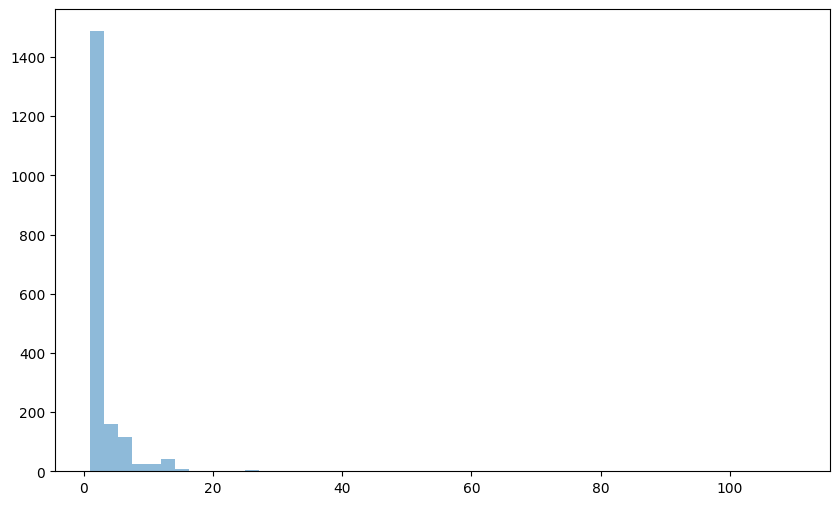

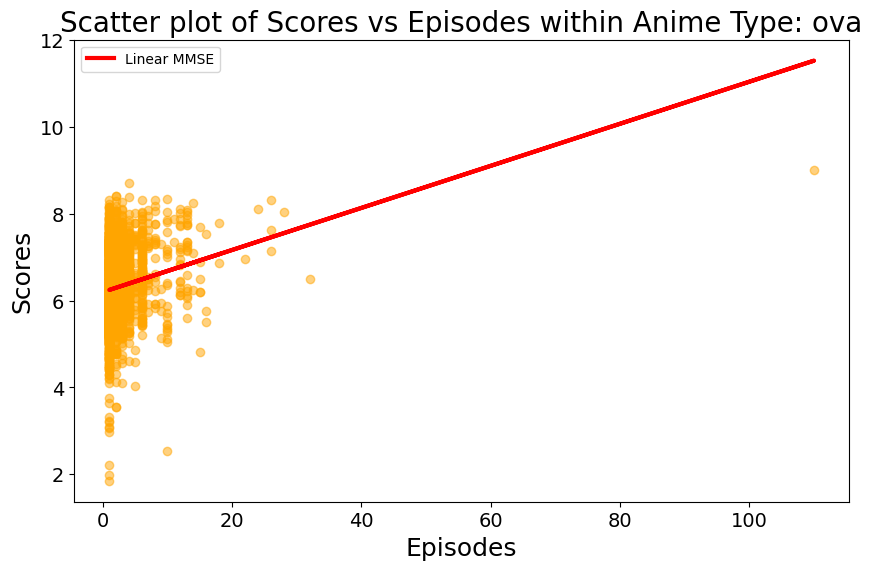

Episode Stats for ona:
  count    1849.000000
mean       10.568956
std        22.870110
min         1.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       384.000000
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime ona: 0.23590795618898422


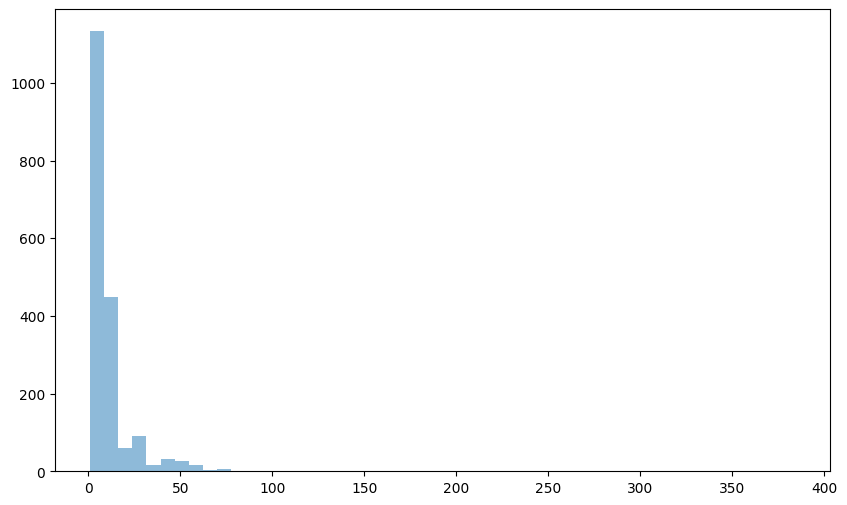

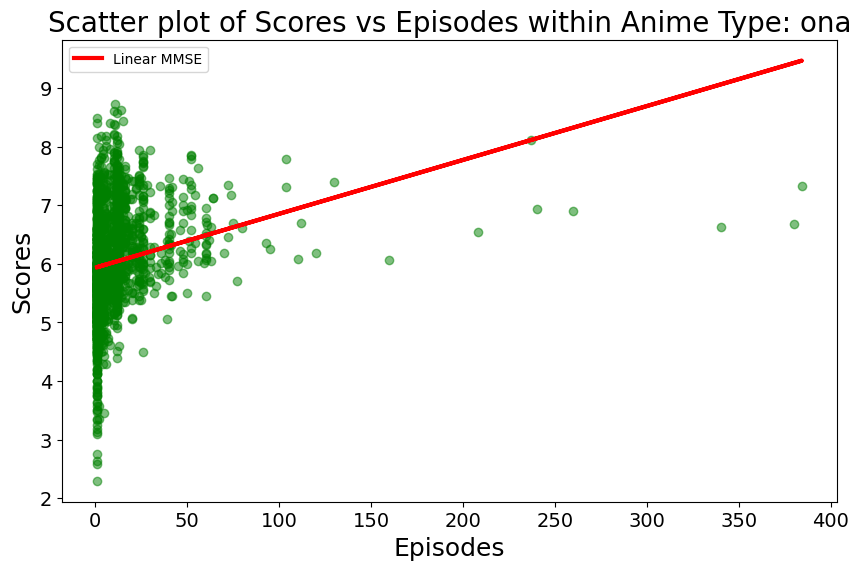

In [807]:
color_lst = ['indigo', 'blue', 'pink', 'orange', 'green']
for color, type in zip(color_lst, anime_types):
    if type != '-':
        anime_ratings_eps_type = anime_ratings_eps[anime_ratings_eps['type'] == type]
        print(f'Episode Stats for {type}:\n ', anime_ratings_eps_type['episodes'].describe())
        correlation = anime_ratings_eps_type['episodes'].corr(anime_ratings_eps_type['score'])
        print(f"Correlation between episodes and scores within Anime {type}:", correlation)
        plt.figure(figsize=(10,6))
        plt.hist(anime_ratings_eps_type['episodes'], bins=50, alpha=0.5, label=gender)
        plt.show()

        X_r = anime_ratings_eps_type['episodes'].values.reshape(-1, 1)
        y_r = anime_ratings_eps_type['score'].values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(X_r, y_r)
        y_pred = model.predict(X_r)

        plt.figure(figsize=(10,6))
        plt.scatter(anime_ratings_eps_type['episodes'], anime_ratings_eps_type['score'], color=color, marker='o', alpha=0.5)
        plt.plot(anime_ratings_eps_type['episodes'], y_pred.flatten(), color='red', label='Linear MMSE', linewidth=3)
        plt.title(f'Scatter plot of Scores vs Episodes within Anime Type: {type}', fontsize=20)
        plt.xlabel('Episodes', fontsize=18)
        plt.ylabel('Scores', fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend()
        plt.show()

Look into removal of outliers in number of episodes per specific type

In [811]:
color_lst = ['indigo', 'blue', 'pink', 'orange', 'green']
for color, type in zip(color_lst, anime_types):
    if type != '-':
        anime_ratings_eps_type = anime_ratings_eps[anime_ratings_eps['type'] == type]
        print(f'Episode Stats for {type}:\n', anime_ratings_eps_type['episodes'].describe())
        Q1 = np.percentile(anime_ratings_eps_type['episodes'], 25)
        Q3 = np.percentile(anime_ratings_eps_type['episodes'], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = (anime_ratings_eps_type['episodes'] < lower_bound) | (anime_ratings_eps_type['episodes'] > upper_bound)
        anime_ratings_eps_type_no_outliers = anime_ratings_eps_type[~outliers_iqr]
        print(f'Episode Stats (without outliers) for {type}:\n', anime_ratings_eps_type_no_outliers['episodes'].describe())
        
        correlation = anime_ratings_eps_type_no_outliers['episodes'].corr(anime_ratings_eps_type_no_outliers['score'])
        print(f"Correlation between episodes and scores within Anime {type}:", correlation)


Episode Stats for movie:
 count    2466.000000
mean        1.093674
std         0.860530
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        23.000000
Name: episodes, dtype: float64
Episode Stats (without outliers) for movie:
 count    2400.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: episodes, dtype: float64
Correlation between episodes and scores within Anime movie: nan
Episode Stats for tv:
 count    4456.000000
mean       31.217908
std        85.815943
min         2.000000
25%        12.000000
50%        13.000000
75%        26.000000
max      3057.000000
Name: episodes, dtype: float64
Episode Stats (without outliers) for tv:
 count    3725.000000
mean       17.684027
std         8.743067
min         2.000000
25%        12.000000
50%        13.000000
75%        25.000000
max        47.000000
Name: episodes, dtype: float64
Correlation between episodes and scores with

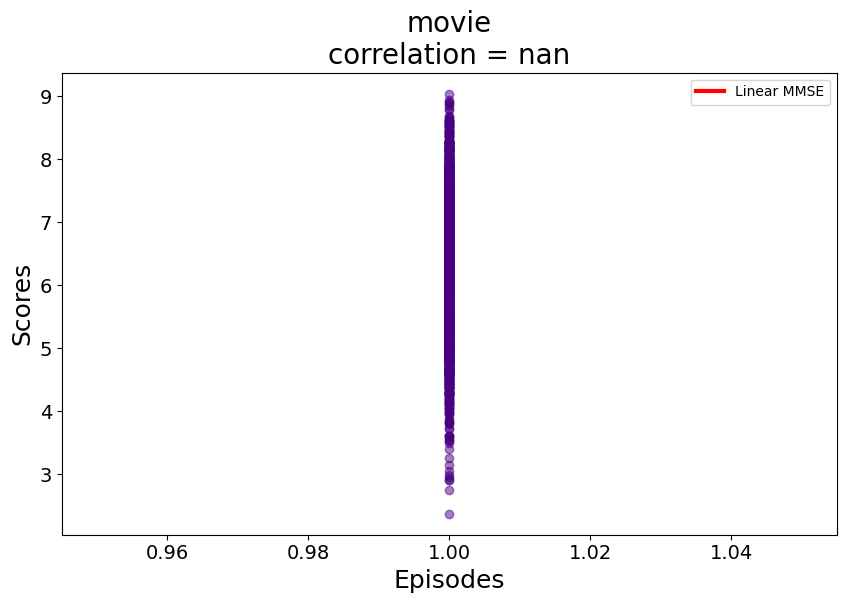

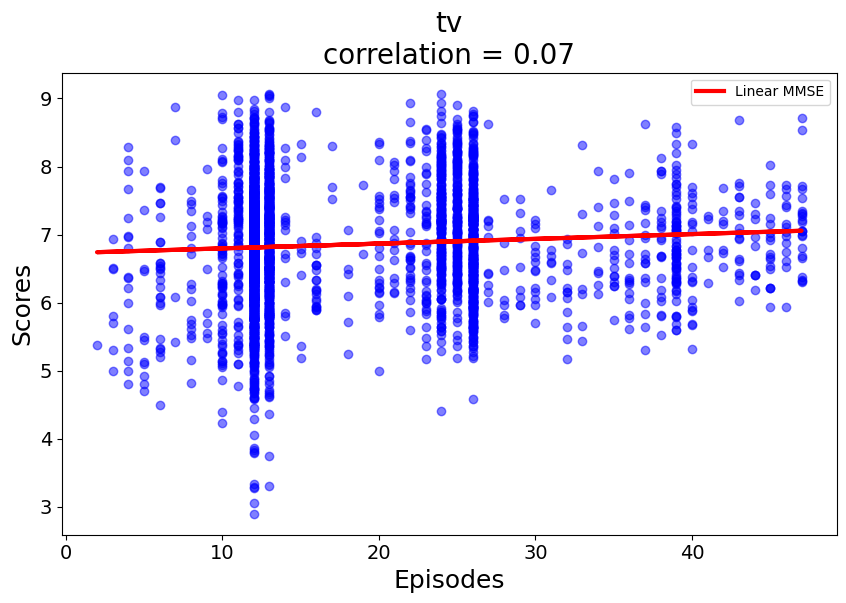

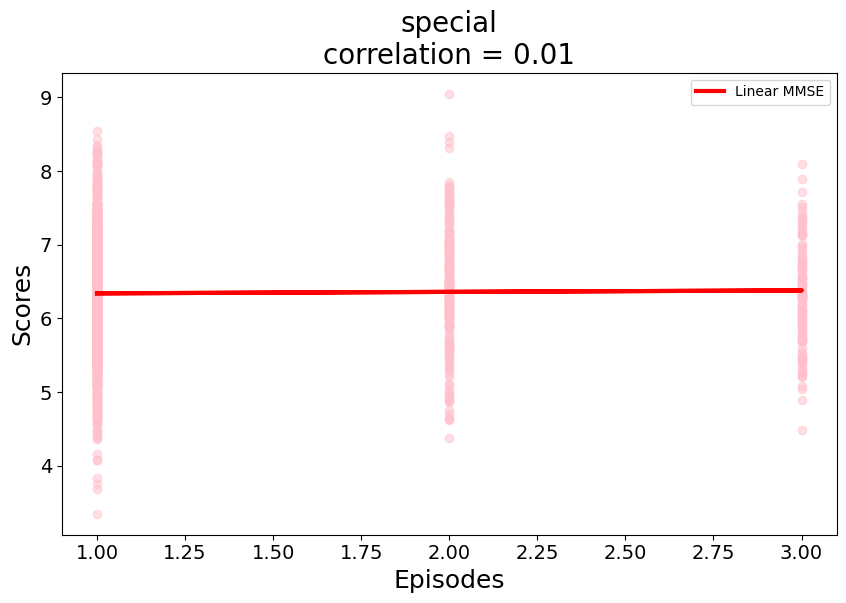

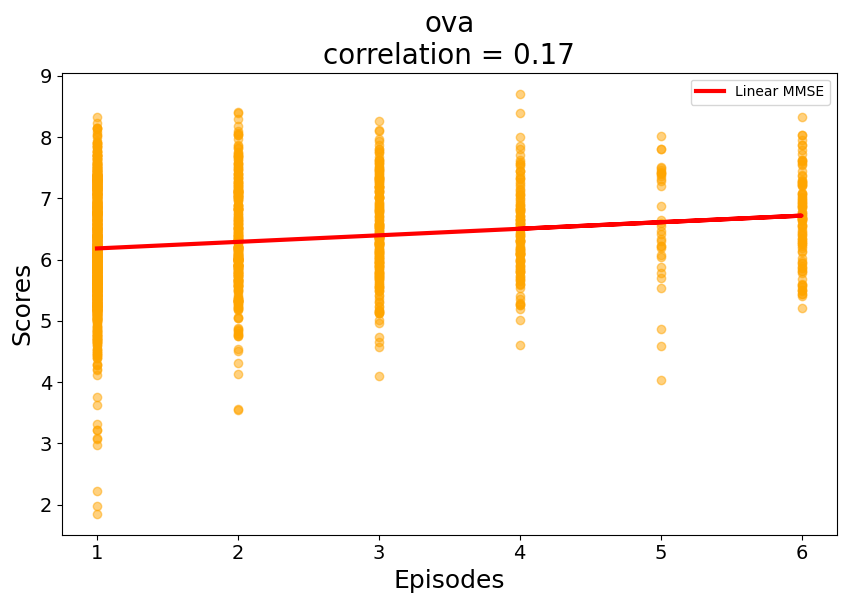

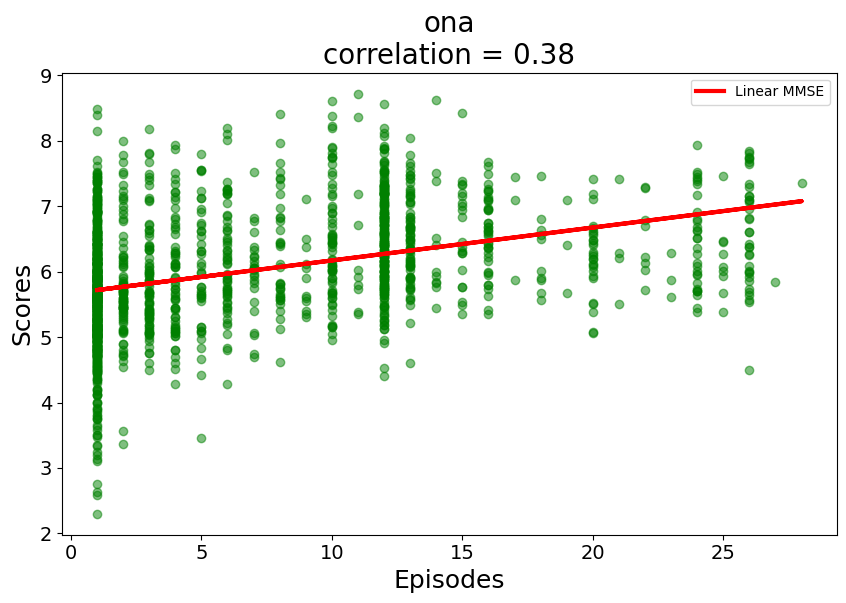

In [832]:
color_lst = ['indigo', 'blue', 'pink', 'orange', 'green']
for color, type in zip(color_lst, anime_types):
    if type != '-':
        anime_ratings_eps_type = anime_ratings_eps[anime_ratings_eps['type'] == type]
#         print(f'Episode Stats for {type}:\n', anime_ratings_eps_type['episodes'].describe())
        Q1 = np.percentile(anime_ratings_eps_type['episodes'], 25)
        Q3 = np.percentile(anime_ratings_eps_type['episodes'], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = (anime_ratings_eps_type['episodes'] < lower_bound) | (anime_ratings_eps_type['episodes'] > upper_bound)
        anime_ratings_eps_type_no_outliers = anime_ratings_eps_type[~outliers_iqr]
        
        correlation = anime_ratings_eps_type_no_outliers['episodes'].corr(anime_ratings_eps_type_no_outliers['score'])

        X_r = anime_ratings_eps_type_no_outliers['episodes'].values.reshape(-1, 1)
        y_r = anime_ratings_eps_type_no_outliers['score'].values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(X_r, y_r)
        y_pred = model.predict(X_r)

        plt.figure(figsize=(10,6))
        plt.scatter(anime_ratings_eps_type_no_outliers['episodes'], anime_ratings_eps_type_no_outliers['score'], color=color, marker='o', alpha=0.5)
        plt.plot(anime_ratings_eps_type_no_outliers['episodes'], y_pred.flatten(), color='red', label='Linear MMSE', linewidth=3)
        plt.title(f'{type}\ncorrelation = {correlation:.2f}', fontsize=20)
        plt.xlabel('Episodes', fontsize=18)
        plt.ylabel('Scores', fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend()
        plt.show()


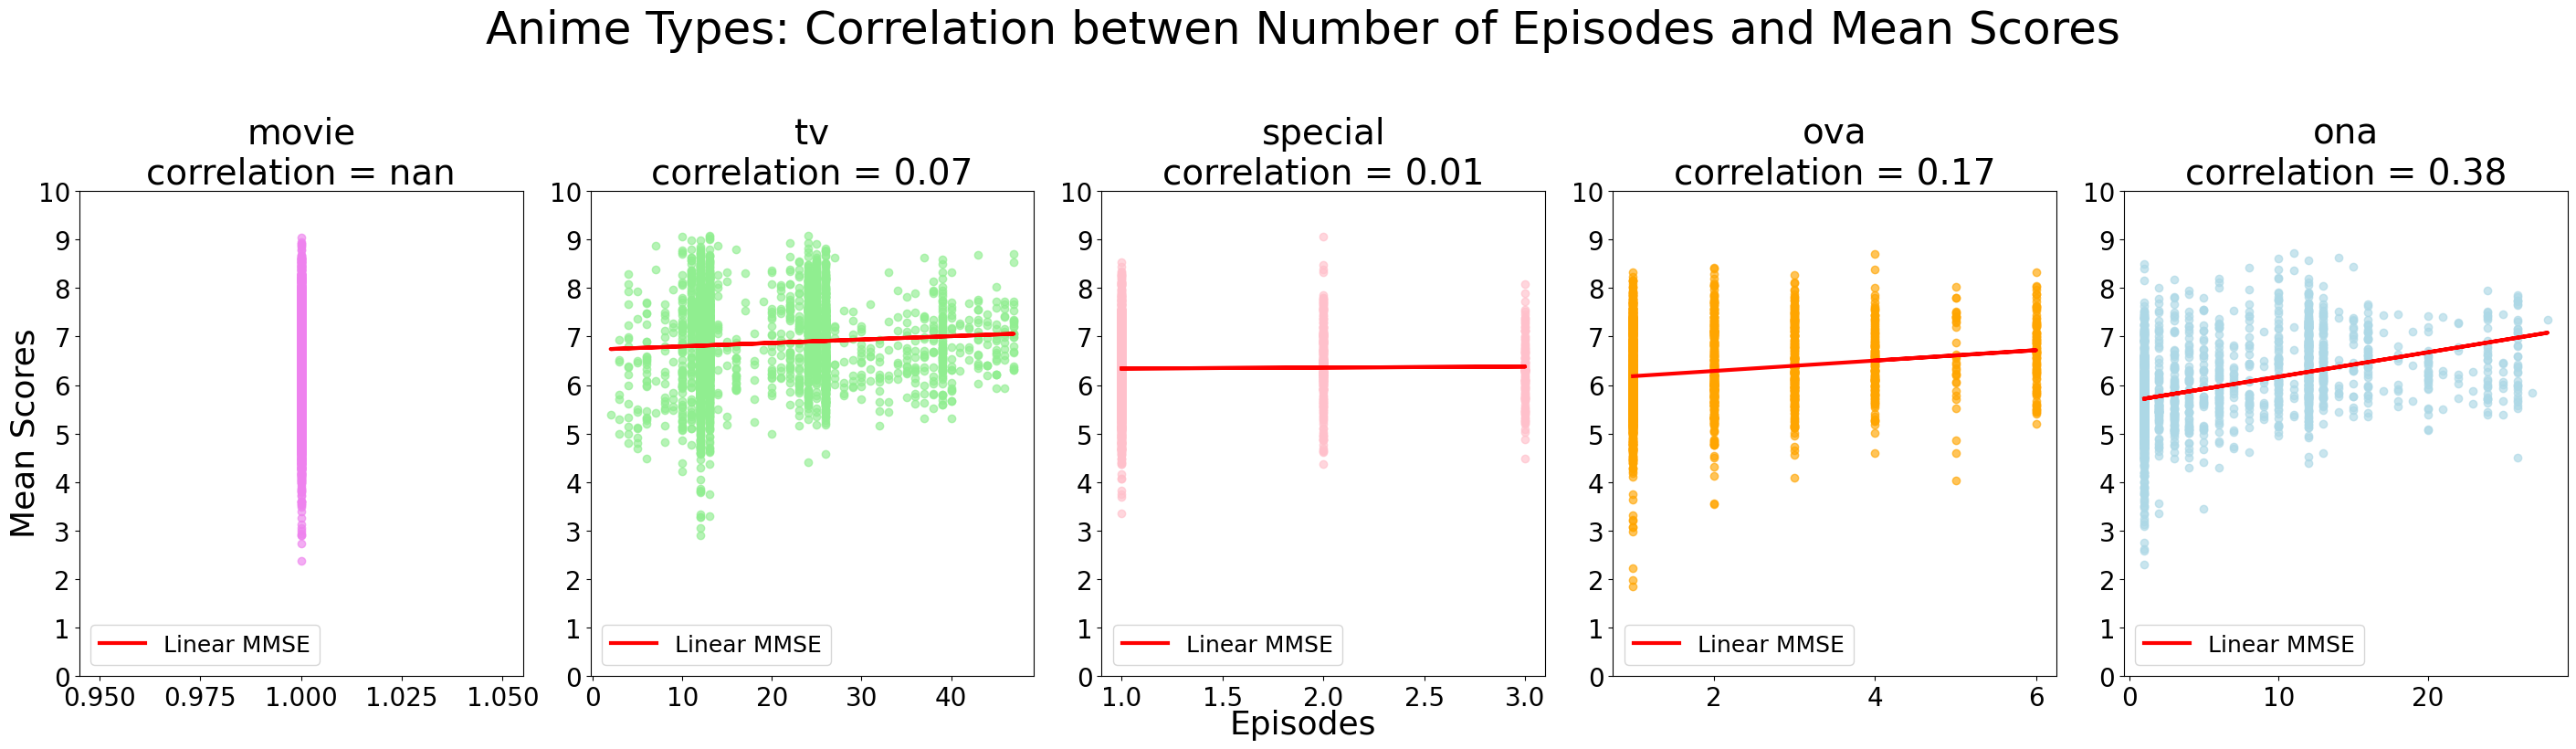

In [1098]:
color_lst = ['violet', 'lightgreen', 'pink', 'orange', 'lightblue']
fig, axs = plt.subplots(1, 5, figsize=(28, 8))  # Create a figure with 1 row and 5 columns

for i, (color, anime_type) in enumerate(zip(color_lst, anime_types)):
    if anime_type != '-':
        anime_ratings_eps_type = anime_ratings_eps[anime_ratings_eps['type'] == anime_type]
        Q1 = np.percentile(anime_ratings_eps_type['episodes'], 25)
        Q3 = np.percentile(anime_ratings_eps_type['episodes'], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = (anime_ratings_eps_type['episodes'] < lower_bound) | (anime_ratings_eps_type['episodes'] > upper_bound)
        anime_ratings_eps_type_no_outliers = anime_ratings_eps_type[~outliers_iqr]
        
        correlation = anime_ratings_eps_type_no_outliers['episodes'].corr(anime_ratings_eps_type_no_outliers['score'])

        X_r = anime_ratings_eps_type_no_outliers['episodes'].values.reshape(-1, 1)
        y_r = anime_ratings_eps_type_no_outliers['score'].values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(X_r, y_r)
        y_pred = model.predict(X_r)

        axs[i].scatter(anime_ratings_eps_type_no_outliers['episodes'], anime_ratings_eps_type_no_outliers['score'], color=color, marker='o', alpha=0.65)
        axs[i].plot(anime_ratings_eps_type_no_outliers['episodes'], y_pred.flatten(), color='red', label='Linear MMSE', linewidth=3)
        axs[i].set_title(f'{anime_type}\ncorrelation = {correlation:.2f}', fontsize=28)
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)
        axs[i].set_yticks(np.arange(0, 11, 1))
        axs[i].legend(loc='lower left', fontsize=18)
        
fig.suptitle('Anime Types: Correlation betwen Number of Episodes and Mean Scores\n', fontsize=36)
fig.text(0.0001, 0.4, 'Mean Scores', ha='center', va='center', fontsize=26, rotation='vertical')
fig.text(0.5, 0.0001, 'Episodes', ha='center', va='center', fontsize=26)
plt.tight_layout()
plt.show()

#### $\color{green}{\textbf{Is it possible to predict the average user score of an anime based on the average user scores of other animes in the same genre and/or type of animation: regression}}$

In [1108]:
anime_ratings_cleaned.columns
cols_to_drop = ['id', 'title', 'type', 'genres', 'synopsis', 'episodes',
       'status', 'producers', 'licensors', 'studios', 'source', 'duration',
       'rating', 'rank', 'popularity', 'favorites', 'scored_by', 'members',
       'image_url']
anime_genre_dataset = anime_ratings_cleaned.drop(cols_to_drop, axis=1)
# anime_genre_dataset['score'] = anime_genre_dataset['score'].round().astype(int) # round to nearest whole number
anime_genre_dataset

score  genre_award_winning  genre_slice_of_life  genre_fantasy  \
0       8.75                    1                    0              0   
1       8.38                    0                    0              0   
2       8.22                    0                    0              0   
3       7.25                    0                    0              0   
4       6.94                    0                    0              1   
...      ...                  ...                  ...            ...   
23463   7.78                    0                    0              1   
23483   5.84                    0                    0              1   
23493   5.99                    0                    0              0   
23623   6.07                    0                    0              0   
23696   6.29                    0                    0              1   

       genre_sci_fi  genre_romance  genre_horror  genre_boys_love  \
0                 1              0             0                0   
1                 1              0             0                0   
2                 1              0             0                0   
3                 0              0             0                0   
4                 0              0             0                0   
...             ...            ...           ...              ...   
23463             0              0             0                0   
23483             0              0             0                0   
23493             0              0             0                0   
23623             0              0             0                0   
23696             0              0             0                0   

       genre_girls_love  genre_sports  genre_comedy  genre_gourmet  \
0                     0             0             0              0   
1                     0             0             0              0   
2                     0             0             0              0   
3                     0             0             0              0   
4                     0             0             0              0   
...                 ...           ...           ...            ...   
23463                 0             0             0              0   
23483                 0             0             1              0   
23493                 0             0             1              0   
23623                 0             0             0              0   
23696                 0             0             1              0   

       genre_suspense  genre_supernatural  genre_avant_garde  genre_drama  \
0                   0                   0                  0            0   
1                   0                   0                  0            0   
2                   0                   0                  0            0   
3                   0                   1                  0            1   
4                   0                   1                  0            0   
...               ...                 ...                ...          ...   
23463               0                   0                  0            0   
23483               0                   0                  0            0   
23493               0                   0                  0            0   
23623               0                   0                  0            0   
23696               0                   0                  0            0   

       genre_mystery  genre_adventure  genre_ecchi  genre_action  
0                  0                0            0             1  
1                  0                0            0             1  
2                  0                1            0             1  
3                  1                0            0             1  
4                  0                1            0             0  
...              ...              ...          ...           ...  
23463              0                0            0             0  

In [1109]:
# overall, regardless of genre or genre & type

X = anime_genre_dataset.drop(['score'], axis=1)
y = anime_genre_dataset['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
results = model.fit()

y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

print(results.summary())

Mean Squared Error: 0.7073155211620532
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:40:18   Log-Likelihood:                -12584.
No. Observations:               10114   AIC:                         2.521e+04
Df Residuals:                   10094   BIC:                         2.535e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [1085]:
with open('ols_summary.txt', 'w') as f:
    f.write(results.summary().as_text())

from PIL import Image, ImageDraw, ImageFont

with open('ols_summary.txt', 'r') as f:
    text = f.read()

img = Image.new('RGB', (800, 600), color = (255, 255, 255))
d = ImageDraw.Draw(img)

font = ImageFont.load_default()

d.text((10,10), text, fill=(0,0,0), font=font)

img.save('ols_summary_image.png')

Now we'll at predicting within genres

In [1103]:
genre_lst = list(X.columns)

for genre in genre_lst:
    genre_X = anime_genre_dataset[anime_genre_dataset[genre] == 1].drop(['score'], axis=1)
    genre_y = anime_genre_dataset[anime_genre_dataset[genre] == 1]['score']
    
    X_train, X_test, y_train, y_test = train_test_split(genre_X, genre_y, test_size=0.2, random_state=44)

    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train)
    results = model.fit()

    y_pred = results.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(genre)
    print('Length of train data: ', len(X_train))
    print('Length of test data: ', len(X_test))
    print('Mean Squared Error:', mse)
    print('R^2 Score:', r2)
    print()

genre_award_winning
Length of train data:  170
Length of test data:  43
Mean Squared Error: 0.9268000542902687
R^2 Score: -0.024512015032588375

genre_slice_of_life
Length of train data:  912
Length of test data:  228
Mean Squared Error: 0.724102278718819
R^2 Score: 0.09000349348791403

genre_fantasy
Length of train data:  2482
Length of test data:  621
Mean Squared Error: 0.5807626042261316
R^2 Score: 0.11894728103964047

genre_sci_fi
Length of train data:  1888
Length of test data:  473
Mean Squared Error: 0.6132955157361287
R^2 Score: 0.13067189205548813

genre_romance
Length of train data:  1374
Length of test data:  344
Mean Squared Error: 0.5876295937155595
R^2 Score: 0.07536942847678763

genre_horror
Length of train data:  328
Length of test data:  82
Mean Squared Error: 0.5538464153191018
R^2 Score: 0.4614993787963517

genre_boys_love
Length of train data:  83
Length of test data:  21
Mean Squared Error: 0.7734383486222514
R^2 Score: -0.28829755747115215

genre_girls_love
Lengt

+---------------------+----------------+---------------+-------------+----------+
| Genre               |   Train Length |   Test Length |    R2 Score |      MSE |
+=====================+================+===============+=============+==========+
| genre_award_winning |            170 |            43 | -0.024512   | 0.9268   |
+---------------------+----------------+---------------+-------------+----------+
| genre_slice_of_life |            912 |           228 |  0.0900035  | 0.724102 |
+---------------------+----------------+---------------+-------------+----------+
| genre_fantasy       |           2482 |           621 |  0.118947   | 0.580763 |
+---------------------+----------------+---------------+-------------+----------+
| genre_sci_fi        |           1888 |           473 |  0.130672   | 0.613296 |
+---------------------+----------------+---------------+-------------+----------+
| genre_romance       |           1374 |           344 |  0.0753694  | 0.58763  |
+---------------

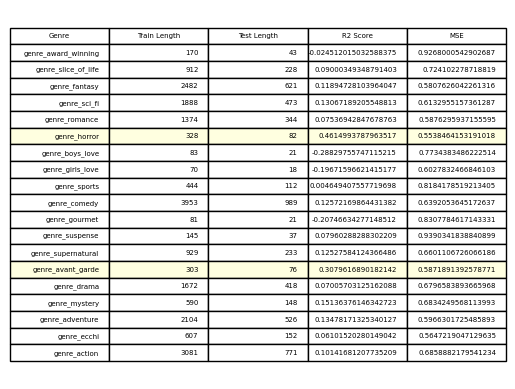

In [1118]:
from tabulate import tabulate

table_data = []

for genre in genre_lst:
    genre_X = anime_genre_dataset[anime_genre_dataset[genre] == 1].drop(['score'], axis=1)
    genre_y = anime_genre_dataset[anime_genre_dataset[genre] == 1]['score']
    
    X_train, X_test, y_train, y_test = train_test_split(genre_X, genre_y, test_size=0.2, random_state=44)

    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train)
    results = model.fit()

    y_pred = results.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    table_data.append([genre, len(X_train), len(X_test), r2, mse])

headers = ["Genre", "Train Length", "Test Length", "R2 Score", "MSE"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
# ax.table(cellText=table_data, colLabels=headers, loc='center')

def highlight_rows(data):
    highlighted_data = []
    colors = []
    for row in data:
        if row[3] > 0.3:  # Check if R2 score is greater than 0.3
            highlighted_data.append(row)
            colors.append(['lightyellow'] * len(row))
        else:
            highlighted_data.append(row)
            colors.append(['w'] * len(row))
    return highlighted_data, colors

highlighted_table_data, cell_colors = highlight_rows(table_data)

# Plot the table with highlighted rows
table = ax.table(cellText=highlighted_table_data, colLabels=headers, loc='center', cellColours=cell_colors)

# Set cell font size
table.auto_set_font_size(False)
table.set_fontsize(5)

plt.savefig('table_genre.png', dpi=300, bbox_inches='tight') 


now let's look at predicting with genre AND type

In [1105]:
cols_to_drop = ['id', 'title', 'genres', 'synopsis', 'episodes',
       'status', 'producers', 'licensors', 'studios', 'source', 'duration',
       'rating', 'rank', 'popularity', 'favorites', 'scored_by', 'members',
       'image_url']
anime_genre_type_dataset = anime_ratings_cleaned.drop(cols_to_drop, axis=1)
one_hot_encoded = pd.get_dummies(anime_genre_type_dataset['type'])
anime_genre_type_dataset_hot = pd.concat([anime_genre_type_dataset, one_hot_encoded], axis=1)
anime_genre_type_dataset_hot.drop(['type', '-'], axis=1, inplace=True)
anime_genre_type_dataset_hot

score  genre_award_winning  genre_slice_of_life  genre_fantasy  \
0       8.75                    1                    0              0   
1       8.38                    0                    0              0   
2       8.22                    0                    0              0   
3       7.25                    0                    0              0   
4       6.94                    0                    0              1   
...      ...                  ...                  ...            ...   
23463   7.78                    0                    0              1   
23483   5.84                    0                    0              1   
23493   5.99                    0                    0              0   
23623   6.07                    0                    0              0   
23696   6.29                    0                    0              1   

       genre_sci_fi  genre_romance  genre_horror  genre_boys_love  \
0                 1              0             0                0   
1                 1              0             0                0   
2                 1              0             0                0   
3                 0              0             0                0   
4                 0              0             0                0   
...             ...            ...           ...              ...   
23463             0              0             0                0   
23483             0              0             0                0   
23493             0              0             0                0   
23623             0              0             0                0   
23696             0              0             0                0   

       genre_girls_love  genre_sports  ...  genre_drama  genre_mystery  \
0                     0             0  ...            0              0   
1                     0             0  ...            0              0   
2                     0             0  ...            0              0   
3                     0             0  ...            1              1   
4                     0             0  ...            0              0   
...                 ...           ...  ...          ...            ...   
23463                 0             0  ...            0              0   
23483                 0             0  ...            0              0   
23493                 0             0  ...            0              1   
23623                 0             0  ...            0              0   
23696                 0             0  ...            0              0   

       genre_adventure  genre_ecchi  genre_action  movie  ona  ova  special  \
0                    0            0             1      0    0    0        0   
1                    0            0             1      1    0    0        0   
2                    1            0             1      0    0    0        0   
3                    0            0             1      0    0    0        0   
4                    1            0             0      0    0    0        0   
...                ...          ...           ...    ...  ...  ...      ...   
23463                0            0             0      0    0    1        0   
23483                0            0             1      0    0    0        1   
23493                0            0             1      0    1    0        0   
23623                0            0             0      0    0    0        1   
23696                1            0             1      0    0    0        1   

       tv  
0       1  
1       0  
2       1  
3       1  
4       1  
...    ..  
23463   0  
23483   0  
23493   0  
23623   0  
23696   0  

[12643 rows x 25 columns]

In [1107]:
type_lst = list(anime_genre_type_dataset['type'].unique())
type_lst.remove('-')

for genre in genre_lst:
    for anime_type in type_lst:
        filtered_data = anime_genre_type_dataset_hot[(anime_genre_type_dataset_hot[genre] == 1) & (anime_genre_type_dataset_hot[anime_type] == 1)]
        if len(filtered_data) >= 10:
            genre_type_X = filtered_data.drop(['score'], axis=1)
            genre_type_y = filtered_data['score']

            X_train, X_test, y_train, y_test = train_test_split(genre_type_X, genre_type_y, test_size=0.2, random_state=44)

            X_train = sm.add_constant(X_train)
            X_test = sm.add_constant(X_test)

            model = sm.OLS(y_train, X_train)
            results = model.fit()

            y_pred = results.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
#             if r2 >= 0.5:
            print(anime_type, '-', genre)
            print('Length of train data: ', len(X_train))
            print('Length of test data: ', len(X_test))
            print('Mean Squared Error:', mse)
            print('R^2 Score:', r2)
            print()

tv - genre_award_winning
Length of train data:  43
Length of test data:  11
Mean Squared Error: 0.4980415677439179
R^2 Score: -0.47780291958110865

movie - genre_award_winning
Length of train data:  115
Length of test data:  29
Mean Squared Error: 1.1945717071458397
R^2 Score: -0.22077526350947907

ova - genre_award_winning
Length of train data:  8
Length of test data:  3
Mean Squared Error: 0.43521985596708435
R^2 Score: -22.539535478988896

tv - genre_slice_of_life
Length of train data:  375
Length of test data:  94
Mean Squared Error: 0.5417189535587391
R^2 Score: 0.06879184185823528

movie - genre_slice_of_life
Length of train data:  109
Length of test data:  28
Mean Squared Error: 1.192987109237804
R^2 Score: -0.27725951932974424

ova - genre_slice_of_life
Length of train data:  86
Length of test data:  22
Mean Squared Error: 0.7516717277378884
R^2 Score: -0.23896644666358524

special - genre_slice_of_life
Length of train data:  164
Length of test data:  42
Mean Squared Error: 0.6

ona - genre_supernatural
Length of train data:  130
Length of test data:  33
Mean Squared Error: 0.719356807725284
R^2 Score: 0.2612176254526182

tv - genre_avant_garde
Length of train data:  14
Length of test data:  4
Mean Squared Error: 0.04590167396562966
R^2 Score: 0.9547376566344093

movie - genre_avant_garde
Length of train data:  208
Length of test data:  52
Mean Squared Error: 1.1450001928998303
R^2 Score: -0.24632714270555334

ova - genre_avant_garde
Length of train data:  14
Length of test data:  4
Mean Squared Error: 5.3214453869047516
R^2 Score: -2.72254325933448

special - genre_avant_garde
Length of train data:  24
Length of test data:  6
Mean Squared Error: 0.5006325520833376
R^2 Score: -1.5406729739064473

ona - genre_avant_garde
Length of train data:  42
Length of test data:  11
Mean Squared Error: 0.7910769668067258
R^2 Score: -1.9188183576246352

tv - genre_drama
Length of train data:  671
Length of test data:  168
Mean Squared Error: 0.46175563640244527
R^2 Score: 0

Table 1:
+---------+---------------------+----------------+---------------+--------------+----------+
| Type    | Genre               |   Train Length |   Test Length |     R2 Score |      MSE |
+=========+=====================+================+===============+==============+==========+
| tv      | genre_award_winning |             43 |            11 |  -0.477803   | 0.498042 |
+---------+---------------------+----------------+---------------+--------------+----------+
| movie   | genre_award_winning |            115 |            29 |  -0.220775   | 1.19457  |
+---------+---------------------+----------------+---------------+--------------+----------+
| ova     | genre_award_winning |              8 |             3 | -22.5395     | 0.43522  |
+---------+---------------------+----------------+---------------+--------------+----------+
| tv      | genre_slice_of_life |            375 |            94 |   0.0687918  | 0.541719 |
+---------+---------------------+----------------+-----------

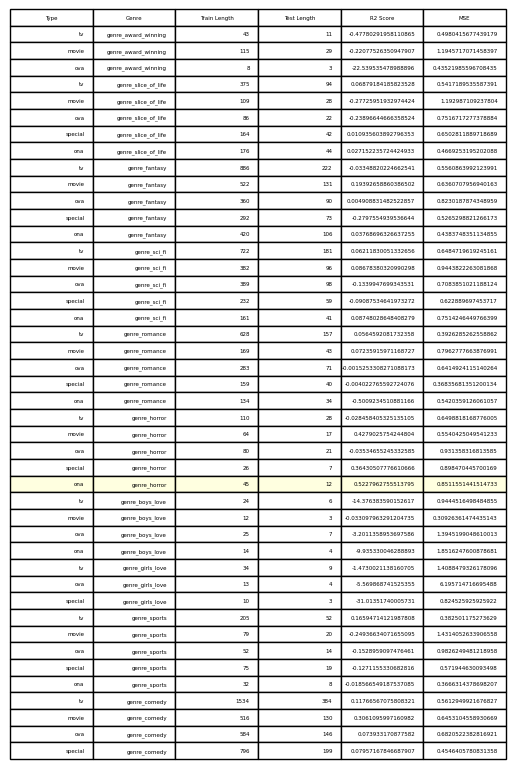

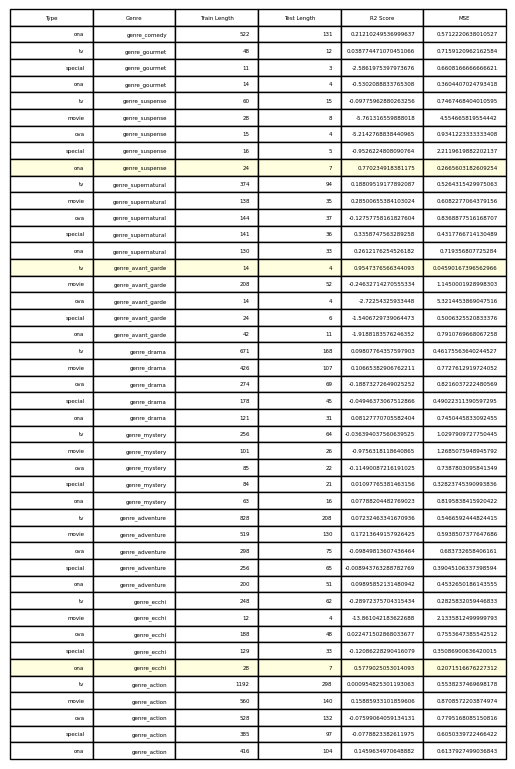

In [1126]:
table_data = []

for genre in genre_lst:
    for anime_type in type_lst:
        filtered_data = anime_genre_type_dataset_hot[(anime_genre_type_dataset_hot[genre] == 1) & (anime_genre_type_dataset_hot[anime_type] == 1)]
        if len(filtered_data) >= 10:
            genre_type_X = filtered_data.drop(['score'], axis=1)
            genre_type_y = filtered_data['score']

            X_train, X_test, y_train, y_test = train_test_split(genre_type_X, genre_type_y, test_size=0.2, random_state=44)

            X_train = sm.add_constant(X_train)
            X_test = sm.add_constant(X_test)

            model = sm.OLS(y_train, X_train)
            results = model.fit()

            y_pred = results.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            table_data.append([anime_type, genre, len(X_train), len(X_test), r2, mse])

# Splitting the table_data list into two equal parts
half_length = len(table_data) // 2
table_data_half1 = table_data[:half_length]
table_data_half2 = table_data[half_length:]

# Plotting tables
print("Table 1:")
print(tabulate(table_data_half1, headers=headers, tablefmt="grid"))

print("\nTable 2:")
print(tabulate(table_data_half2, headers=headers, tablefmt="grid"))

fig1, ax1 = plt.subplots()
ax1.axis('tight')
ax1.axis('off')

def highlight_rows(data):
    highlighted_data = []
    colors = []
    for row in data:
        if row[4] >= 0.5:  # Check if R2 score is greater than or equal to 0.5
            highlighted_data.append(row)
            colors.append(['lightyellow'] * len(row))
        else:
            highlighted_data.append(row)
            colors.append(['w'] * len(row))
    return highlighted_data, colors

highlighted_table_data1, cell_colors1 = highlight_rows(table_data_half1)
highlighted_table_data2, cell_colors2 = highlight_rows(table_data_half2)

# Ensure headers match the number of columns in the table data
headers = ["Type", "Genre", "Train Length", "Test Length", "R2 Score", "MSE"]

# Plot the first table with highlighted rows
table1 = ax1.table(cellText=highlighted_table_data1, colLabels=headers, loc='center', cellColours=cell_colors1)
table1.auto_set_font_size(False)
table1.set_fontsize(4)

plt.savefig('table_1.png', dpi=300, bbox_inches='tight') 

fig2, ax2 = plt.subplots()
ax2.axis('tight')
ax2.axis('off')

# Plot the second table with highlighted rows
table2 = ax2.table(cellText=highlighted_table_data2, colLabels=headers, loc='center', cellColours=cell_colors2)
table2.auto_set_font_size(False)
table2.set_fontsize(4)

plt.savefig('table_2.png', dpi=300, bbox_inches='tight') 



# Milestone 3

In [430]:
from dython.nominal import associations # must pip install dython to run
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances_argmin
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

1) Multiple regression (categorical and numerical features) for average score as dependent variable - one hot encode, drop one col

2) PCA & K-Means

## Multiple Regression (Predict Score from all features)

In [489]:
import statsmodels.api as sm

In [490]:
numerical_features = anime_ratings_cleaned.select_dtypes(include=['number']).columns
categorical_features = anime_ratings_cleaned.select_dtypes(exclude=['number']).columns

print('Numerical Features:')
print()
print(numerical_features)
print()
print()
print('Categorical Features:')
print()
print(categorical_features)

Numerical Features:

Index(['id', 'score', 'episodes', 'rank', 'popularity', 'favorites',
       'scored_by', 'members', 'genre_award_winning', 'genre_slice_of_life',
       'genre_fantasy', 'genre_sci_fi', 'genre_romance', 'genre_horror',
       'genre_boys_love', 'genre_girls_love', 'genre_sports', 'genre_comedy',
       'genre_gourmet', 'genre_suspense', 'genre_supernatural',
       'genre_avant_garde', 'genre_drama', 'genre_mystery', 'genre_adventure',
       'genre_ecchi', 'genre_action'],
      dtype='object')


Categorical Features:

Index(['title', 'genres', 'synopsis', 'type', 'status', 'producers',
       'licensors', 'studios', 'source', 'duration', 'rating', 'image_url'],
      dtype='object')


Let's see what happens when we take into account type, episodes, status, producers, licensors, studios, source, rating, (maybe favorties and members??) for predicting score (not genre, we already tried that lol)

In [515]:
# One Hot Encode Categorical Variables
columns_to_keep = ['score', 'type', 'episodes', 'status', 'producers', 'licensors', 'studios', 'source', 'rating', 'favorites', 'scored_by', 'members']

regression_anime_ratings = anime_ratings_cleaned[columns_to_keep]

regression_anime_ratings

score     type  episodes           status  \
0       8.75       tv        26  finished airing   
1       8.38    movie         1  finished airing   
2       8.22       tv        26  finished airing   
3       7.25       tv        26  finished airing   
4       6.94       tv        52  finished airing   
...      ...      ...       ...              ...   
23463   7.78      ova        18  finished airing   
23483   5.84  special         1  finished airing   
23493   5.99      ona         1  finished airing   
23623   6.07  special         1  finished airing   
23696   6.29  special         1  finished airing   

                                               producers  \
0                                          bandai visual   
1                                 sunrise, bandai visual   
2                                   victor entertainment   
3      dentsu, bandai visual, tv tokyo music, victor ...   
4                                       dentsu, tv tokyo   
...                                                  ...   
23463                                                  -   
23483                                                  -   
23493                                                  -   
23623                                                  -   
23696                                                  -   

                                  licensors             studios     source  \
0          funimation, bandai entertainment             sunrise   original   
1               sony pictures entertainment               bones   original   
2      funimation, geneon entertainment usa            madhouse      manga   
3          funimation, bandai entertainment             sunrise   original   
4                  illumitoon entertainment      toei animation      manga   
...                                     ...                 ...        ...   
23463                                     -                   -       game   
23483                                     -        a-1 pictures      manga   
23493                                     -  gravity well, hmch       game   
23623                                     -     cygamespictures  web manga   
23696                                     -                   -      manga   

                               rating  favorites  scored_by  members  
0      R - 17+ (violence & profanity)      78525     914193  1771505  
1      R - 17+ (violence & profanity)       1448     206248   360978  
2           PG-13 - Teens 13 or older      15035     356739   727252  
3           PG-13 - Teens 13 or older        613      42829   111931  
4                       PG - Children         14       6413    15001  
...                               ...        ...        ...      ...  
23463       PG-13 - Teens 13 or older         68        662     2492  
23483       PG-13 - Teens 13 or older         10       1971     3828  
23493       PG-13 - Teens 13 or older          1        129      518  
23623       PG-13 - Teens 13 or older          1        114      482  
23696       PG-13 - Teens 13 or older          1        320      593  

[12643 rows x 12 columns]

In [516]:
cols_interest = ['type', 'source']
for col in cols_interest:
    print(col, ':')
    print(regression_anime_ratings[col].value_counts())
    print()

type :
tv         4456
movie      2466
special    2002
ova        1869
ona        1849
-             1
Name: type, dtype: int64

source :
manga           3655
original        3517
unknown         1478
game             849
light novel      848
novel            528
other            451
visual novel     376
web manga        290
4-koma manga     277
book              91
mixed media       83
card game         63
picture book      52
web novel         38
music             37
radio             10
Name: source, dtype: int64



In [517]:
regression_anime_ratings_aug = regression_anime_ratings.copy()

regression_anime_ratings_aug['type'] = regression_anime_ratings_aug['type'].replace('-', 'Other/Unknown')
regression_anime_ratings_aug['source'] = regression_anime_ratings_aug['source'].replace(['other', 'unknown'], 'Other/Unknown')

cols_interest = ['type', 'source']
for col in cols_interest:
    print(col, ':')
    print(regression_anime_ratings_aug[col].value_counts())
    print()

type :
tv               4456
movie            2466
special          2002
ova              1869
ona              1849
Other/Unknown       1
Name: type, dtype: int64

source :
manga            3655
original         3517
Other/Unknown    1929
game              849
light novel       848
novel             528
visual novel      376
web manga         290
4-koma manga      277
book               91
mixed media        83
card game          63
picture book       52
web novel          38
music              37
radio              10
Name: source, dtype: int64



In [518]:
uni_cols = ['status', 'producers', 'licensors', 'studios', 'rating']

for col in uni_cols:
    print(col, ':')
    print(regression_anime_ratings_aug[col].value_counts())
    print()

status :
finished airing     12584
currently airing       59
Name: status, dtype: int64

producers :
-                                                                                    4951
bandai visual                                                                         112
aniplex                                                                               111
sanrio                                                                                100
tv tokyo                                                                               87
                                                                                     ... 
nhk, comma studio                                                                       1
tbs, tele-cartoon japan                                                                 1
kadokawa pictures japan, ntt docomo, dwango, tv tokyo, klockworx, kadokawa shoten       1
imagine, takara                                                                         1

For now, we'll filter down to values that have more than a 100 corresponding entries in the dataset (in real world, we'd want to do some grouping, taking into account overlapping licensors, smaller studios, maybe find an outside source that defines the top 10 for each category and base the filtering on that)

In [519]:
for col in uni_cols:
    print(col, ':')
    counts = regression_anime_ratings_aug[col].value_counts()
    counts_above_100 = counts[counts >= 100]
    print(counts_above_100)
    print()

status :
finished airing    12584
Name: status, dtype: int64

producers :
-                4951
bandai visual     112
aniplex           111
sanrio            100
Name: producers, dtype: int64

licensors :
-                     8388
funimation             956
sentai filmworks       803
discotek media         274
aniplex of america     219
viz media              155
adv films              145
media blasters         134
Name: licensors, dtype: int64

studios :
-                       2232
toei animation           685
sunrise                  488
j.c.staff                353
madhouse                 313
tms entertainment        266
studio deen              264
production i.g           243
pierrot                  242
olm                      219
a-1 pictures             209
shin-ei animation        167
nippon animation         162
tatsunoko production     136
bones                    133
aic                      126
xebec                    117
gonzo                    117
shaft           

In [520]:
regression_anime_ratings_aug

score     type  episodes           status  \
0       8.75       tv        26  finished airing   
1       8.38    movie         1  finished airing   
2       8.22       tv        26  finished airing   
3       7.25       tv        26  finished airing   
4       6.94       tv        52  finished airing   
...      ...      ...       ...              ...   
23463   7.78      ova        18  finished airing   
23483   5.84  special         1  finished airing   
23493   5.99      ona         1  finished airing   
23623   6.07  special         1  finished airing   
23696   6.29  special         1  finished airing   

                                               producers  \
0                                          bandai visual   
1                                 sunrise, bandai visual   
2                                   victor entertainment   
3      dentsu, bandai visual, tv tokyo music, victor ...   
4                                       dentsu, tv tokyo   
...                                                  ...   
23463                                                  -   
23483                                                  -   
23493                                                  -   
23623                                                  -   
23696                                                  -   

                                  licensors             studios     source  \
0          funimation, bandai entertainment             sunrise   original   
1               sony pictures entertainment               bones   original   
2      funimation, geneon entertainment usa            madhouse      manga   
3          funimation, bandai entertainment             sunrise   original   
4                  illumitoon entertainment      toei animation      manga   
...                                     ...                 ...        ...   
23463                                     -                   -       game   
23483                                     -        a-1 pictures      manga   
23493                                     -  gravity well, hmch       game   
23623                                     -     cygamespictures  web manga   
23696                                     -                   -      manga   

                               rating  favorites  scored_by  members  
0      R - 17+ (violence & profanity)      78525     914193  1771505  
1      R - 17+ (violence & profanity)       1448     206248   360978  
2           PG-13 - Teens 13 or older      15035     356739   727252  
3           PG-13 - Teens 13 or older        613      42829   111931  
4                       PG - Children         14       6413    15001  
...                               ...        ...        ...      ...  
23463       PG-13 - Teens 13 or older         68        662     2492  
23483       PG-13 - Teens 13 or older         10       1971     3828  
23493       PG-13 - Teens 13 or older          1        129      518  
23623       PG-13 - Teens 13 or older          1        114      482  
23696       PG-13 - Teens 13 or older          1        320      593  

[12643 rows x 12 columns]

In [521]:
threshold = 100

columns_to_process = ['producers', 'licensors', 'studios', 'rating']

regression_anime_ratings_cleaned = regression_anime_ratings_aug.copy()

for column in columns_to_process:
    counts = regression_anime_ratings_cleaned[column].value_counts()
    other_categories = counts[counts < threshold].index
    regression_anime_ratings_cleaned.loc[regression_anime_ratings_cleaned[column].isin(other_categories), column] = 'Other'
    regression_anime_ratings_cleaned.loc[regression_anime_ratings_cleaned[column] == '-', column] = 'Unknown'
    regression_anime_ratings_cleaned[column] = regression_anime_ratings_cleaned[column].replace(['Other', 'Unknown'], 'Other/Unknown')

    
regression_anime_ratings_cleaned

score     type  episodes           status      producers  \
0       8.75       tv        26  finished airing  bandai visual   
1       8.38    movie         1  finished airing  Other/Unknown   
2       8.22       tv        26  finished airing  Other/Unknown   
3       7.25       tv        26  finished airing  Other/Unknown   
4       6.94       tv        52  finished airing  Other/Unknown   
...      ...      ...       ...              ...            ...   
23463   7.78      ova        18  finished airing  Other/Unknown   
23483   5.84  special         1  finished airing  Other/Unknown   
23493   5.99      ona         1  finished airing  Other/Unknown   
23623   6.07  special         1  finished airing  Other/Unknown   
23696   6.29  special         1  finished airing  Other/Unknown   

           licensors         studios     source  \
0      Other/Unknown         sunrise   original   
1      Other/Unknown           bones   original   
2      Other/Unknown        madhouse      manga   
3      Other/Unknown         sunrise   original   
4      Other/Unknown  toei animation      manga   
...              ...             ...        ...   
23463  Other/Unknown   Other/Unknown       game   
23483  Other/Unknown    a-1 pictures      manga   
23493  Other/Unknown   Other/Unknown       game   
23623  Other/Unknown   Other/Unknown  web manga   
23696  Other/Unknown   Other/Unknown      manga   

                               rating  favorites  scored_by  members  
0      R - 17+ (violence & profanity)      78525     914193  1771505  
1      R - 17+ (violence & profanity)       1448     206248   360978  
2           PG-13 - Teens 13 or older      15035     356739   727252  
3           PG-13 - Teens 13 or older        613      42829   111931  
4                       PG - Children         14       6413    15001  
...                               ...        ...        ...      ...  
23463       PG-13 - Teens 13 or older         68        662     2492  
23483       PG-13 - Teens 13 or older         10       1971     3828  
23493       PG-13 - Teens 13 or older          1        129      518  
23623       PG-13 - Teens 13 or older          1        114      482  
23696       PG-13 - Teens 13 or older          1        320      593  

[12643 rows x 12 columns]

In [522]:
cat_cols = ['type', 'source', 'status', 'producers', 'licensors', 'studios', 'rating']

for col in cat_cols:
    print(col, ':')
    print(regression_anime_ratings_cleaned[col].value_counts())
    print()

type :
tv               4456
movie            2466
special          2002
ova              1869
ona              1849
Other/Unknown       1
Name: type, dtype: int64

source :
manga            3655
original         3517
Other/Unknown    1929
game              849
light novel       848
novel             528
visual novel      376
web manga         290
4-koma manga      277
book               91
mixed media        83
card game          63
picture book       52
web novel          38
music              37
radio              10
Name: source, dtype: int64

status :
finished airing     12584
currently airing       59
Name: status, dtype: int64

producers :
Other/Unknown    12320
bandai visual      112
aniplex            111
sanrio             100
Name: producers, dtype: int64

licensors :
Other/Unknown         9957
funimation             956
sentai filmworks       803
discotek media         274
aniplex of america     219
viz media              155
adv films              145
media blasters       

for each categorical feature, we'll drop the other/unkown value to intitialize it as the reference category in the regression analysis.

In [528]:
ohe_anime_ratings = pd.get_dummies(regression_anime_ratings_cleaned, columns=cat_cols)
other_unknown_columns = [col for col in ohe_anime_ratings.columns if 'Other/Unknown' in col]
ohe_anime_ratings.drop(columns=other_unknown_columns, inplace=True)

# # Also dropping currently airing from status
ohe_anime_ratings.drop(columns=['status_currently airing'], inplace=True)

ohe_anime_ratings.columns

Index(['score', 'episodes', 'favorites', 'scored_by', 'members', 'type_movie',
       'type_ona', 'type_ova', 'type_special', 'type_tv',
       'source_4-koma manga', 'source_book', 'source_card game', 'source_game',
       'source_light novel', 'source_manga', 'source_mixed media',
       'source_music', 'source_novel', 'source_original',
       'source_picture book', 'source_radio', 'source_visual novel',
       'source_web manga', 'source_web novel', 'status_finished airing',
       'producers_aniplex', 'producers_bandai visual', 'producers_sanrio',
       'licensors_adv films', 'licensors_aniplex of america',
       'licensors_discotek media', 'licensors_funimation',
       'licensors_media blasters', 'licensors_sentai filmworks',
       'licensors_viz media', 'studios_a-1 pictures', 'studios_aic',
       'studios_bones', 'studios_gonzo', 'studios_j.c.staff',
       'studios_kyoto animation', 'studios_madhouse',
       'studios_nippon animation', 'studios_olm', 'studios_pierrot',
 

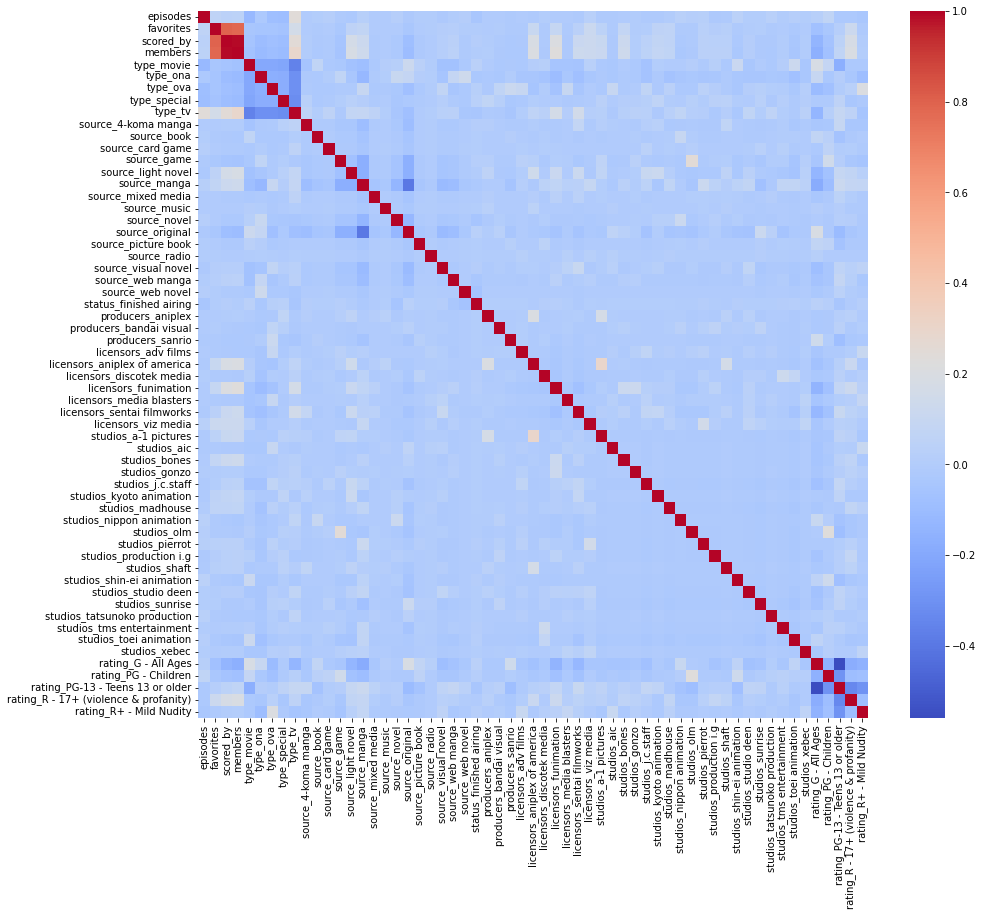

In [534]:
# correlation for independent features
independent_features = ohe_anime_ratings.copy()
independent_features = independent_features.drop(columns=['score'])
corr_matrix = independent_features.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [535]:
high_corr_threshold = 0.7

high_corr_pairs = (corr_matrix.abs() > high_corr_threshold) & (corr_matrix != 1)
high_corr_indices = high_corr_pairs.unstack().reset_index()
high_corr_indices.columns = ['Feature 1', 'Feature 2', 'Correlation']

high_corr_indices = high_corr_indices[high_corr_indices['Correlation']]

high_corr_indices

Feature 1  Feature 2  Correlation
61   favorites  scored_by         True
62   favorites    members         True
119  scored_by  favorites         True
121  scored_by    members         True
178    members  favorites         True
179    members  scored_by         True

Let's create relative user engagement metrics

In [536]:
ohe_anime_ratings['favorites_per_member'] = ohe_anime_ratings['favorites'] / ohe_anime_ratings['members']
ohe_anime_ratings['scored_by_per_member'] = ohe_anime_ratings['scored_by'] / ohe_anime_ratings['members']
ohe_anime_ratings['favorites_per_entry'] = ohe_anime_ratings['favorites'] / len(ohe_anime_ratings)
ohe_anime_ratings['scored_by_per_entry'] = ohe_anime_ratings['scored_by'] / len(ohe_anime_ratings)


ohe_anime_ratings

score  episodes  favorites  scored_by  members  type_movie  type_ona  \
0       8.75        26      78525     914193  1771505           0         0   
1       8.38         1       1448     206248   360978           1         0   
2       8.22        26      15035     356739   727252           0         0   
3       7.25        26        613      42829   111931           0         0   
4       6.94        52         14       6413    15001           0         0   
...      ...       ...        ...        ...      ...         ...       ...   
23463   7.78        18         68        662     2492           0         0   
23483   5.84         1         10       1971     3828           0         0   
23493   5.99         1          1        129      518           0         1   
23623   6.07         1          1        114      482           0         0   
23696   6.29         1          1        320      593           0         0   

       type_ova  type_special  type_tv  ...  studios_xebec  \
0             0             0        1  ...              0   
1             0             0        0  ...              0   
2             0             0        1  ...              0   
3             0             0        1  ...              0   
4             0             0        1  ...              0   
...         ...           ...      ...  ...            ...   
23463         1             0        0  ...              0   
23483         0             1        0  ...              0   
23493         0             0        0  ...              0   
23623         0             1        0  ...              0   
23696         0             1        0  ...              0   

       rating_G - All Ages  rating_PG - Children  \
0                        0                     0   
1                        0                     0   
2                        0                     0   
3                        0                     0   
4                        0                     1   
...                    ...                   ...   
23463                    0                     0   
23483                    0                     0   
23493                    0                     0   
23623                    0                     0   
23696                    0                     0   

       rating_PG-13 - Teens 13 or older  \
0                                     0   
1                                     0   
2                                     1   
3                                     1   
4                                     0   
...                                 ...   
23463                                 1   
23483                                 1   
23493                                 1   
23623                                 1   
23696                                 1   

       rating_R - 17+ (violence & profanity)  rating_R+ - Mild Nudity  \
0                                          1                        0   
1                                          1                        0   
2                                          0                        0   
3                                          0                        0   
4                                          0                        0   
...                                      ...                      ...   
23463                                      0                        0   
23483                                      0                        0   
23493                                      0                        0   
23623                                      0                        0   
23696                                      0                        0   

       favorites_per_member  scored_by_per_member  favorites_per_entry  \
0                  0.044327              0.516054             6.210947   
1                  0.004011              0.571359             0.114530   
2                  0.020674              0.490530             1.189196  

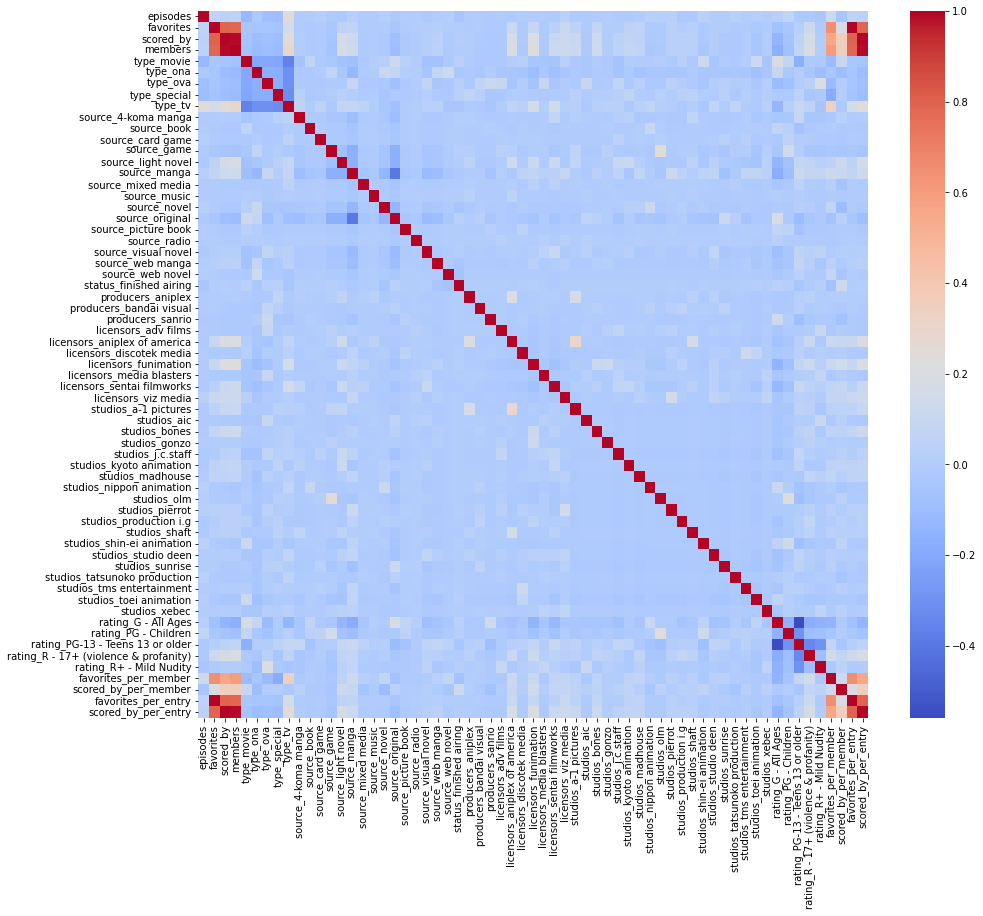

In [766]:
independent_features = ohe_anime_ratings.copy()
independent_features = independent_features.drop(columns=['score'])
corr_matrix = independent_features.corr()

plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [767]:
high_corr_threshold = 0.7

high_corr_pairs = (corr_matrix.abs() > high_corr_threshold) & (corr_matrix != 1)
high_corr_indices = high_corr_pairs.unstack().reset_index()
high_corr_indices.columns = ['Feature 1', 'Feature 2', 'Correlation']

high_corr_indices = high_corr_indices[high_corr_indices['Correlation']]

high_corr_indices

Feature 1            Feature 2  Correlation
65              favorites            scored_by         True
66              favorites              members         True
124             favorites  favorites_per_entry         True
125             favorites  scored_by_per_entry         True
127             scored_by            favorites         True
129             scored_by              members         True
187             scored_by  favorites_per_entry         True
188             scored_by  scored_by_per_entry         True
190               members            favorites         True
191               members            scored_by         True
250               members  favorites_per_entry         True
251               members  scored_by_per_entry         True
3844  favorites_per_entry            favorites         True
3845  favorites_per_entry            scored_by         True
3846  favorites_per_entry              members         True
3905  favorites_per_entry  scored_by_per_entry         True
3907  scored_by_per_entry            favorites         True
3908  scored_by_per_entry            scored_by         True
3909  scored_by_per_entry              members         True
3967  scored_by_per_entry  favorites_per_entry         True

Now let's perform multiple regression with these features

In [713]:
X = ohe_anime_ratings.drop(['score'], axis=1)
y = ohe_anime_ratings['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
results = model.fit()

y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

print(results.summary())

Mean Squared Error: 0.43085158037653226
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        01:36:10   Log-Likelihood:                -10091.
No. Observations:               10114   AIC:                         2.031e+04
Df Residuals:                   10052   BIC:                         2.075e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [552]:
with open('multiple_regression_summary.txt', 'w') as f:
    f.write(results.summary().as_text())

from PIL import Image, ImageDraw, ImageFont

with open('multiple_regression_summary.txt', 'r') as f:
    text = f.read()

img = Image.new('RGB', (800, 600), color = (255, 255, 255))
d = ImageDraw.Draw(img)

font = ImageFont.load_default()

d.text((10,10), text, fill=(0,0,0), font=font)

img.save('multiple_regression_summary_image.png')

In [685]:
coefficients = results.params
std_errors = results.bse
p_values = results.pvalues

variable_names = list(X_train.columns)

# hypothesis testing on regression coefficients
significance_level = 0.005
for i, (name, coef, std_err, p_val) in enumerate(zip(variable_names, coefficients, std_errors, p_values)):
    print(f"{name} - Coefficient: {coef:.4f}, Standard Error: {std_err:.4f}, P value: {p_val:.4f}")
    if p_val <= significance_level:
        print("Reject null hypothesis: coefficient is statistically significant.")
        print()
    else:
        print("Fail to reject null hypothesis: coefficient is not statistically significant.")
        print()

const - Coefficient: 5.8951, Standard Error: 0.6692, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

episodes - Coefficient: 0.0005, Standard Error: 0.0002, P value: 0.0263
Fail to reject null hypothesis: coefficient is not statistically significant.

favorites - Coefficient: -0.0000, Standard Error: 0.0000, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

scored_by - Coefficient: -0.0000, Standard Error: 0.0000, P value: 0.1460
Fail to reject null hypothesis: coefficient is not statistically significant.

members - Coefficient: 0.0000, Standard Error: 0.0000, P value: 0.0000
Reject null hypothesis: coefficient is statistically significant.

type_movie - Coefficient: -0.2593, Standard Error: 0.6588, P value: 0.6939
Fail to reject null hypothesis: coefficient is not statistically significant.

type_ona - Coefficient: -0.5442, Standard Error: 0.6588, P value: 0.4088
Fail to reject null hypothesis: coefficient is not sta

In [688]:
from tabulate import tabulate

non_const_indices = [i for i, name in enumerate(variable_names) if name != 'const']
variable_names = [name for name in variable_names if name != 'const']
coefficients = coefficients[non_const_indices]
std_errors = std_errors[non_const_indices]
p_values = p_values[non_const_indices]

# hypothesis testing on regression coefficients
significance_level = 0.005
table_data = []
for name, coef, std_err, p_val in zip(variable_names, coefficients, std_errors, p_values):
    significance = "Reject" if p_val <= significance_level else "Fail to reject"
    table_data.append([name, coef, std_err, p_val, significance])

# Create the table
table_headers = ["Feature Name", "Coefficient", "Standard Error", "P Value", "Statistical Significance"]
table = tabulate(table_data, headers=table_headers, floatfmt=".4f", tablefmt="fancy_grid")

# Print the table
print(table)

╒═══════════════════════════════════════╤═══════════════╤══════════════════╤═══════════╤════════════════════════════╕
│ Feature Name                          │   Coefficient │   Standard Error │   P Value │ Statistical Significance   │
╞═══════════════════════════════════════╪═══════════════╪══════════════════╪═══════════╪════════════════════════════╡
│ episodes                              │        0.0005 │           0.0002 │    0.0263 │ Fail to reject             │
├───────────────────────────────────────┼───────────────┼──────────────────┼───────────┼────────────────────────────┤
│ favorites                             │       -0.0000 │           0.0000 │    0.0000 │ Reject                     │
├───────────────────────────────────────┼───────────────┼──────────────────┼───────────┼────────────────────────────┤
│ scored_by                             │       -0.0000 │           0.0000 │    0.1460 │ Fail to reject             │
├───────────────────────────────────────┼───────────────

Table 1:
+------------------------------+---------------+------------------+-------------+----------------------------+
| Feature Name                 |   Coefficient |   Standard Error |     P Value | Statistical Significance   |
+==============================+===============+==================+=============+============================+
| episodes                     |   0.00045983  |      0.000206887 | 0.0262644   | Fail to reject             |
+------------------------------+---------------+------------------+-------------+----------------------------+
| favorites                    |  -3.97062e-05 |      2.09449e-06 | 8.99486e-79 | Reject                     |
+------------------------------+---------------+------------------+-------------+----------------------------+
| scored_by                    |  -5.94602e-07 |      4.08951e-07 | 0.145987    | Fail to reject             |
+------------------------------+---------------+------------------+-------------+----------------------

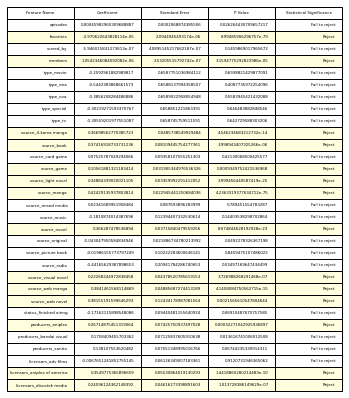

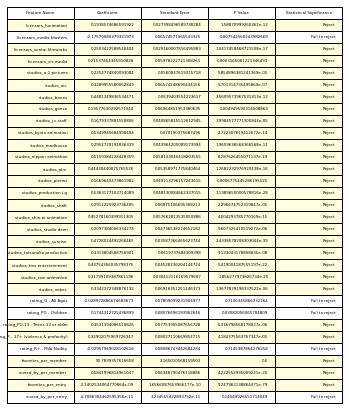

In [690]:
# Splitting the table_data list into two equal parts
half_length = len(table_data) // 2
table_data_half1 = table_data[:half_length]
table_data_half2 = table_data[half_length:]

headers = ["Feature Name", "Coefficient", "Standard Error", "P Value", "Statistical Significance"]

# Plotting tables
print("Table 1:")
print(tabulate(table_data_half1, headers=headers, tablefmt="grid"))

print("\nTable 2:")
print(tabulate(table_data_half2, headers=headers, tablefmt="grid"))

fig1, ax1 = plt.subplots()
ax1.axis('tight')
ax1.axis('off')

def highlight_rows(data):
    highlighted_data = []
    colors = []
    for row in data:
        if row[3] <= 0.005:
            highlighted_data.append(row)
            colors.append(['lightyellow'] * len(row))
        else:
            highlighted_data.append(row)
            colors.append(['w'] * len(row))
    return highlighted_data, colors

highlighted_table_data1, cell_colors1 = highlight_rows(table_data_half1)
highlighted_table_data2, cell_colors2 = highlight_rows(table_data_half2)

# Plot the first table with highlighted rows
table1 = ax1.table(cellText=highlighted_table_data1, colLabels=headers, loc='center', cellColours=cell_colors1)
table1.auto_set_font_size(False)
table1.set_fontsize(4)

plt.savefig('table_ols_1.png', dpi=300, bbox_inches='tight') 

fig2, ax2 = plt.subplots()
ax2.axis('tight')
ax2.axis('off')

# Plot the second table with highlighted rows
table2 = ax2.table(cellText=highlighted_table_data2, colLabels=headers, loc='center', cellColours=cell_colors2)
table2.auto_set_font_size(False)
table2.set_fontsize(4)

plt.savefig('table_ols_2.png', dpi=300, bbox_inches='tight') 

Now let's see what happens if we tune a random forest model or gradient boosted trees for the predictive task

In [722]:
X = ohe_anime_ratings.drop(['score'], axis=1)
y = ohe_anime_ratings['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

rf_model = RandomForestRegressor(random_state=47)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:', mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest R^2 Score:', r2_rf)

Random Forest Mean Squared Error: 0.24828964390294797
Random Forest R^2 Score: 0.7189577536417693


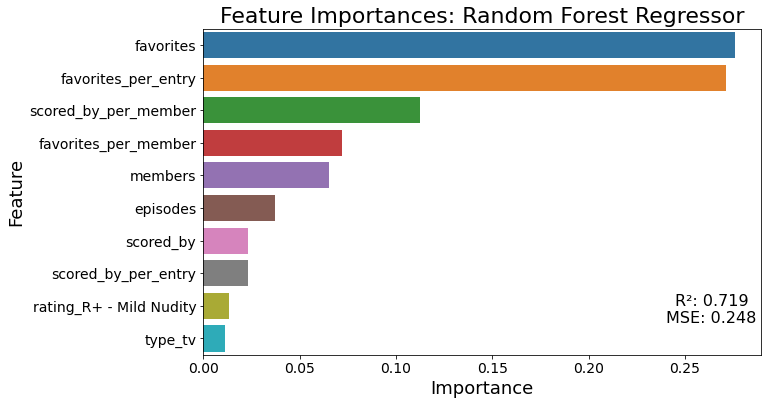

In [744]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Feature Importances: Random Forest Regressor', fontsize=22)
plt.text(0.245, 8, f'R\u00B2: {r2_rf:.3f}', fontsize=16)
plt.text(0.24, 8.5, f'MSE: {mse_rf:.3f}', fontsize=16)
plt.show()

In [693]:
X = ohe_anime_ratings.drop(['score'], axis=1)
y = ohe_anime_ratings['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

gb_model = GradientBoostingRegressor(random_state=47)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print('Gradient Boosted Mean Squared Error:', mse_gb)

r2_gb = r2_score(y_test, y_pred_gb)
print('Gradient Boosted R^2 Score:', r2_gb)

Gradient Boosted Mean Squared Error: 0.259109072622398
Gradient Boosted R^2 Score: 0.706711102900204


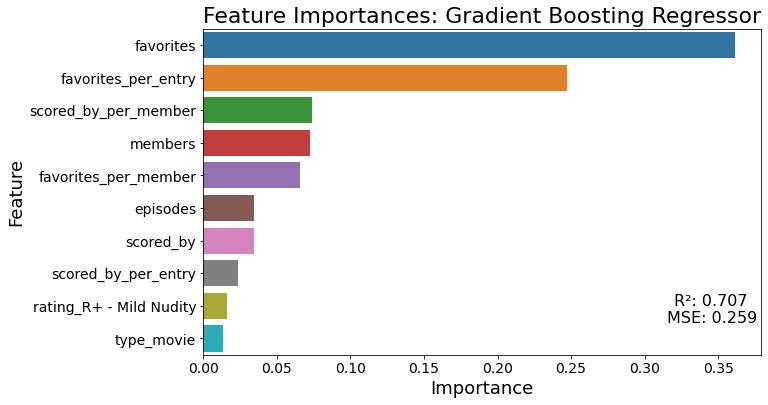

In [751]:
feature_importances = gb_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.32, 8, f'R\u00B2: {r2_gb:.3f}', fontsize=16)
plt.text(0.315, 8.5, f'MSE: {mse_gb:.3f}', fontsize=16)
plt.title('Feature Importances: Gradient Boosting Regressor', fontsize=22)
plt.show()

Seems like GB and RF produce similar results, let's try tuning RF

In [768]:
X = ohe_anime_ratings.drop(['score'], axis=1)
y = ohe_anime_ratings['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=47), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_best = best_rf_model.predict(X_test)

mse_rf_best = mean_squared_error(y_test, y_pred_best)
r2_rf_best = r2_score(y_test, y_pred_best)

print('Best Random Forest Mean Squared Error:', mse_rf_best)
print('Best Random Forest R Squared: ', r2_rf_best)
print('Best Hyperparameters:', best_params)

Best Random Forest Mean Squared Error: 0.24700564616166523
Best Random Forest R Squared:  0.7204111272253653
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}


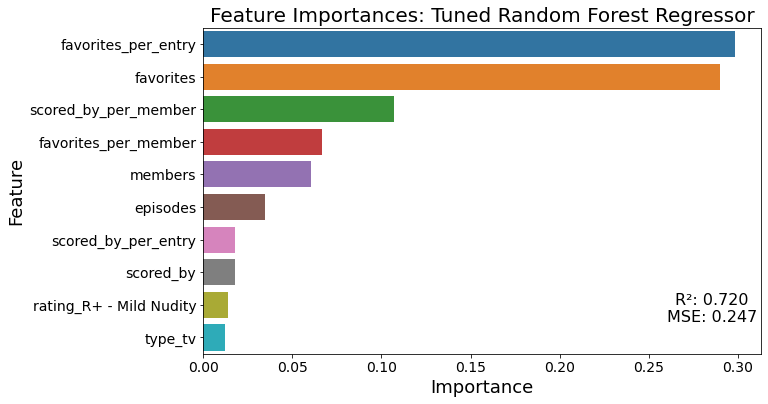

In [778]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.265, 8, f'R\u00B2: {r2_rf_best:.3f}', fontsize=16)
plt.text(0.26, 8.5, f'MSE: {mse_rf_best:.3f}', fontsize=16)
plt.title('Feature Importances: Tuned Random Forest Regressor', fontsize=20)
plt.show()

# PCA & K-Means

User watch behavior - days watched (not whole numbers), watching, completed, on hold, dropped(maybe), plan to watch, rewatched, episodes watched

total entries = watching + completed + on hold + dropped + plan to watch

can try color coding clusters by mean score range, gender, zodiac sign, membership length

Location seems like a user input, not regulated/cleaned so would require a lot of parsing to find real locations/group locations. Therefore, won't look at locations for analysis.

In [591]:
user_scores_cleaned

Mal ID     Username  Gender                   Birthday  \
0             1        Xinil    Male  1985-03-04T00:00:00+00:00   
1             3      Aokaado    Male                        NaN   
2             4      Crystal  Female                        NaN   
5            20       vondur    Male  1988-01-25T00:00:00+00:00   
7            36        Baman    Male                        NaN   
...         ...          ...     ...                        ...   
731273  1291029  serenakuran  Female                        NaN   
731277  1291049    FouxHashi    Male                        NaN   
731280  1291057     imjustjk    Male  1997-12-24T00:00:00+00:00   
731284  1291079       Dybido    Male                        NaN   
731289  1291097   JuunanaSai  Female                        NaN   

                         Location                     Joined  Days Watched  \
0                      California  2004-11-05T00:00:00+00:00         142.3   
1                    Oslo, Norway  2004-11-11T00:00:00+00:00          68.6   
2            Melbourne, Australia  2004-11-13T00:00:00+00:00         212.8   
5                  Bergen, Norway  2005-01-05T00:00:00+00:00          73.1   
7         Land of Rain and Fjords  2005-02-05T00:00:00+00:00         272.1   
...                           ...                        ...           ...   
731273                        NaN  2012-05-06T00:00:00+00:00         140.6   
731277          Davis, California  2012-05-06T00:00:00+00:00         168.7   
731280  Newport Coast, California  2012-05-06T00:00:00+00:00         101.9   
731284                        NaN  2012-05-06T00:00:00+00:00          41.0   
731289                        NaN  2012-05-06T00:00:00+00:00           3.7   

        Mean Score  Watching  Completed  On Hold  Dropped  Plan to Watch  \
0             7.37       1.0      233.0      8.0     93.0           64.0   
1             7.34      23.0      137.0     99.0     44.0           40.0   
2             6.68      16.0      636.0    303.0      0.0           45.0   
5             8.06      11.0       94.0     11.0      2.0           20.0   
7             5.90      27.0     1144.0     11.0     55.0          338.0   
...            ...       ...        ...      ...      ...            ...   
731273        7.63       5.0      374.0      8.0      9.0          101.0   
731277        7.55       3.0      409.0     13.0    126.0           55.0   
731280        7.00       3.0      181.0      5.0     19.0           34.0   
731284        8.48       2.0       88.0      7.0      5.0           33.0   
731289        9.67       1.0       11.0      0.0      0.0            2.0   

        Total Entries  Rewatched  Episodes Watched  
0               399.0       60.0            8458.0  
1               343.0       15.0            4072.0  
2              1000.0       10.0           12781.0  
5               138.0        7.0            4374.0  
7              1575.0       36.0           16309.0  
...               ...        ...               ...  
731273          497.0       39.0            8223.0  
731277          606.0       60.0           10158.0  
731280          242.0       19.0            7015.0  
731284          135.0        0.0            3317.0  
731289           14.0        0.0             222.0  

[186638 rows x 16 columns]

In [592]:
user_behavior = user_scores_cleaned.copy()

user_behavior.dropna(subset=['Gender'], inplace=True)

user_behavior

Mal ID     Username  Gender                   Birthday  \
0             1        Xinil    Male  1985-03-04T00:00:00+00:00   
1             3      Aokaado    Male                        NaN   
2             4      Crystal  Female                        NaN   
5            20       vondur    Male  1988-01-25T00:00:00+00:00   
7            36        Baman    Male                        NaN   
...         ...          ...     ...                        ...   
731273  1291029  serenakuran  Female                        NaN   
731277  1291049    FouxHashi    Male                        NaN   
731280  1291057     imjustjk    Male  1997-12-24T00:00:00+00:00   
731284  1291079       Dybido    Male                        NaN   
731289  1291097   JuunanaSai  Female                        NaN   

                         Location                     Joined  Days Watched  \
0                      California  2004-11-05T00:00:00+00:00         142.3   
1                    Oslo, Norway  2004-11-11T00:00:00+00:00          68.6   
2            Melbourne, Australia  2004-11-13T00:00:00+00:00         212.8   
5                  Bergen, Norway  2005-01-05T00:00:00+00:00          73.1   
7         Land of Rain and Fjords  2005-02-05T00:00:00+00:00         272.1   
...                           ...                        ...           ...   
731273                        NaN  2012-05-06T00:00:00+00:00         140.6   
731277          Davis, California  2012-05-06T00:00:00+00:00         168.7   
731280  Newport Coast, California  2012-05-06T00:00:00+00:00         101.9   
731284                        NaN  2012-05-06T00:00:00+00:00          41.0   
731289                        NaN  2012-05-06T00:00:00+00:00           3.7   

        Mean Score  Watching  Completed  On Hold  Dropped  Plan to Watch  \
0             7.37       1.0      233.0      8.0     93.0           64.0   
1             7.34      23.0      137.0     99.0     44.0           40.0   
2             6.68      16.0      636.0    303.0      0.0           45.0   
5             8.06      11.0       94.0     11.0      2.0           20.0   
7             5.90      27.0     1144.0     11.0     55.0          338.0   
...            ...       ...        ...      ...      ...            ...   
731273        7.63       5.0      374.0      8.0      9.0          101.0   
731277        7.55       3.0      409.0     13.0    126.0           55.0   
731280        7.00       3.0      181.0      5.0     19.0           34.0   
731284        8.48       2.0       88.0      7.0      5.0           33.0   
731289        9.67       1.0       11.0      0.0      0.0            2.0   

        Total Entries  Rewatched  Episodes Watched  
0               399.0       60.0            8458.0  
1               343.0       15.0            4072.0  
2              1000.0       10.0           12781.0  
5               138.0        7.0            4374.0  
7              1575.0       36.0           16309.0  
...               ...        ...               ...  
731273          497.0       39.0            8223.0  
731277          606.0       60.0           10158.0  
731280          242.0       19.0            7015.0  
731284          135.0        0.0            3317.0  
731289           14.0        0.0             222.0  

[186638 rows x 16 columns]

In [593]:
(len(user_behavior)/len(user_scores_cleaned))*100

100.0

In [594]:
user_behavior = user_behavior[['Gender', 'Mean Score', 'Days Watched', 'Episodes Watched', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Rewatched']]

user_behavior

Gender  Mean Score  Days Watched  Episodes Watched  Watching  \
0         Male        7.37         142.3            8458.0       1.0   
1         Male        7.34          68.6            4072.0      23.0   
2       Female        6.68         212.8           12781.0      16.0   
5         Male        8.06          73.1            4374.0      11.0   
7         Male        5.90         272.1           16309.0      27.0   
...        ...         ...           ...               ...       ...   
731273  Female        7.63         140.6            8223.0       5.0   
731277    Male        7.55         168.7           10158.0       3.0   
731280    Male        7.00         101.9            7015.0       3.0   
731284    Male        8.48          41.0            3317.0       2.0   
731289  Female        9.67           3.7             222.0       1.0   

        Completed  On Hold  Dropped  Plan to Watch  Rewatched  
0           233.0      8.0     93.0           64.0       60.0  
1           137.0     99.0     44.0           40.0       15.0  
2           636.0    303.0      0.0           45.0       10.0  
5            94.0     11.0      2.0           20.0        7.0  
7          1144.0     11.0     55.0          338.0       36.0  
...           ...      ...      ...            ...        ...  
731273      374.0      8.0      9.0          101.0       39.0  
731277      409.0     13.0    126.0           55.0       60.0  
731280      181.0      5.0     19.0           34.0       19.0  
731284       88.0      7.0      5.0           33.0        0.0  
731289       11.0      0.0      0.0            2.0        0.0  

[186638 rows x 10 columns]

In [600]:
# Remove outliers from data set based of features of interest (watch behavior)

X = user_behavior[['Days Watched', 'Episodes Watched', 'Watching', 'Completed', 'On Hold', 'Dropped', 'Plan to Watch', 'Rewatched']]

X

Days Watched  Episodes Watched  Watching  Completed  On Hold  Dropped  \
0              142.3            8458.0       1.0      233.0      8.0     93.0   
1               68.6            4072.0      23.0      137.0     99.0     44.0   
2              212.8           12781.0      16.0      636.0    303.0      0.0   
5               73.1            4374.0      11.0       94.0     11.0      2.0   
7              272.1           16309.0      27.0     1144.0     11.0     55.0   
...              ...               ...       ...        ...      ...      ...   
731273         140.6            8223.0       5.0      374.0      8.0      9.0   
731277         168.7           10158.0       3.0      409.0     13.0    126.0   
731280         101.9            7015.0       3.0      181.0      5.0     19.0   
731284          41.0            3317.0       2.0       88.0      7.0      5.0   
731289           3.7             222.0       1.0       11.0      0.0      0.0   

        Plan to Watch  Rewatched  
0                64.0       60.0  
1                40.0       15.0  
2                45.0       10.0  
5                20.0        7.0  
7               338.0       36.0  
...               ...        ...  
731273          101.0       39.0  
731277           55.0       60.0  
731280           34.0       19.0  
731284           33.0        0.0  
731289            2.0        0.0  

[186638 rows x 8 columns]

In [647]:
def count_outliers(data, multiplier=3):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    num_outliers = len(outliers)
    
    return num_outliers

outlier_counts = {}
for column in X.columns:
    num_outliers = count_outliers(X[column])
    outlier_counts[column] = num_outliers

for column, count in outlier_counts.items():
    print(f"Column '{column}': {count} outliers")

Column 'Days Watched': 3265 outliers
Column 'Episodes Watched': 3855 outliers
Column 'Watching': 8965 outliers
Column 'Completed': 6345 outliers
Column 'On Hold': 10379 outliers
Column 'Dropped': 13194 outliers
Column 'Plan to Watch': 10922 outliers
Column 'Rewatched': 18200 outliers


In [648]:
# since we don't know distributions, use IQR method to remove outliers in each feature

multiplier = 3

Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1
lower_bounds = Q1 - multiplier * IQR
upper_bounds = Q3 + multiplier * IQR

outlier_indices = np.any((X < lower_bounds) | (X > upper_bounds), axis=1)

X_filtered = X[~outlier_indices]
percentage_remaining = (len(X_filtered) / len(X)) * 100
percentage_remaining


75.61643395235697

In [649]:
user_behavior_filtered = user_behavior[~outlier_indices]

user_behavior_filtered

Gender  Mean Score  Days Watched  Episodes Watched  Watching  \
5         Male        8.06          73.1            4374.0      11.0   
8         Male        7.60          18.6            1083.0       0.0   
9         Male        6.84          34.5            2054.0      15.0   
12        Male        7.18          78.0            4694.0      30.0   
14      Female        6.38          67.5            3955.0      13.0   
...        ...         ...           ...               ...       ...   
731269    Male        8.20         204.9           12298.0      15.0   
731270    Male        7.62          24.4            1405.0       2.0   
731280    Male        7.00         101.9            7015.0       3.0   
731284    Male        8.48          41.0            3317.0       2.0   
731289  Female        9.67           3.7             222.0       1.0   

        Completed  On Hold  Dropped  Plan to Watch  Rewatched  
5            94.0     11.0      2.0           20.0        7.0  
8            37.0      0.0      0.0            0.0        0.0  
9           104.0     22.0      3.0           19.0        1.0  
12          135.0      9.0      8.0           22.0       15.0  
14          297.0      0.0      0.0            2.0        0.0  
...           ...      ...      ...            ...        ...  
731269      554.0     23.0     17.0           51.0       27.0  
731270       77.0      4.0      8.0           11.0        0.0  
731280      181.0      5.0     19.0           34.0       19.0  
731284       88.0      7.0      5.0           33.0        0.0  
731289       11.0      0.0      0.0            2.0        0.0  

[141129 rows x 10 columns]

In [650]:
y_gender = user_behavior_filtered['Gender']
y_score = user_behavior_filtered['Mean Score']

num_quantiles = 4
y_score_bin_quantile = pd.qcut(y_score, q=num_quantiles, labels=[f'Quantile {i}' for i in range(1, num_quantiles + 1)])

print(y_gender.unique())
print(y_score_bin_quantile.unique())

['Male' 'Female' 'Non-Binary']
['Quantile 2', 'Quantile 1', 'Quantile 4', 'Quantile 3']
Categories (4, object): ['Quantile 1' < 'Quantile 2' < 'Quantile 3' < 'Quantile 4']


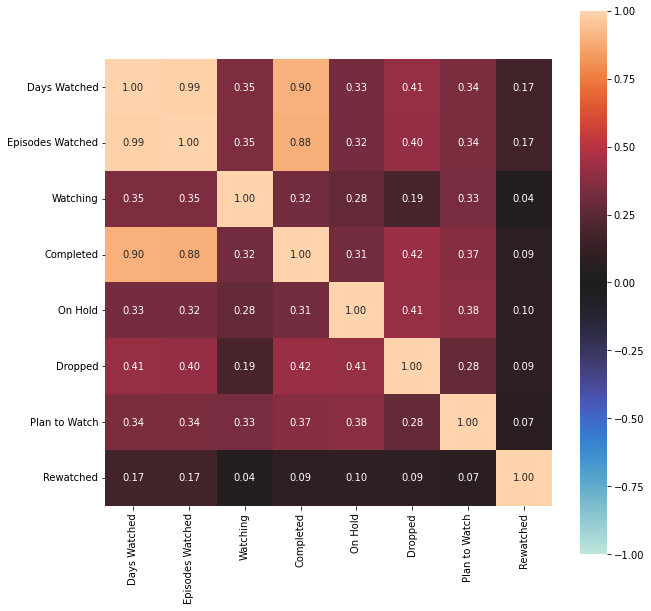

{'corr':                   Days Watched  Episodes Watched  Watching  Completed  \
 Days Watched          1.000000          0.987628  0.351535   0.895426   
 Episodes Watched      0.987628          1.000000  0.348124   0.884092   
 Watching              0.351535          0.348124  1.000000   0.315876   
 Completed             0.895426          0.884092  0.315876   1.000000   
 On Hold               0.327186          0.322283  0.276307   0.314249   
 Dropped               0.410195          0.403800  0.190672   0.418260   
 Plan to Watch         0.339992          0.336333  0.329831   0.369198   
 Rewatched             0.170030          0.171479  0.040198   0.085499   
 
                    On Hold   Dropped  Plan to Watch  Rewatched  
 Days Watched      0.327186  0.410195       0.339992   0.170030  
 Episodes Watched  0.322283  0.403800       0.336333   0.171479  
 Watching          0.276307  0.190672       0.329831   0.040198  
 Completed         0.314249  0.418260       0.369198   0.085

In [651]:
# features only
complete_correlation= associations(X_filtered, figsize=(10,10))
complete_correlation

In [652]:
# PCA Pipeline
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])
pca_pipeline.fit(X_filtered) #features only, no labels

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

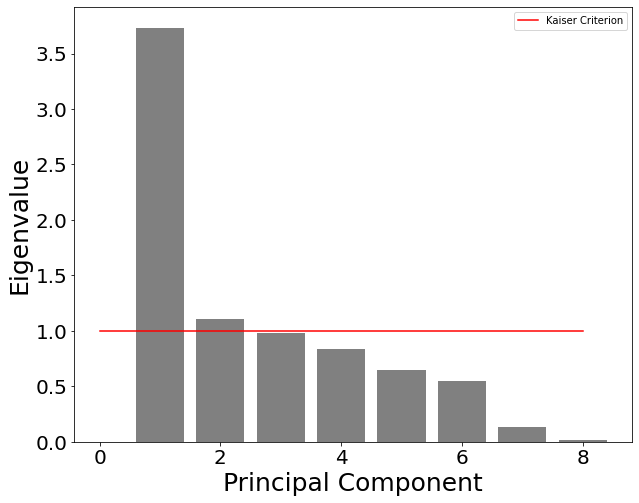

3.7335812666501527
1.1109097921677356
0.9827215130813506
0.8384857253877607
0.643755663358992
0.5449811869537295
0.13361487072674064
0.012006667802439681


In [653]:
# Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 8
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='red',label='Kaiser Criterion') # red Kaiser criterion line
plt.xlabel('Principal Component', fontsize=25)
plt.ylabel('Eigenvalue', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

# Print Eigenvalues
for index, value in enumerate(eigVals):
    print(value)

In [654]:
# Explained Variance Calculation
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 2 PCs above is: %.3f " % (sum(covarExplained[:2])))

Variance explained by the 2 PCs above is: 60.556 


In [655]:
# PCA Components
scaler = StandardScaler()
X_comp=scaler.fit_transform(X_filtered)

pca=PCA(n_components=2)
X_new=pca.fit_transform(X_comp)

explained_variance=pca.explained_variance_ratio_
sum_variance = sum(explained_variance)
print("Variance explained by the 2 PCs above is: %.4f " % (sum_variance))

components=pca.components_
components=pd.DataFrame(components, columns=user_behavior_pca_cleaned.columns)
display(components)

Variance explained by the 2 PCs above is: 0.6056 


Days Watched  Episodes Watched  Watching  Completed   On Hold   Dropped  \
0      0.477891          0.475112  0.260956   0.461270  0.281640  0.305775   
1     -0.323771         -0.327472  0.321964  -0.284764  0.552152  0.251957   

   Plan to Watch  Rewatched  
0       0.284575    0.10592  
1       0.475106   -0.09541

In [656]:
anime_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
anime_processed = anime_pca_pipeline.fit_transform(X_filtered.values)

In [657]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums
# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10)
    kMeans = KMeans(n_clusters = int(ii)).fit(anime_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(anime_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum

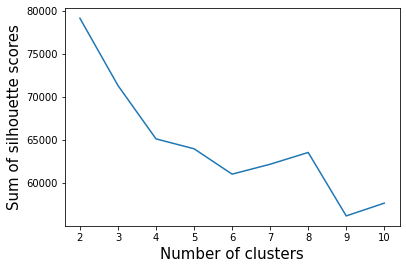

In [658]:
# Plot Silhouette Analysis
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of silhouette scores', fontsize=15)
plt.show()

In [659]:
# Define PCA
class PCA():
    def _init__(self):
        self.eigenValues=None
        self.components=None
    def transform(self, X, n_components):
        covariance_matrix = self.calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [757]:
print("Genders: ", y_gender.unique())
target_names = y_gender.unique()
y_codes = pd.DataFrame(y_gender)
y_codes['id'] = y_codes.groupby(['Gender']).ngroup()
y_codes_arr = np.array(y_codes['id'])
print(y_codes_arr)

Genders:  ['Male' 'Female' 'Non-Binary']
[1 1 1 ... 1 1 0]


In [661]:
# PCA for visualization
pca=PCA()
X_transformed=pca.transform(StandardScaler().fit_transform(X_filtered), 2) # 2 principal components

range(0, 3)


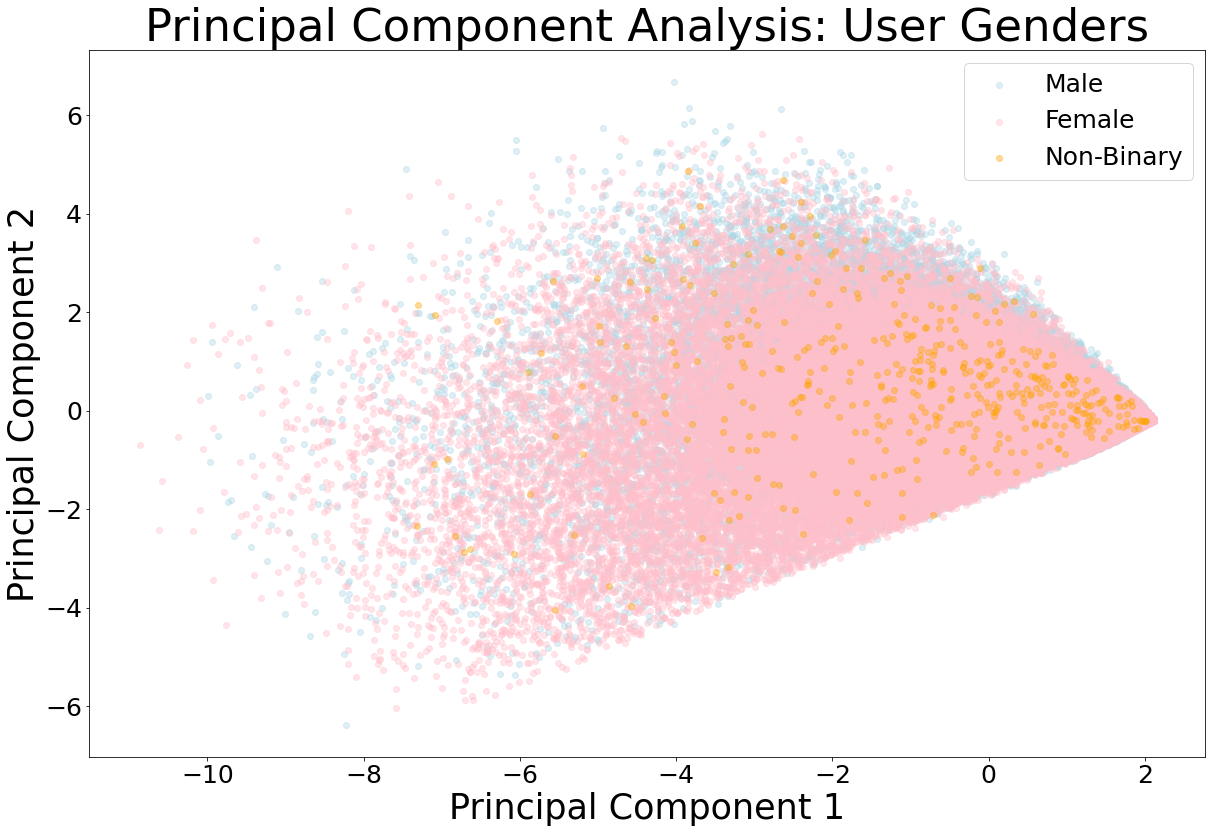

In [758]:
target_ids = range(len(target_names))
print(target_ids)
colors = ['lightblue','pink','orange']
plt.figure(figsize=(20, 13))
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_transformed[y_codes_arr == i, 0], X_transformed[y_codes_arr == i, 1], c=c, alpha=0.4, label=label)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Principal Component Analysis: User Genders', fontsize=45)
plt.xlabel('Principal Component 1', fontsize=35)
plt.ylabel('Principal Component 2', fontsize=35)
# plt.ylim(-4.5,3.5)
plt.legend(fontsize=25)
plt.show()

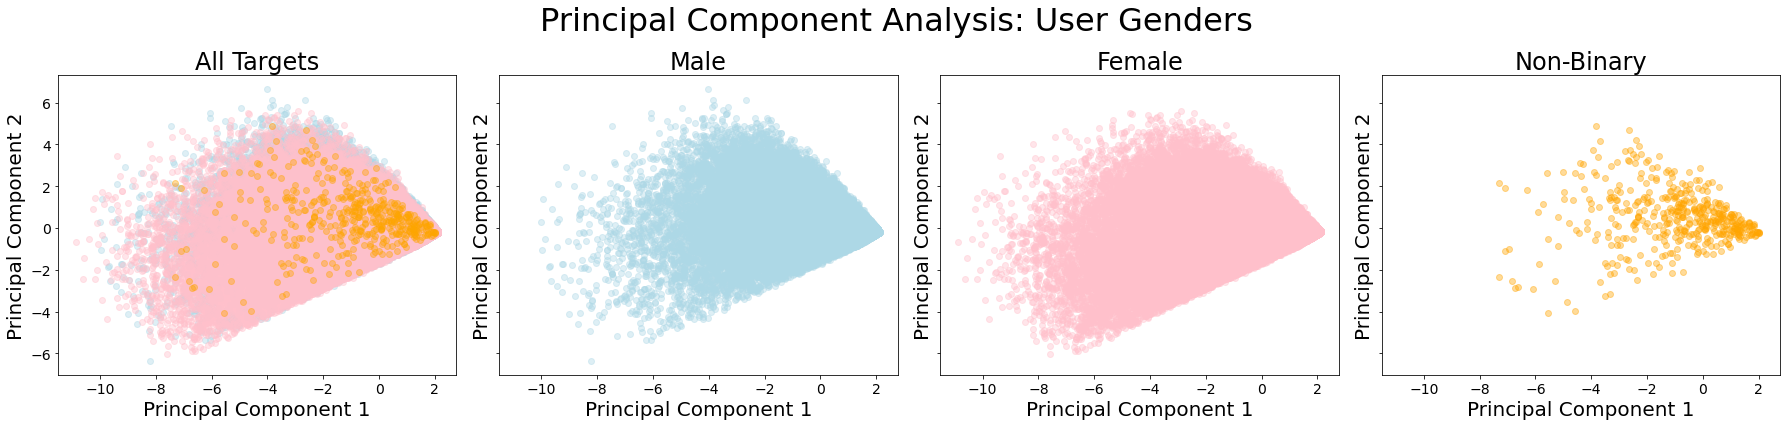

In [759]:
target_ids = range(len(target_names))
colors = ['lightblue', 'pink', 'orange']

fig, axes = plt.subplots(1, len(target_names) + 1, figsize=(25, 6), sharex=True, sharey=True)

axes[0].scatter(X_transformed[y_codes_arr == 0, 0], X_transformed[y_codes_arr == 0, 1], c=colors[0], alpha=0.4, label=target_names[0])
axes[0].scatter(X_transformed[y_codes_arr == 1, 0], X_transformed[y_codes_arr == 1, 1], c=colors[1], alpha=0.4, label=target_names[1])
axes[0].scatter(X_transformed[y_codes_arr == 2, 0], X_transformed[y_codes_arr == 2, 1], c=colors[2], alpha=0.4, label=target_names[2])
axes[0].set_title('All Targets', fontsize=24)
axes[0].set_xlabel('Principal Component 1', fontsize=20)
axes[0].set_ylabel('Principal Component 2', fontsize=20)
# axes[0].legend(fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

for i, ax, c, label in zip(target_ids, axes[1:], colors, target_names):
    ax.scatter(X_transformed[y_codes_arr == i, 0], X_transformed[y_codes_arr == i, 1], c=c, alpha=0.4, label=label)
    ax.set_title(label, fontsize=24)
    ax.set_xlabel('Principal Component 1', fontsize=20)
    ax.set_ylabel('Principal Component 2', fontsize=20)
#     ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.suptitle('Principal Component Analysis: User Genders', fontsize=32)
plt.tight_layout()
plt.show()

In [753]:
print("Score Bin: ", y_score_bin_quantile.unique())
target_names = ['Quantile 1', 'Quantile 2', 'Quantile 3', 'Quantile 4']
y_codes = pd.DataFrame(y_score_bin_quantile)
y_codes['id'] = y_codes.groupby(['Mean Score']).ngroup()
y_codes_arr = np.array(y_codes['id'])
print(y_codes_arr)

Score Bin:  ['Quantile 2', 'Quantile 1', 'Quantile 4', 'Quantile 3']
Categories (4, object): ['Quantile 1' < 'Quantile 2' < 'Quantile 3' < 'Quantile 4']
[1 1 0 ... 0 2 3]


range(0, 4)


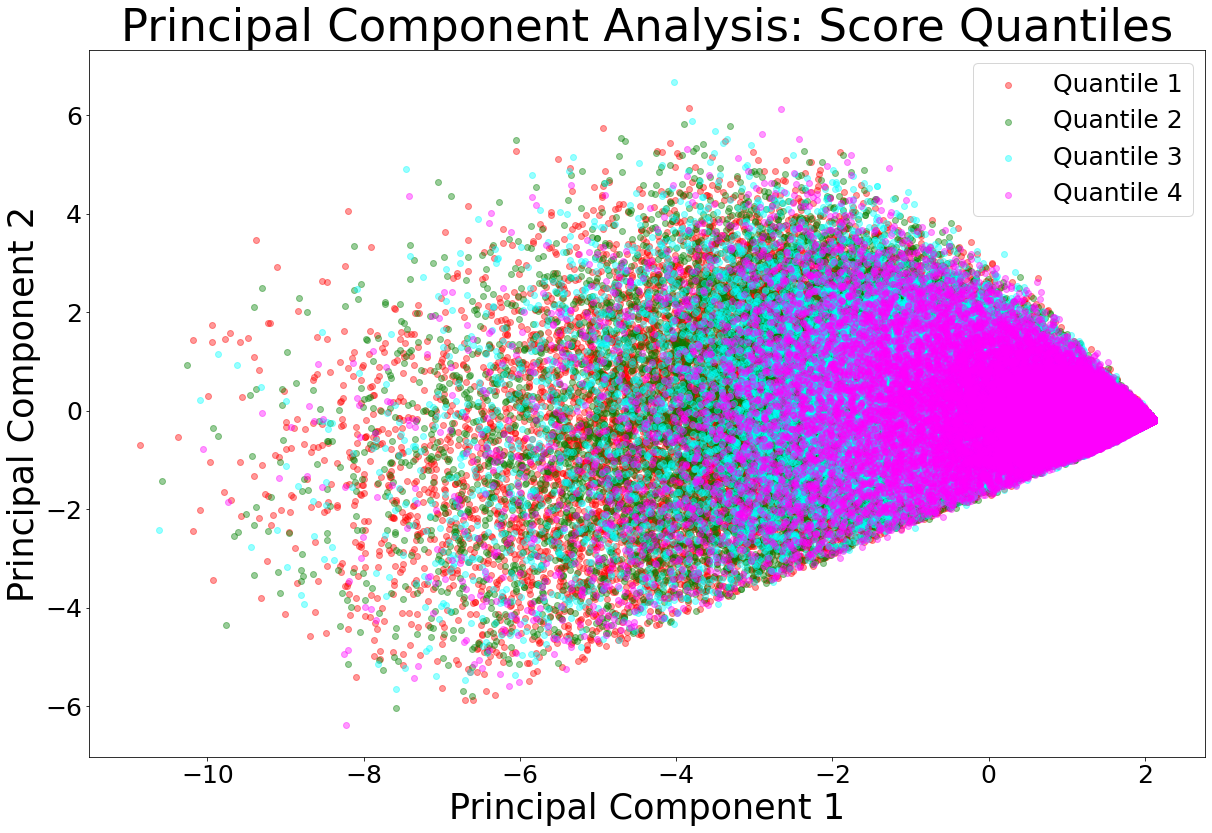

In [678]:
target_ids = range(len(target_names))
print(target_ids)
colors = ['red','green', 'cyan','magenta']
plt.figure(figsize=(20, 13))
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_transformed[y_codes_arr == i, 0], X_transformed[y_codes_arr == i, 1], c=c, alpha=0.4, label=label)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Principal Component Analysis: Score Quantiles', fontsize=45)
plt.xlabel('Principal Component 1', fontsize=35)
plt.ylabel('Principal Component 2', fontsize=35)
# plt.ylim(-4.5,3.5)
plt.legend(fontsize=25)
plt.show()

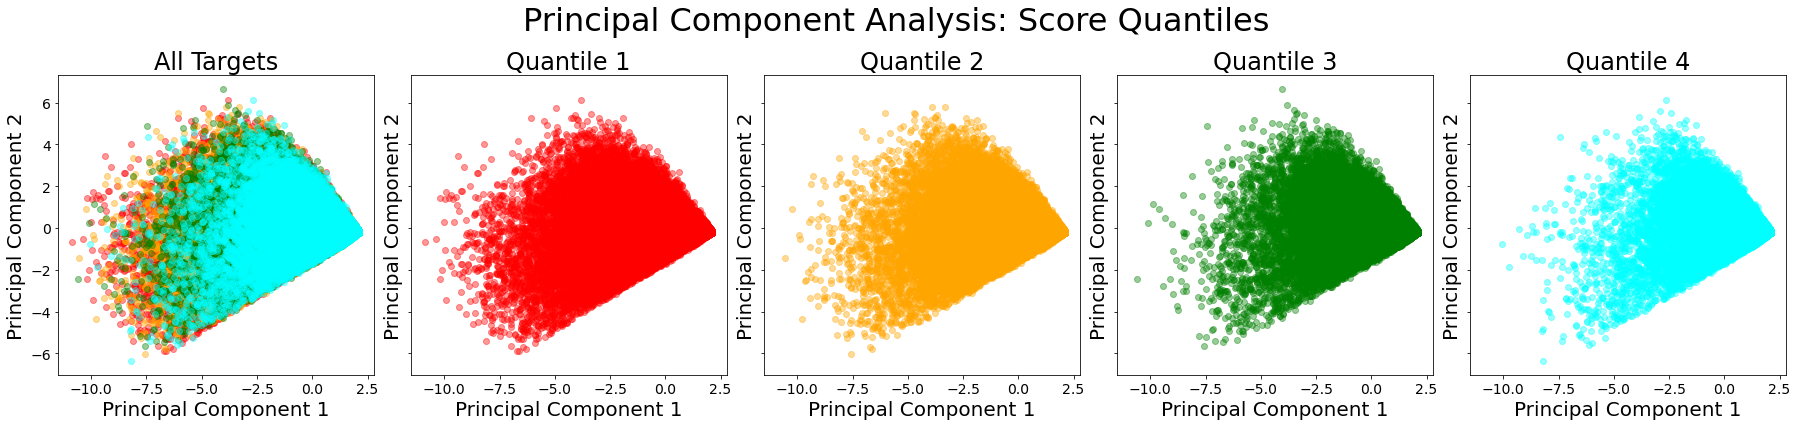

In [756]:
target_ids = range(len(target_names))
colors = ['red','orange','green','cyan']

fig, axes = plt.subplots(1, len(target_names) + 1, figsize=(25, 6), sharex=True, sharey=True)

axes[0].scatter(X_transformed[y_codes_arr == 0, 0], X_transformed[y_codes_arr == 0, 1], c=colors[0], alpha=0.4, label=target_names[0])
axes[0].scatter(X_transformed[y_codes_arr == 1, 0], X_transformed[y_codes_arr == 1, 1], c=colors[1], alpha=0.4, label=target_names[1])
axes[0].scatter(X_transformed[y_codes_arr == 2, 0], X_transformed[y_codes_arr == 2, 1], c=colors[2], alpha=0.4, label=target_names[2])
axes[0].scatter(X_transformed[y_codes_arr == 3, 0], X_transformed[y_codes_arr == 3, 1], c=colors[3], alpha=0.4, label=target_names[3])
axes[0].set_title('All Targets', fontsize=24)
axes[0].set_xlabel('Principal Component 1', fontsize=20)
axes[0].set_ylabel('Principal Component 2', fontsize=20)
# axes[0].legend(fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

for i, ax, c, label in zip(target_ids, axes[1:], colors, target_names):
    ax.scatter(X_transformed[y_codes_arr == i, 0], X_transformed[y_codes_arr == i, 1], c=c, alpha=0.4, label=label)
    ax.set_title(label, fontsize=24)
    ax.set_xlabel('Principal Component 1', fontsize=20)
    ax.set_ylabel('Principal Component 2', fontsize=20)
#     ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.suptitle('Principal Component Analysis: Score Quantiles', fontsize=32)
plt.tight_layout()
plt.show()


In [681]:
# K-Means
def KMeans(X, n_clusters, rseed=17669368):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(17669368)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

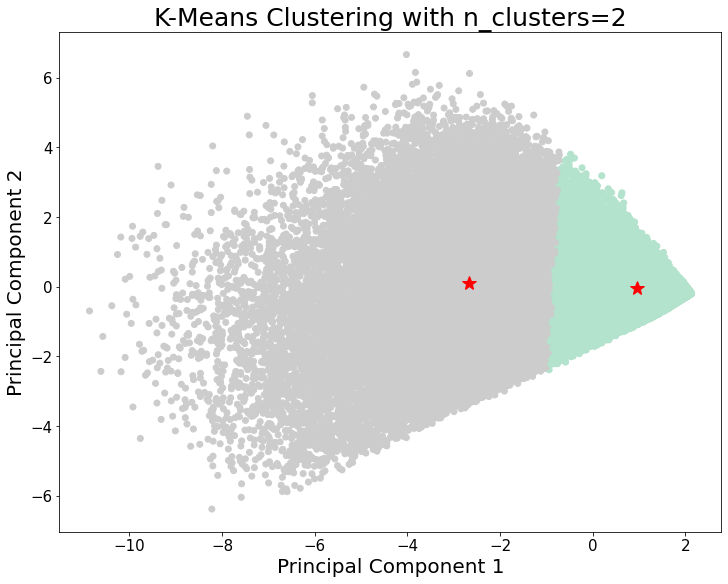

In [764]:
# Optimal Cluster # for K-Means
n_clusters=2
plt.figure(figsize=(10, 8), layout="constrained")
centers, labels = KMeans(X_transformed, 2)
plt.title('K-Means Clustering with n_clusters={}'.format(2), fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
# plt.ylim(-4.5,3.5)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Pastel2')
plt.plot(centers[:, 0], centers[:, 1], '*',markersize=15,color='red');

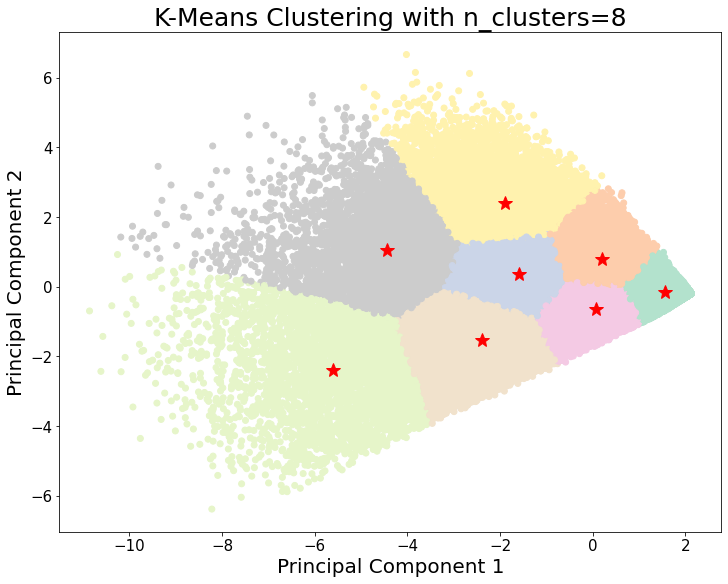

In [782]:
# Optimal Cluster # for K-Means
n_clusters=8
plt.figure(figsize=(10, 8), layout="constrained")
centers, labels = KMeans(X_transformed, n_clusters)
plt.title('K-Means Clustering with n_clusters={}'.format(8), fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
# plt.ylim(-4.5,3.5)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Pastel2')
plt.plot(centers[:, 0], centers[:, 1], '*',markersize=15,color='red');